## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV


sns.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')
df_sample = pd.read_csv('datasets/sample_sub_reg.csv')

## EDA and Cleaning Numerical data

In [19]:
df_train.describe().columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [20]:
df_train_int = df_train[['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'SalePrice']]

In [21]:
df_train_int.shape

(2051, 35)

### Change year to age

In [22]:
df_train_int.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

In [23]:
### Filter only column "Year"

df_train_int[['Year Built','Year Remod/Add','Garage Yr Blt']]

Year Built  Year Remod/Add  Garage Yr Blt
0           1976            2005         1976.0
1           1996            1997         1997.0
2           1953            2007         1953.0
3           2006            2007         2007.0
4           1900            1993         1957.0
...          ...             ...            ...
2046        2007            2007         2007.0
2047        1940            1950         1961.0
2048        1928            1950         1929.0
2049        1956            1956         1956.0
2050        1999            1999         1999.0

[2051 rows x 3 columns]

In [24]:
### Find the age by calculation (2021 - column in "Year" = Age)

df_train_int['Year_Built_Age'] = df_train_int['Year Built'].map(lambda x:2021-x)
df_train_int['Year_Remod/Add_Age'] = df_train_int['Year Remod/Add'].map(lambda x:2021-x)
df_train_int['Garage_Yr_Blt_Age'] = df_train_int['Garage Yr Blt'].map(lambda x:2021-x)

<ipython-input-24-869921649221>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_int['Year_Built_Age'] = df_train_int['Year Built'].map(lambda x:2021-x)
<ipython-input-24-869921649221>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_int['Year_Remod/Add_Age'] = df_train_int['Year Remod/Add'].map(lambda x:2021-x)
<ipython-input-24-869921649221>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [25]:
df_train_int[['Year Built','Year Remod/Add','Garage Yr Blt','Year_Built_Age','Year_Remod/Add_Age','Garage_Yr_Blt_Age']]

Year Built  Year Remod/Add  Garage Yr Blt  Year_Built_Age  \
0           1976            2005         1976.0              45   
1           1996            1997         1997.0              25   
2           1953            2007         1953.0              68   
3           2006            2007         2007.0              15   
4           1900            1993         1957.0             121   
...          ...             ...            ...             ...   
2046        2007            2007         2007.0              14   
2047        1940            1950         1961.0              81   
2048        1928            1950         1929.0              93   
2049        1956            1956         1956.0              65   
2050        1999            1999         1999.0              22   

      Year_Remod/Add_Age  Garage_Yr_Blt_Age  
0                     16               45.0  
1                     24               24.0  
2                     14               68.0  
3                     14               14.0  
4                     28               64.0  
...                  ...                ...  
2046                  14               14.0  
2047                  71               60.0  
2048                  71               92.0  
2049                  65               65.0  
2050                  22               22.0  

[2051 rows x 6 columns]

In [26]:
### Drop column "Year"

df_train_int = df_train_int.drop(columns=['Year Built','Year Remod/Add','Garage Yr Blt'])

In [27]:
### Standardization data for finding correlation and plotting the heatmap

df_norm_int = (df_train_int - df_train_int.mean()) / df_train_int.std()
df_norm_int

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0        0.069849           NaN  0.511946     -0.078625      2.207190   
1        0.069849     -1.120141  0.211612      0.622504     -0.508978   
2       -0.864202     -0.045364 -0.317866     -0.779754      1.301801   
3        0.069849      0.169591 -0.039037     -0.779754     -0.508978   
4       -0.163664      0.556511  0.618435     -0.078625      2.207190   
...           ...           ...       ...           ...           ...   
2046    -0.864202      0.427537  0.205235      1.323634     -0.508978   
2047    -0.630689           NaN  0.337678     -1.480883     -0.508978   
2048    -0.163664     -0.518266 -0.371852     -0.078625      0.396411   
2049    -0.864202      0.470528  0.049654     -1.480883     -0.508978   
2050     0.069849     -0.389293 -0.380454      0.622504     -0.508978   

      Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
0         1.081966      0.196658     -0.290659    -0.844419      -0.740943   
1         0.184634      0.422155     -0.290659    -0.655636      -0.322618   
2        -0.569811      0.625969     -0.290659    -0.543265      -0.002198   
3        -0.569811     -0.959012     -0.290659    -0.412915      -1.499715   
4        -0.569811     -0.959012     -0.290659     0.243332      -0.849975   
...            ...           ...           ...          ...            ...   
2046     -0.569811      1.233076     -0.290659     0.686074       1.837990   
2047     -0.569811     -0.390934     -0.290659     0.070281      -0.438325   
2048     -0.569811     -0.959012     -0.290659     0.737764      -0.360445   
2049     -0.569811     -0.622936      4.254771    -0.612935       0.315996   
2050     -0.569811     -0.959012     -0.290659     0.958011      -0.142382   

      ...  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0     ...      -0.053288       -0.377172   -0.102713     -0.287785  -0.063465   
1     ...       0.396169       -0.377172   -0.102713     -0.287785  -0.063465   
2     ...       0.066568       -0.377172   -0.102713     -0.287785  -0.063465   
3     ...      -0.712491       -0.377172   -0.102713     -0.287785  -0.063465   
4     ...       0.171441       -0.377172   -0.102713     -0.287785  -0.063465   
...   ...            ...             ...         ...           ...        ...   
2046  ...       3.422511       -0.377172   -0.102713     -0.287785  -0.063465   
2047  ...      -0.712491       -0.377172   -0.102713     -0.287785  -0.063465   
2048  ...      -0.712491       -0.377172   -0.102713     -0.287785  -0.063465   
2049  ...       2.119087        1.962200   -0.102713     -0.287785  -0.063465   
2050  ...       0.186423       -0.377172   -0.102713     -0.287785  -0.063465   

      Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  \
0    -0.089946  -0.643081       -0.142193           -0.989238   
1    -0.089946   0.486134       -0.804930           -0.608942   
2    -0.089946  -0.914344        0.619955           -1.084312   
3    -0.089946  -0.094245       -1.136298           -1.084312   
4    -0.089946  -0.542145        2.376207           -0.418794   
...        ...        ...             ...                 ...   
2046 -0.089946   1.479729       -1.169435           -1.084312   
2047 -0.089946  -1.248693        1.050734            1.625297   
2048 -0.089946  -0.056394        1.448376            1.625297   
2049 -0.089946  -0.472752        0.520544            1.340075   
2050 -0.089946   0.095009       -0.904340           -0.704016   

      Garage_Yr_Blt_Age  
0              0.106434  
1             -0.719002  
2              1.010483  
3             -1.112067  
4              0.853257  
...                 ...  
2046          -1.112067  
2047           0.696031  
2048           1.953839  
2049           0.892564  
2050          -0.797615  

[2051 rows x 35 columns]

In [131]:
df_norm_int.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice', 'Year_Built_Age',
       'Year_Remod/Add_Age', 'Garage_Yr_Blt_Age'],
      dtype='object')

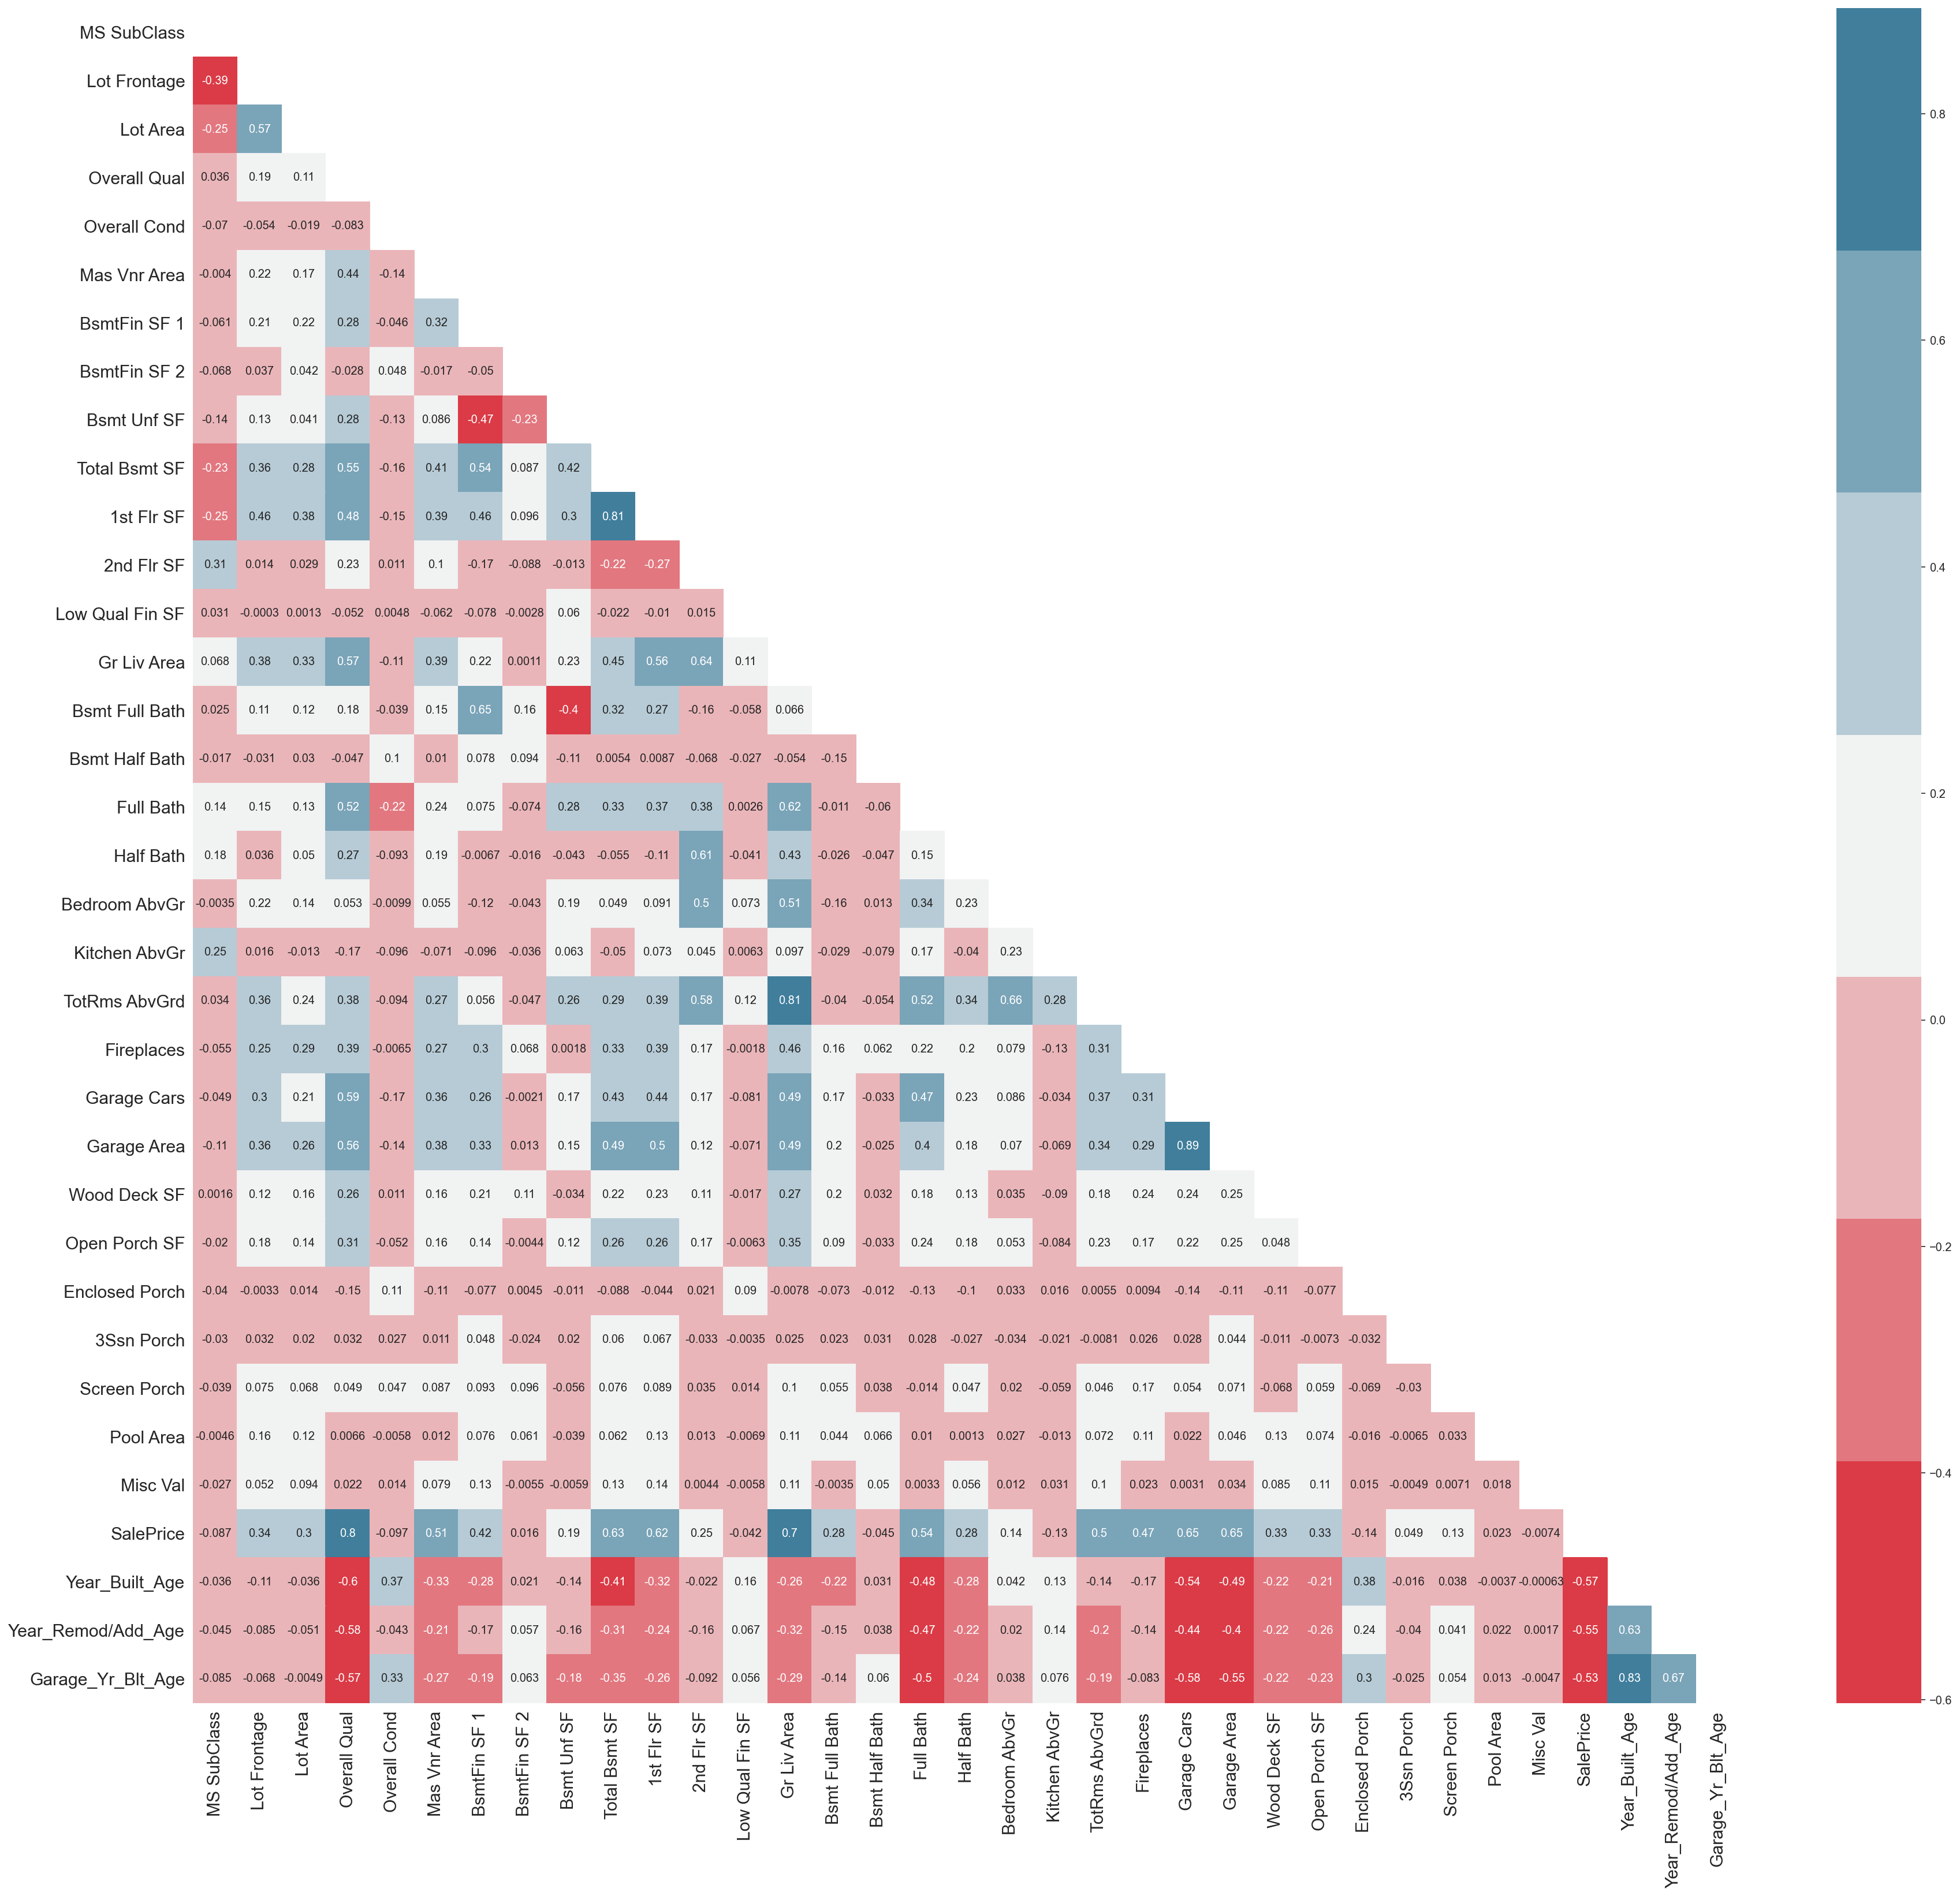

In [28]:
### Heatmap show the correlation value of all numerical features

plt.figure(figsize=(30,27))
mask = np.zeros_like(df_norm_int.corr())
mask[np.triu_indices_from(mask)] = 1
ax = sns.heatmap(df_norm_int.corr(),annot=True,cmap=sns.diverging_palette(10, 590, n=7),mask=mask);
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=15)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=15)
plt.show()

In [29]:
print(f'Number of Numerical features = {len(df_train_int.columns)}')
df_train_int.columns

Number of column (int, float) = 35


Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice', 'Year_Built_Age',
       'Year_Remod/Add_Age', 'Garage_Yr_Blt_Age'],
      dtype='object')

In [30]:
df_train_int.isnull().sum()

MS SubClass             0
Lot Frontage          330
Lot Area                0
Overall Qual            0
Overall Cond            0
Mas Vnr Area           22
BsmtFin SF 1            1
BsmtFin SF 2            1
Bsmt Unf SF             1
Total Bsmt SF           1
1st Flr SF              0
2nd Flr SF              0
Low Qual Fin SF         0
Gr Liv Area             0
Bsmt Full Bath          2
Bsmt Half Bath          2
Full Bath               0
Half Bath               0
Bedroom AbvGr           0
Kitchen AbvGr           0
TotRms AbvGrd           0
Fireplaces              0
Garage Cars             1
Garage Area             1
Wood Deck SF            0
Open Porch SF           0
Enclosed Porch          0
3Ssn Porch              0
Screen Porch            0
Pool Area               0
Misc Val                0
SalePrice               0
Year_Built_Age          0
Year_Remod/Add_Age      0
Garage_Yr_Blt_Age     114
dtype: int64

### Check outlier to delete

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


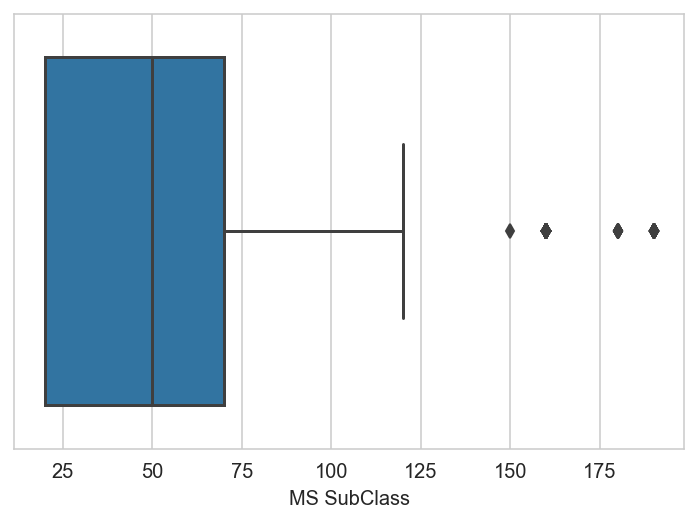

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


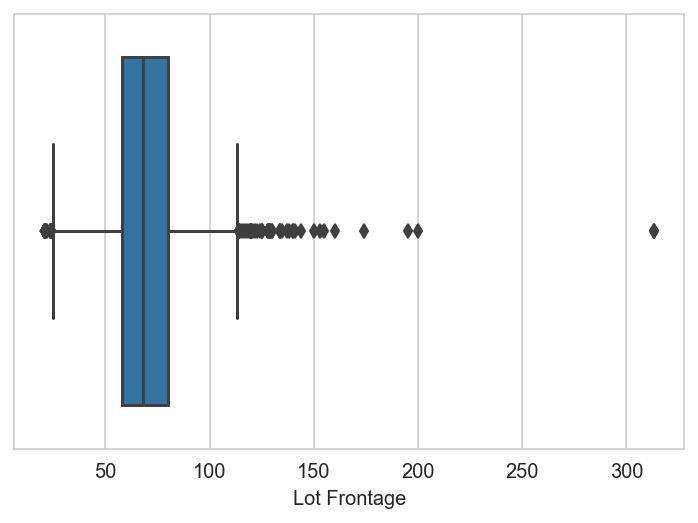

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


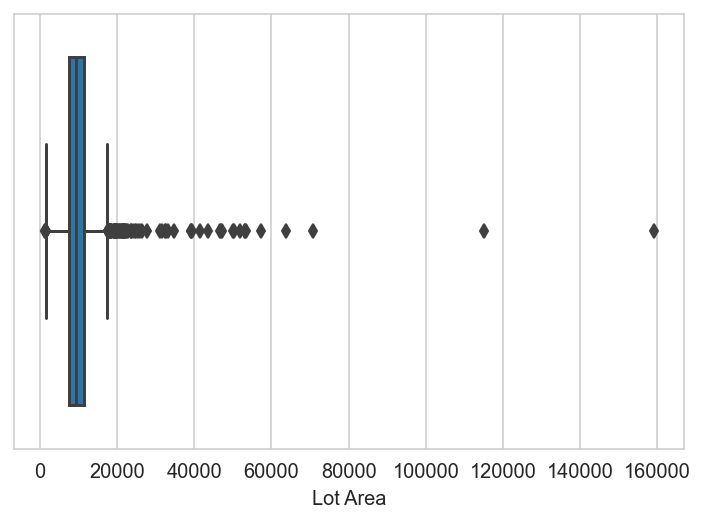

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


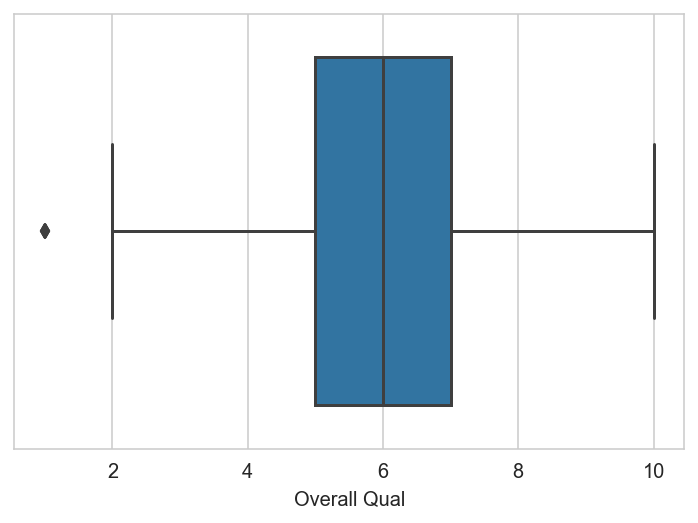

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


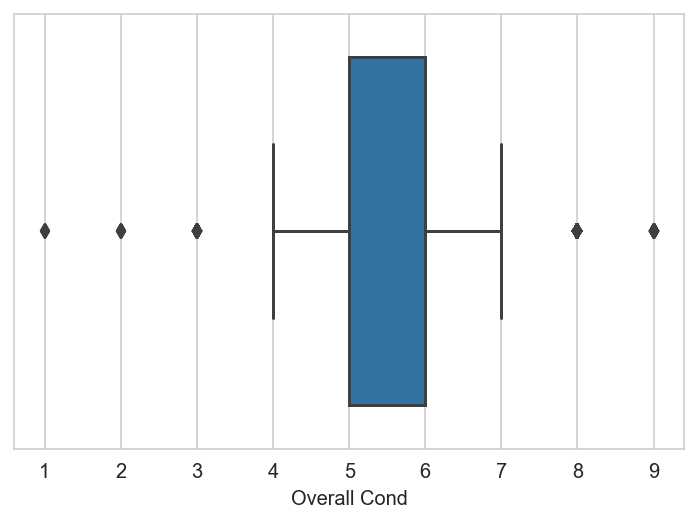

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


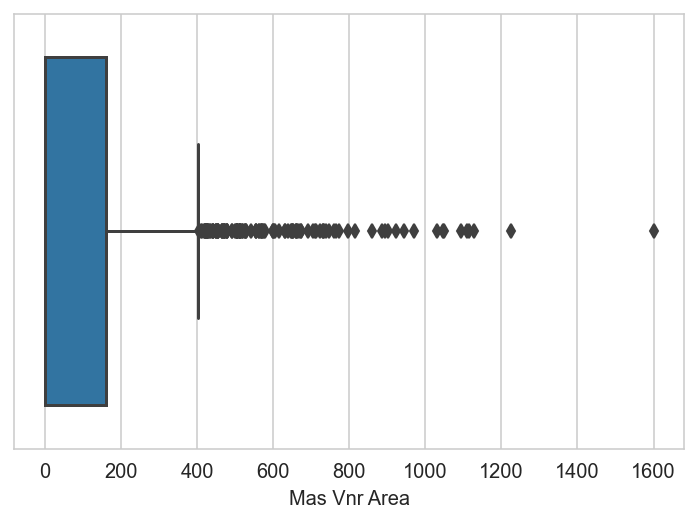

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


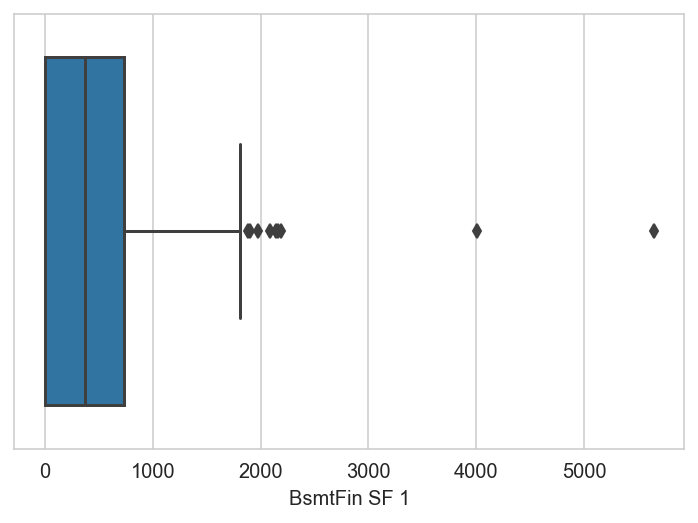

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


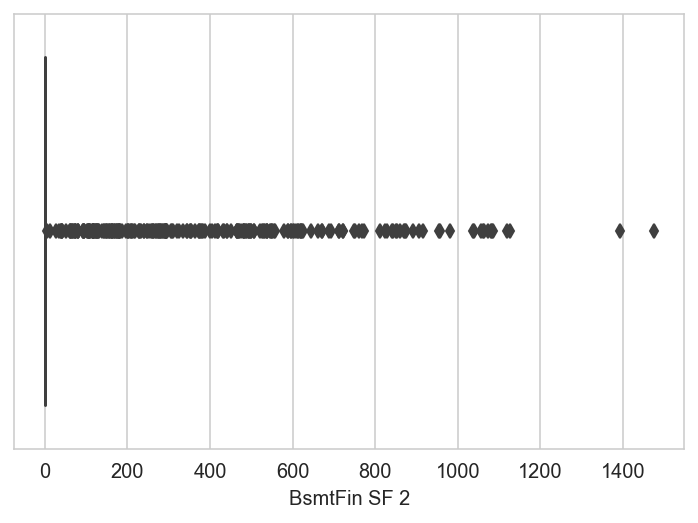

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


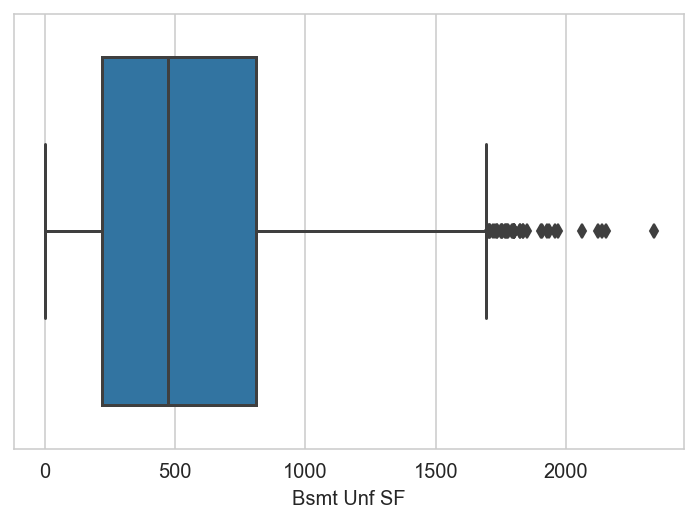

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


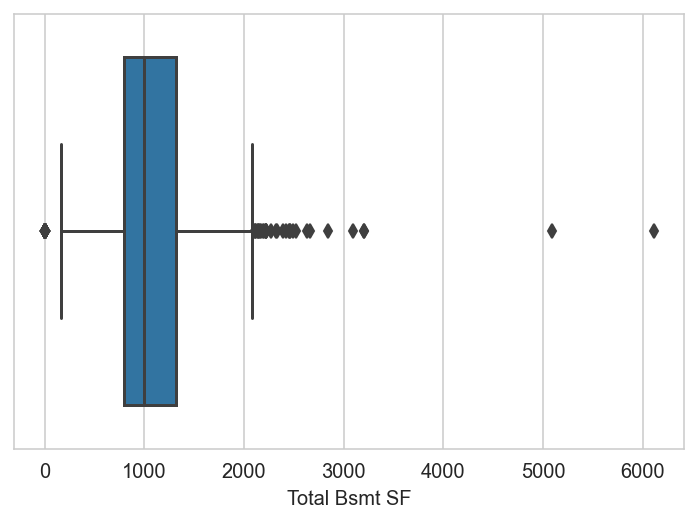

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


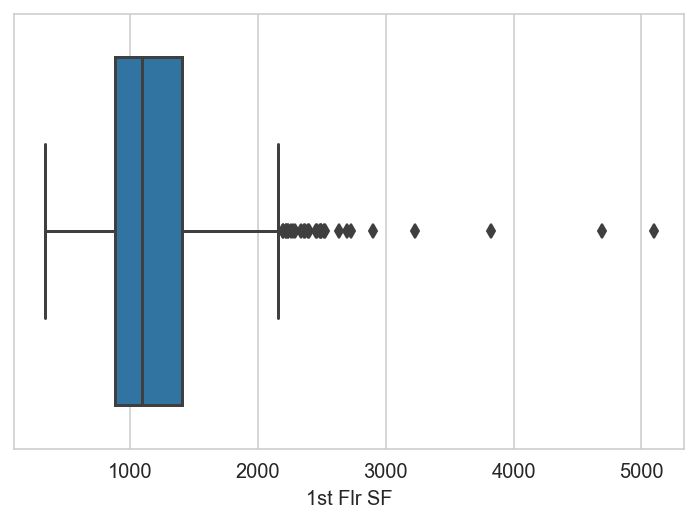

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


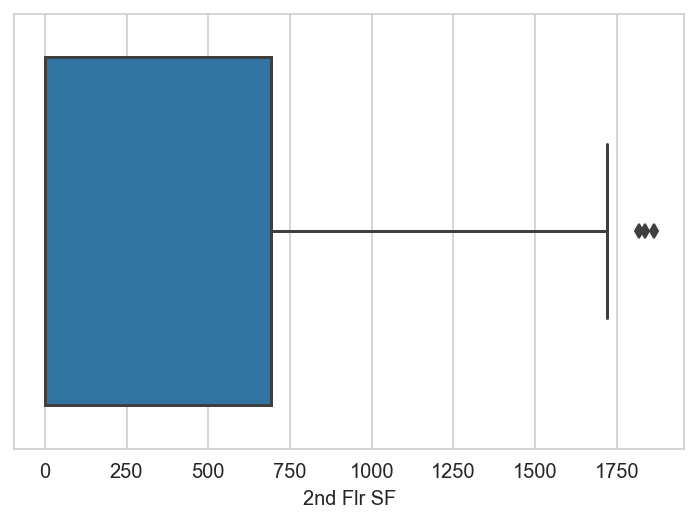

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


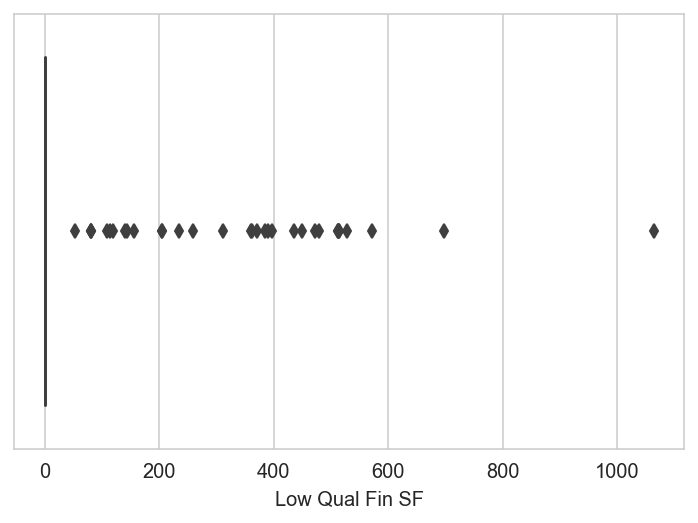

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


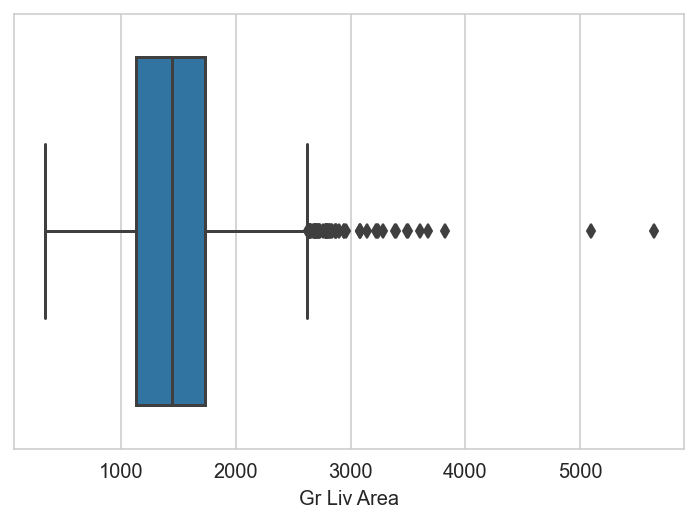

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


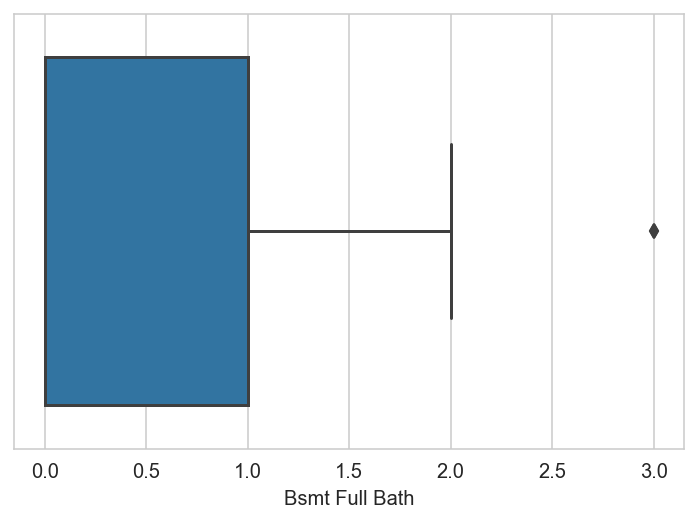

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


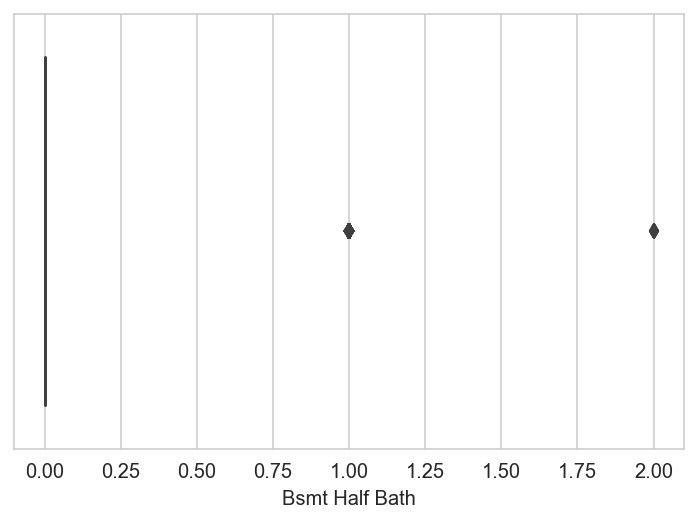

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


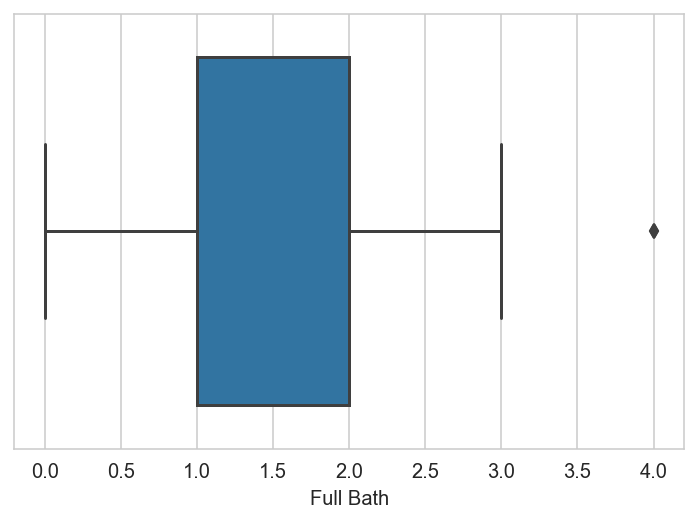

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


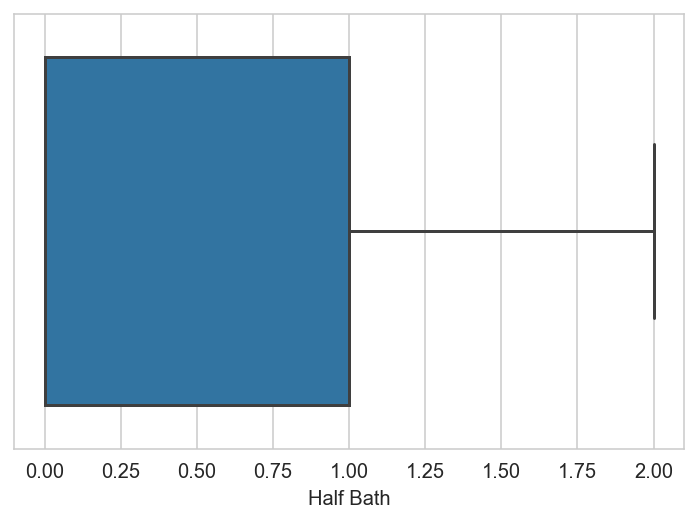

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


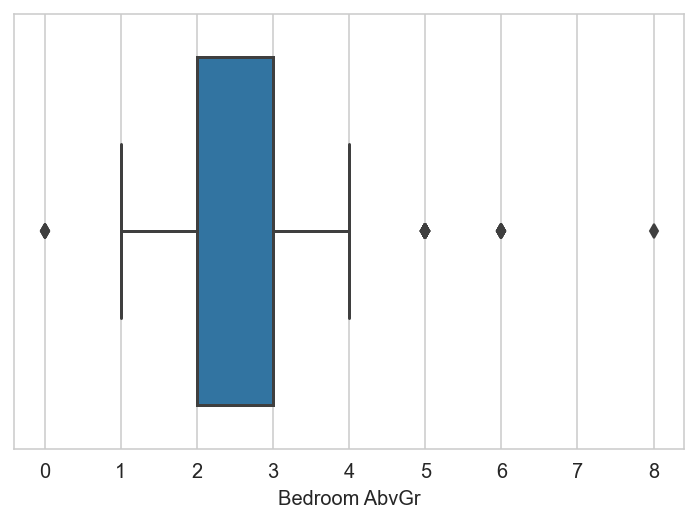

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


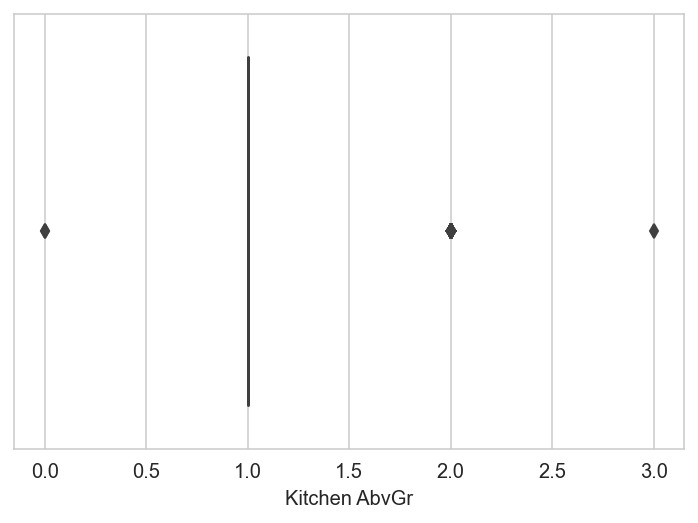

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


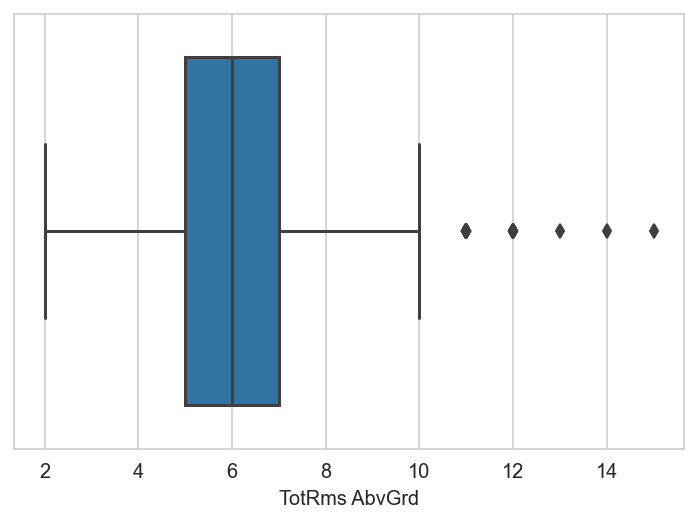

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


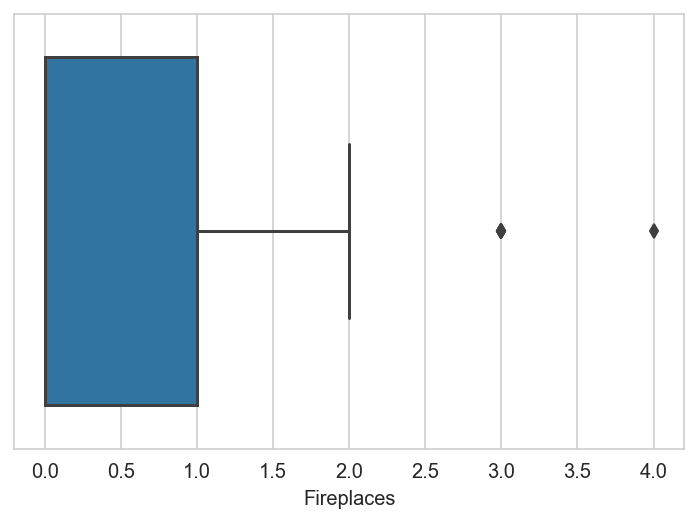

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


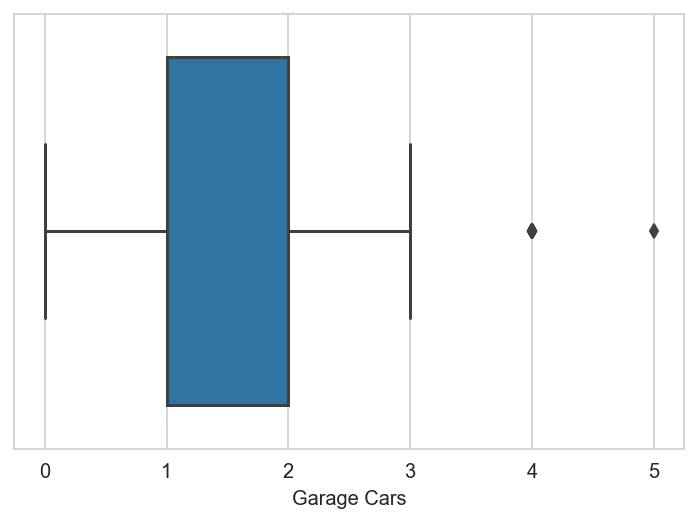

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


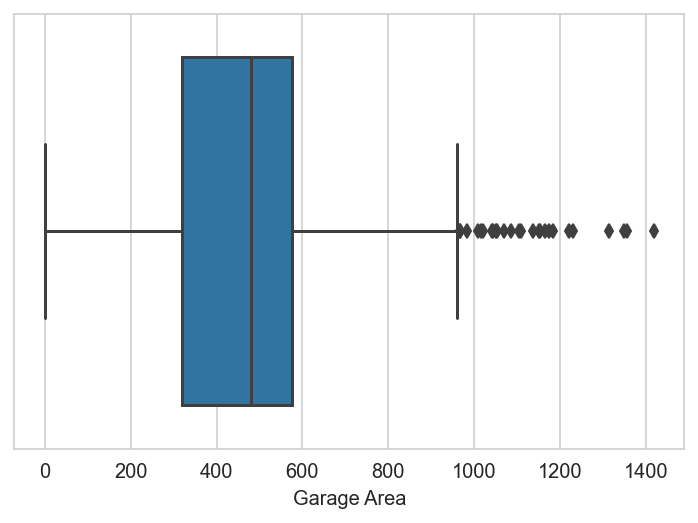

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


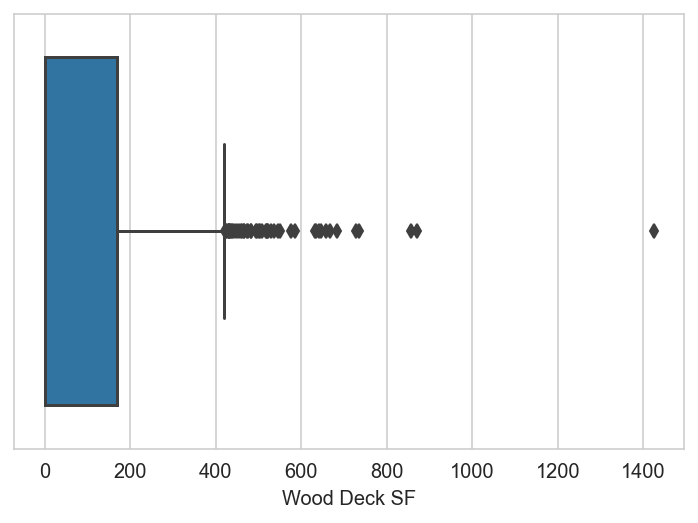

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


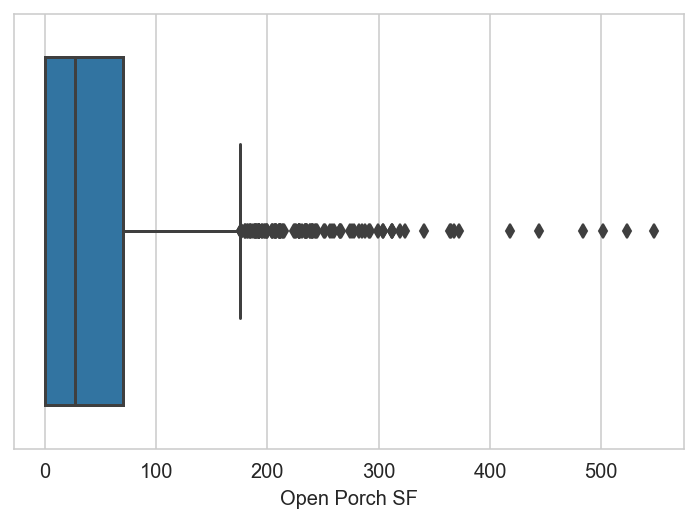

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


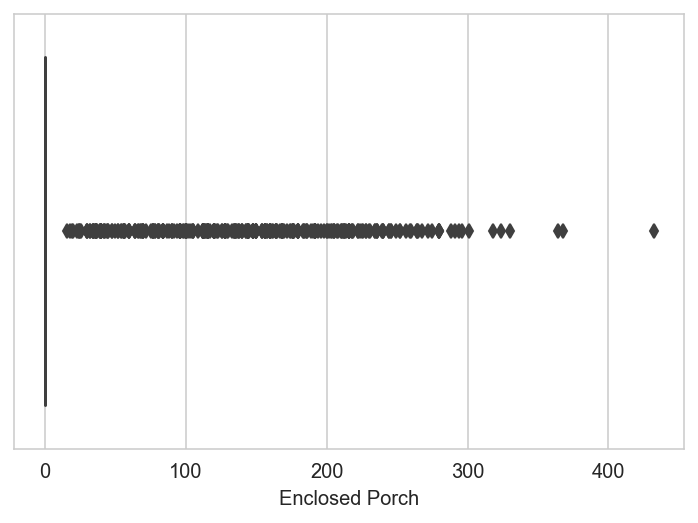

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


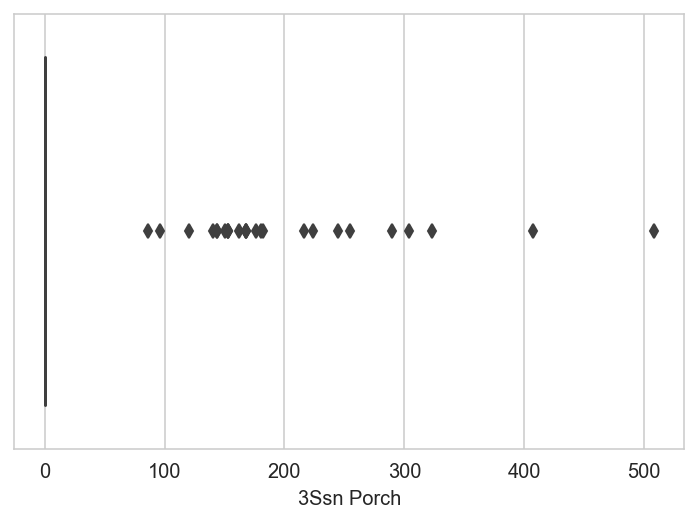

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


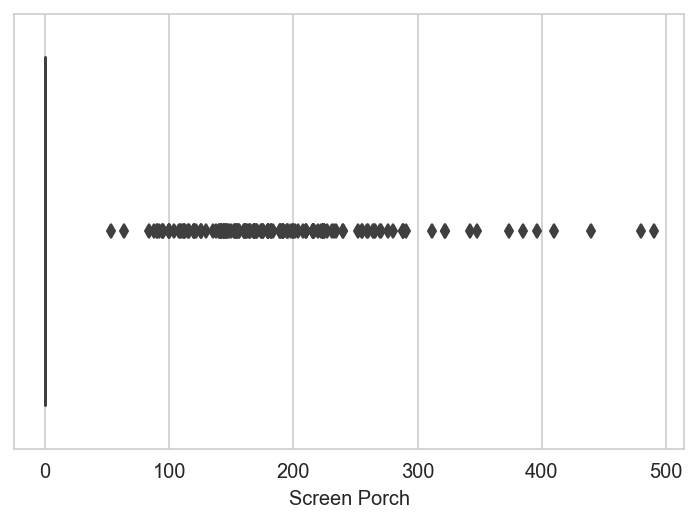

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


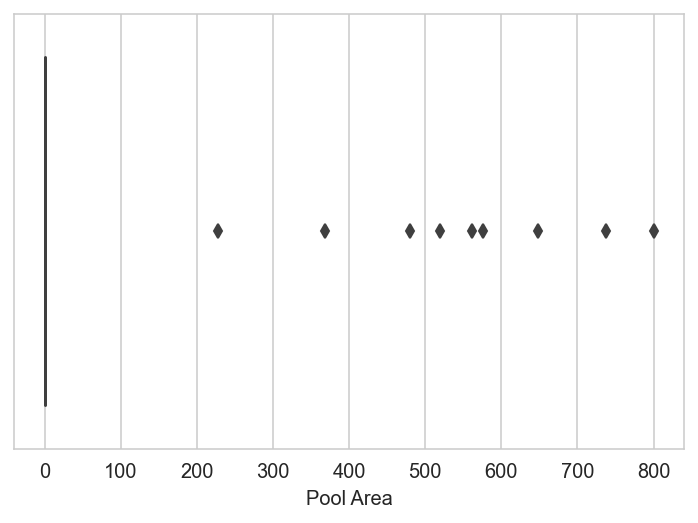

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


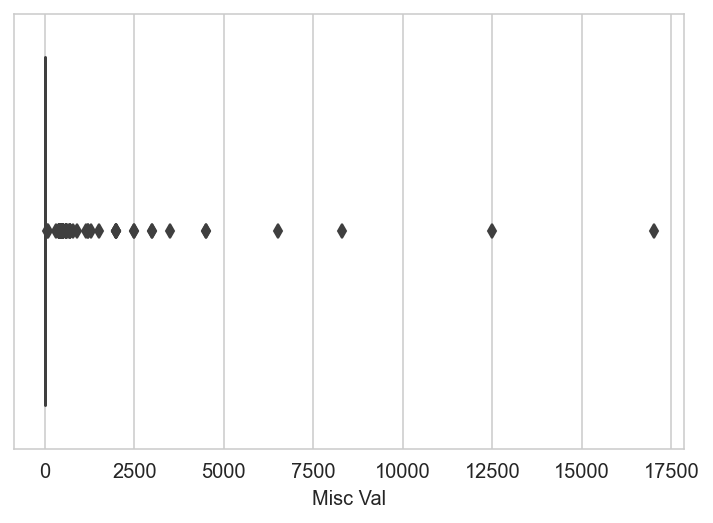

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


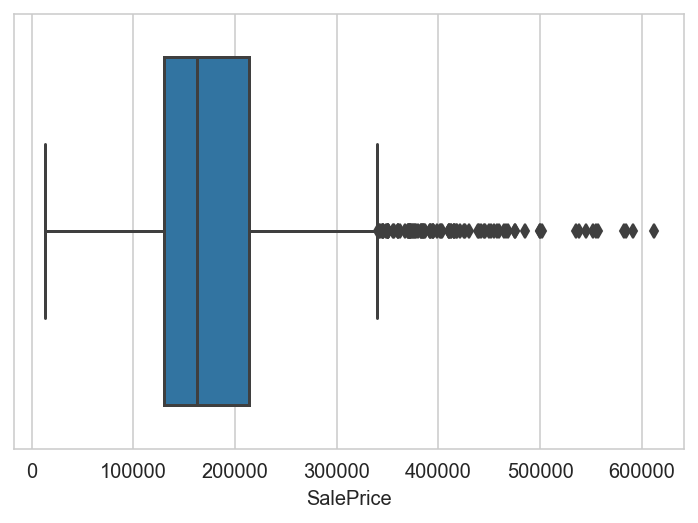

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


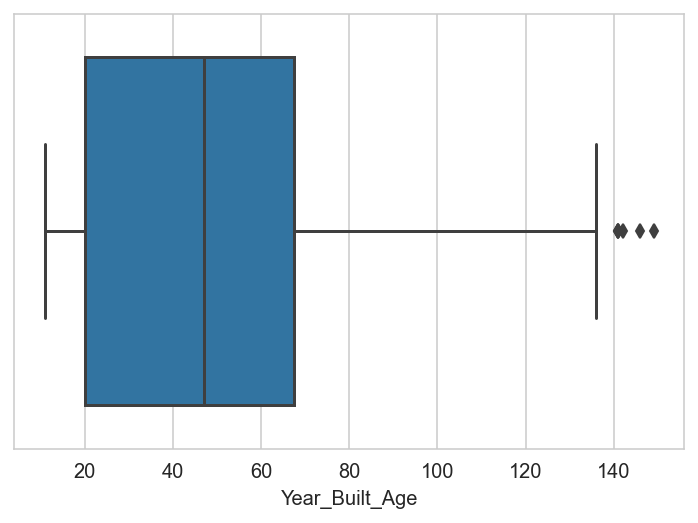

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


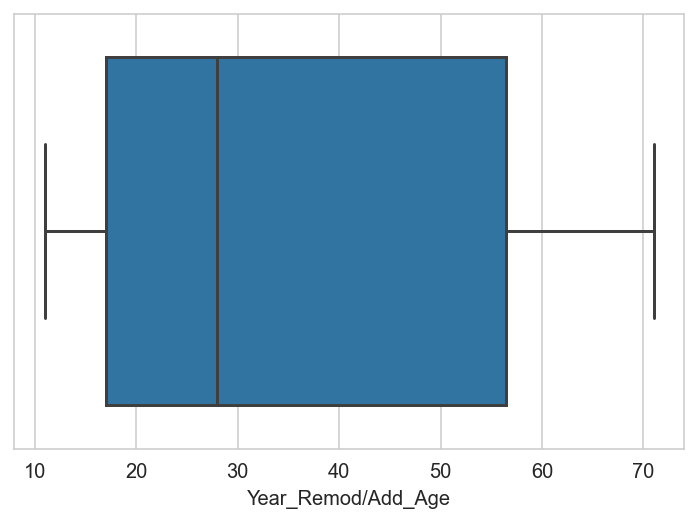

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


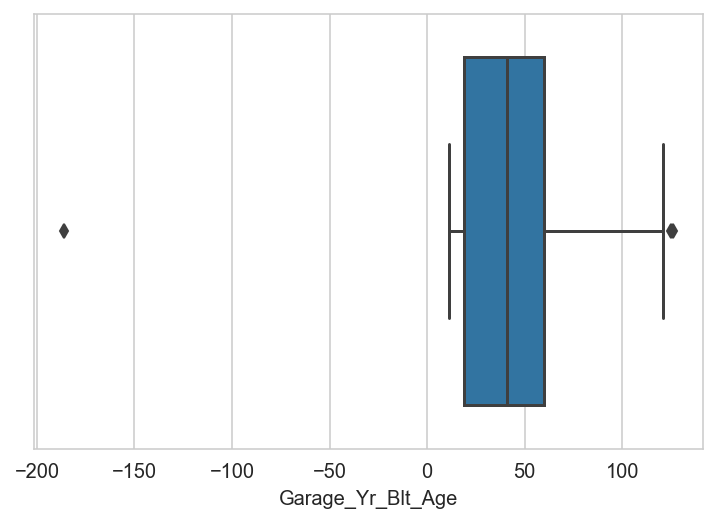

In [31]:
### Check Outlier to delete
### Use forloop for plotting boxplot for all Numerical features to check outlier data

for i in list(df_train_int.columns):
    sns.boxplot(df_train_int[i])
    plt.show()

In [32]:
df_train_int.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice', 'Year_Built_Age',
       'Year_Remod/Add_Age', 'Garage_Yr_Blt_Age'],
      dtype='object')

### Index of the data that has the outlier

In [33]:
df_train_int[df_train_int['Lot Frontage']>300]

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
960            60         313.0     63887            10             5   
1335           20         313.0     27650             7             7   

      Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
960          796.0        5644.0           0.0        466.0         6110.0   
1335           0.0         425.0           0.0        160.0          585.0   

      ...  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
960   ...            292               0           0             0        480   
1335  ...              0               0           0             0          0   

      Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  \
960          0     160000              13                  13   
1335         0     242000              61                  14   

      Garage_Yr_Blt_Age  
960                13.0  
1335               61.0  

[2 rows x 35 columns]

In [34]:
df_train_int[df_train_int['Lot Area']>100000]

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
471           50           NaN    159000             6             7   
694           20           NaN    115149             7             5   

     Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
471         472.0         697.0           0.0        747.0         1444.0   
694         351.0        1219.0           0.0        424.0         1643.0   

     ...  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
471  ...             98               0           0             0          0   
694  ...             48               0           0             0          0   

     Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  \
471       500     277000              63                  15   
694         0     302000              50                  19   

     Garage_Yr_Blt_Age  
471               63.0  
694               50.0  

[2 rows x 35 columns]

In [35]:
df_train_int[df_train_int['Mas Vnr Area']>1400]

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1409           60          66.0      7399             7             5   

      Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1409        1600.0         649.0           0.0        326.0          975.0   

      ...  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
1409  ...             10               0           0           198          0   

      Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  \
1409         0     239000              24                  23   

      Garage_Yr_Blt_Age  
1409               24.0  

[1 rows x 35 columns]

In [36]:
df_train_int[df_train_int['BsmtFin SF 1']>3500]

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
960            60         313.0     63887            10             5   
1885           20         128.0     39290            10             5   

      Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
960          796.0        5644.0           0.0        466.0         6110.0   
1885        1224.0        4010.0           0.0       1085.0         5095.0   

      ...  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
960   ...            292               0           0             0        480   
1885  ...            484               0           0             0          0   

      Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  \
960          0     160000              13                  13   
1885     17000     183850              13                  12   

      Garage_Yr_Blt_Age  
960                13.0  
1885               13.0  

[2 rows x 35 columns]

In [37]:
df_train_int[df_train_int['Total Bsmt SF']>5000]

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
960            60         313.0     63887            10             5   
1885           20         128.0     39290            10             5   

      Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
960          796.0        5644.0           0.0        466.0         6110.0   
1885        1224.0        4010.0           0.0       1085.0         5095.0   

      ...  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
960   ...            292               0           0             0        480   
1885  ...            484               0           0             0          0   

      Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  \
960          0     160000              13                  13   
1885     17000     183850              13                  12   

      Garage_Yr_Blt_Age  
960                13.0  
1885               13.0  

[2 rows x 35 columns]

In [38]:
df_train_int[df_train_int['Gr Liv Area']>5000]

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
960            60         313.0     63887            10             5   
1885           20         128.0     39290            10             5   

      Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
960          796.0        5644.0           0.0        466.0         6110.0   
1885        1224.0        4010.0           0.0       1085.0         5095.0   

      ...  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
960   ...            292               0           0             0        480   
1885  ...            484               0           0             0          0   

      Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  \
960          0     160000              13                  13   
1885     17000     183850              13                  12   

      Garage_Yr_Blt_Age  
960                13.0  
1885               13.0  

[2 rows x 35 columns]

In [39]:
df_train_int[df_train_int['Wood Deck SF']>1400]

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
966           80           NaN     15957             6             6   

     Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
966           0.0        1148.0           0.0         96.0         1244.0   

     ...  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
966  ...              0               0           0             0          0   

     Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  \
966         0     188000              44                  44   

     Garage_Yr_Blt_Age  
966               44.0  

[1 rows x 35 columns]

In [40]:
df_train_int[df_train_int['Garage_Yr_Blt_Age']<0]

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1699           20          68.0      8298             8             5   

      Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
1699           NaN         583.0           0.0        963.0         1546.0   

      ...  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
1699  ...              0               0           0             0          0   

      Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  \
1699         0     267300              15                  14   

      Garage_Yr_Blt_Age  
1699             -186.0  

[1 rows x 35 columns]

In [41]:
### Remove Row of Outlier data

df_train_int = df_train_int.drop(960)
df_train_int = df_train_int.drop(966)
df_train_int = df_train_int.drop(1335)
df_train_int = df_train_int.drop(1409)
df_train_int = df_train_int.drop(1699)
df_train_int = df_train_int.drop(471)
df_train_int = df_train_int.drop(694)
df_train_int = df_train_int.drop(1885)

In [42]:
### What the column that has null value

check_null_int = df_train_int.isnull().sum().to_frame('null')
column_null_int = list(check_null_int[check_null_int['null'] != 0].T.columns)
column_null_int

['Lot Frontage',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Cars',
 'Garage Area',
 'Garage_Yr_Blt_Age']

In [43]:
### Replace null with avg

def replace_null(data,column):
    for i in column:
        avg = np.round(data[i].mean(),0)
        data = data.fillna({i:avg})
    return data

In [44]:
### Use function "replace_null" to replace null with avg

df_train_int = replace_null(df_train_int,column_null_int)

In [45]:
df_train_int

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0              60          69.0     13517             6             8   
1              60          43.0     11492             7             5   
2              20          68.0      7922             5             7   
3              60          73.0      9802             5             5   
4              50          82.0     14235             6             8   
...           ...           ...       ...           ...           ...   
2046           20          79.0     11449             8             5   
2047           30          69.0     12342             4             5   
2048           50          57.0      7558             6             6   
2049           20          80.0     10400             4             5   
2050           60          60.0      7500             7             5   

      Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
0            289.0         533.0           0.0        192.0          725.0   
1            132.0         637.0           0.0        276.0          913.0   
2              0.0         731.0           0.0        326.0         1057.0   
3              0.0           0.0           0.0        384.0          384.0   
4              0.0           0.0           0.0        676.0          676.0   
...            ...           ...           ...          ...            ...   
2046           0.0        1011.0           0.0        873.0         1884.0   
2047           0.0         262.0           0.0        599.0          861.0   
2048           0.0           0.0           0.0        896.0          896.0   
2049           0.0         155.0         750.0        295.0         1200.0   
2050           0.0           0.0           0.0        994.0          994.0   

      ...  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0     ...             44               0           0             0          0   
1     ...             74               0           0             0          0   
2     ...             52               0           0             0          0   
3     ...              0               0           0             0          0   
4     ...             59               0           0             0          0   
...   ...            ...             ...         ...           ...        ...   
2046  ...            276               0           0             0          0   
2047  ...              0               0           0             0          0   
2048  ...              0               0           0             0          0   
2049  ...            189             140           0             0          0   
2050  ...             60               0           0             0          0   

      Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  \
0            0     130500              45                  16   
1            0     220000              25                  24   
2            0     109000              68                  14   
3            0     174000              15                  14   
4            0     138500             121                  28   
...        ...        ...             ...                 ...   
2046         0     298751              14                  14   
2047         0      82500              81                  71   
2048         0     177000              93                  71   
2049         0     144000              65                  65   
2050         0     189000              22                  22   

      Garage_Yr_Blt_Age  
0                  45.0  
1                  24.0  
2                  68.0  
3                  14.0  
4                  64.0  
...                 ...  
2046               14.0  
2047               60.0  
2048               92.0  
2049               65.0  
2050               22.0  

[2043 rows x 35 columns]

In [48]:
### Standardization data for finding correlation and plotting the heatmap

df_norm_int_2 = (df_train_int - df_train_int.mean()) / df_train_int.std()
df_norm_int_2

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0        0.068330      0.011024  0.693641     -0.074651      2.205708   
1        0.068330     -1.296065  0.306276      0.628171     -0.508362   
2       -0.864652     -0.039249 -0.376633     -0.777473      1.301018   
3        0.068330      0.212115 -0.017006     -0.777473     -0.508362   
4       -0.164916      0.664569  0.830988     -0.074651      2.205708   
...           ...           ...       ...           ...           ...   
2046    -0.864652      0.513751  0.298050      1.330992     -0.508362   
2047    -0.631407      0.011024  0.468873     -1.480295     -0.508362   
2048    -0.164916     -0.592248 -0.446263     -0.074651      0.396328   
2049    -0.864652      0.564023  0.097386     -1.480295     -0.508362   
2050     0.068330     -0.441430 -0.457358      0.628171     -0.508362   

      Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
0         1.135665      0.218352     -0.291347    -0.844250      -0.769549   
1         0.202916      0.454884     -0.291347    -0.655572      -0.328471   
2        -0.581307      0.668672     -0.291347    -0.543264       0.009377   
3        -0.581307     -0.993875     -0.291347    -0.412986      -1.569590   
4        -0.581307     -0.993875     -0.291347     0.242894      -0.884511   
...            ...           ...           ...          ...            ...   
2046     -0.581307      1.305489     -0.291347     0.685388       1.949652   
2047     -0.581307     -0.397996     -0.291347     0.069939      -0.450471   
2048     -0.581307     -0.993875     -0.291347     0.737050      -0.368355   
2049     -0.581307     -0.641351      4.247063    -0.612895       0.344878   
2050     -0.581307     -0.993875     -0.291347     0.957174      -0.138432   

      ...  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0     ...      -0.049865       -0.378015   -0.102916     -0.287405   -0.05976   
1     ...       0.405268       -0.378015   -0.102916     -0.287405   -0.05976   
2     ...       0.071504       -0.378015   -0.102916     -0.287405   -0.05976   
3     ...      -0.717392       -0.378015   -0.102916     -0.287405   -0.05976   
4     ...       0.177701       -0.378015   -0.102916     -0.287405   -0.05976   
...   ...            ...             ...         ...           ...        ...   
2046  ...       3.469826       -0.378015   -0.102916     -0.287405   -0.05976   
2047  ...      -0.717392       -0.378015   -0.102916     -0.287405   -0.05976   
2048  ...      -0.717392       -0.378015   -0.102916     -0.287405   -0.05976   
2049  ...       2.149942        1.957439   -0.102916     -0.287405   -0.05976   
2050  ...       0.192872       -0.378015   -0.102916     -0.287405   -0.05976   

      Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  \
0    -0.099335  -0.640273       -0.143903           -0.992357   
1    -0.099335   0.488427       -0.806199           -0.612118   
2    -0.099335  -0.911414        0.617738           -1.087416   
3    -0.099335  -0.091687       -1.137347           -1.087416   
4    -0.099335  -0.539384        2.372822           -0.421999   
...        ...        ...             ...                 ...   
2046 -0.099335   1.481571       -1.170462           -1.087416   
2047 -0.099335  -1.245610        1.048230            1.621784   
2048 -0.099335  -0.053853        1.445608            1.621784   
2049 -0.099335  -0.470022        0.518393            1.336605   
2050 -0.099335   0.097481       -0.905543           -0.707178   

      Garage_Yr_Blt_Age  
0              0.107284  
1             -0.759697  
2              1.056834  
3             -1.172545  
4              0.891695  
...                 ...  
2046          -1.172545  
2047           0.726556  
2048           2.047670  
2049           0.932980  
2050          -0.842267  

[2043 rows x 35 columns]

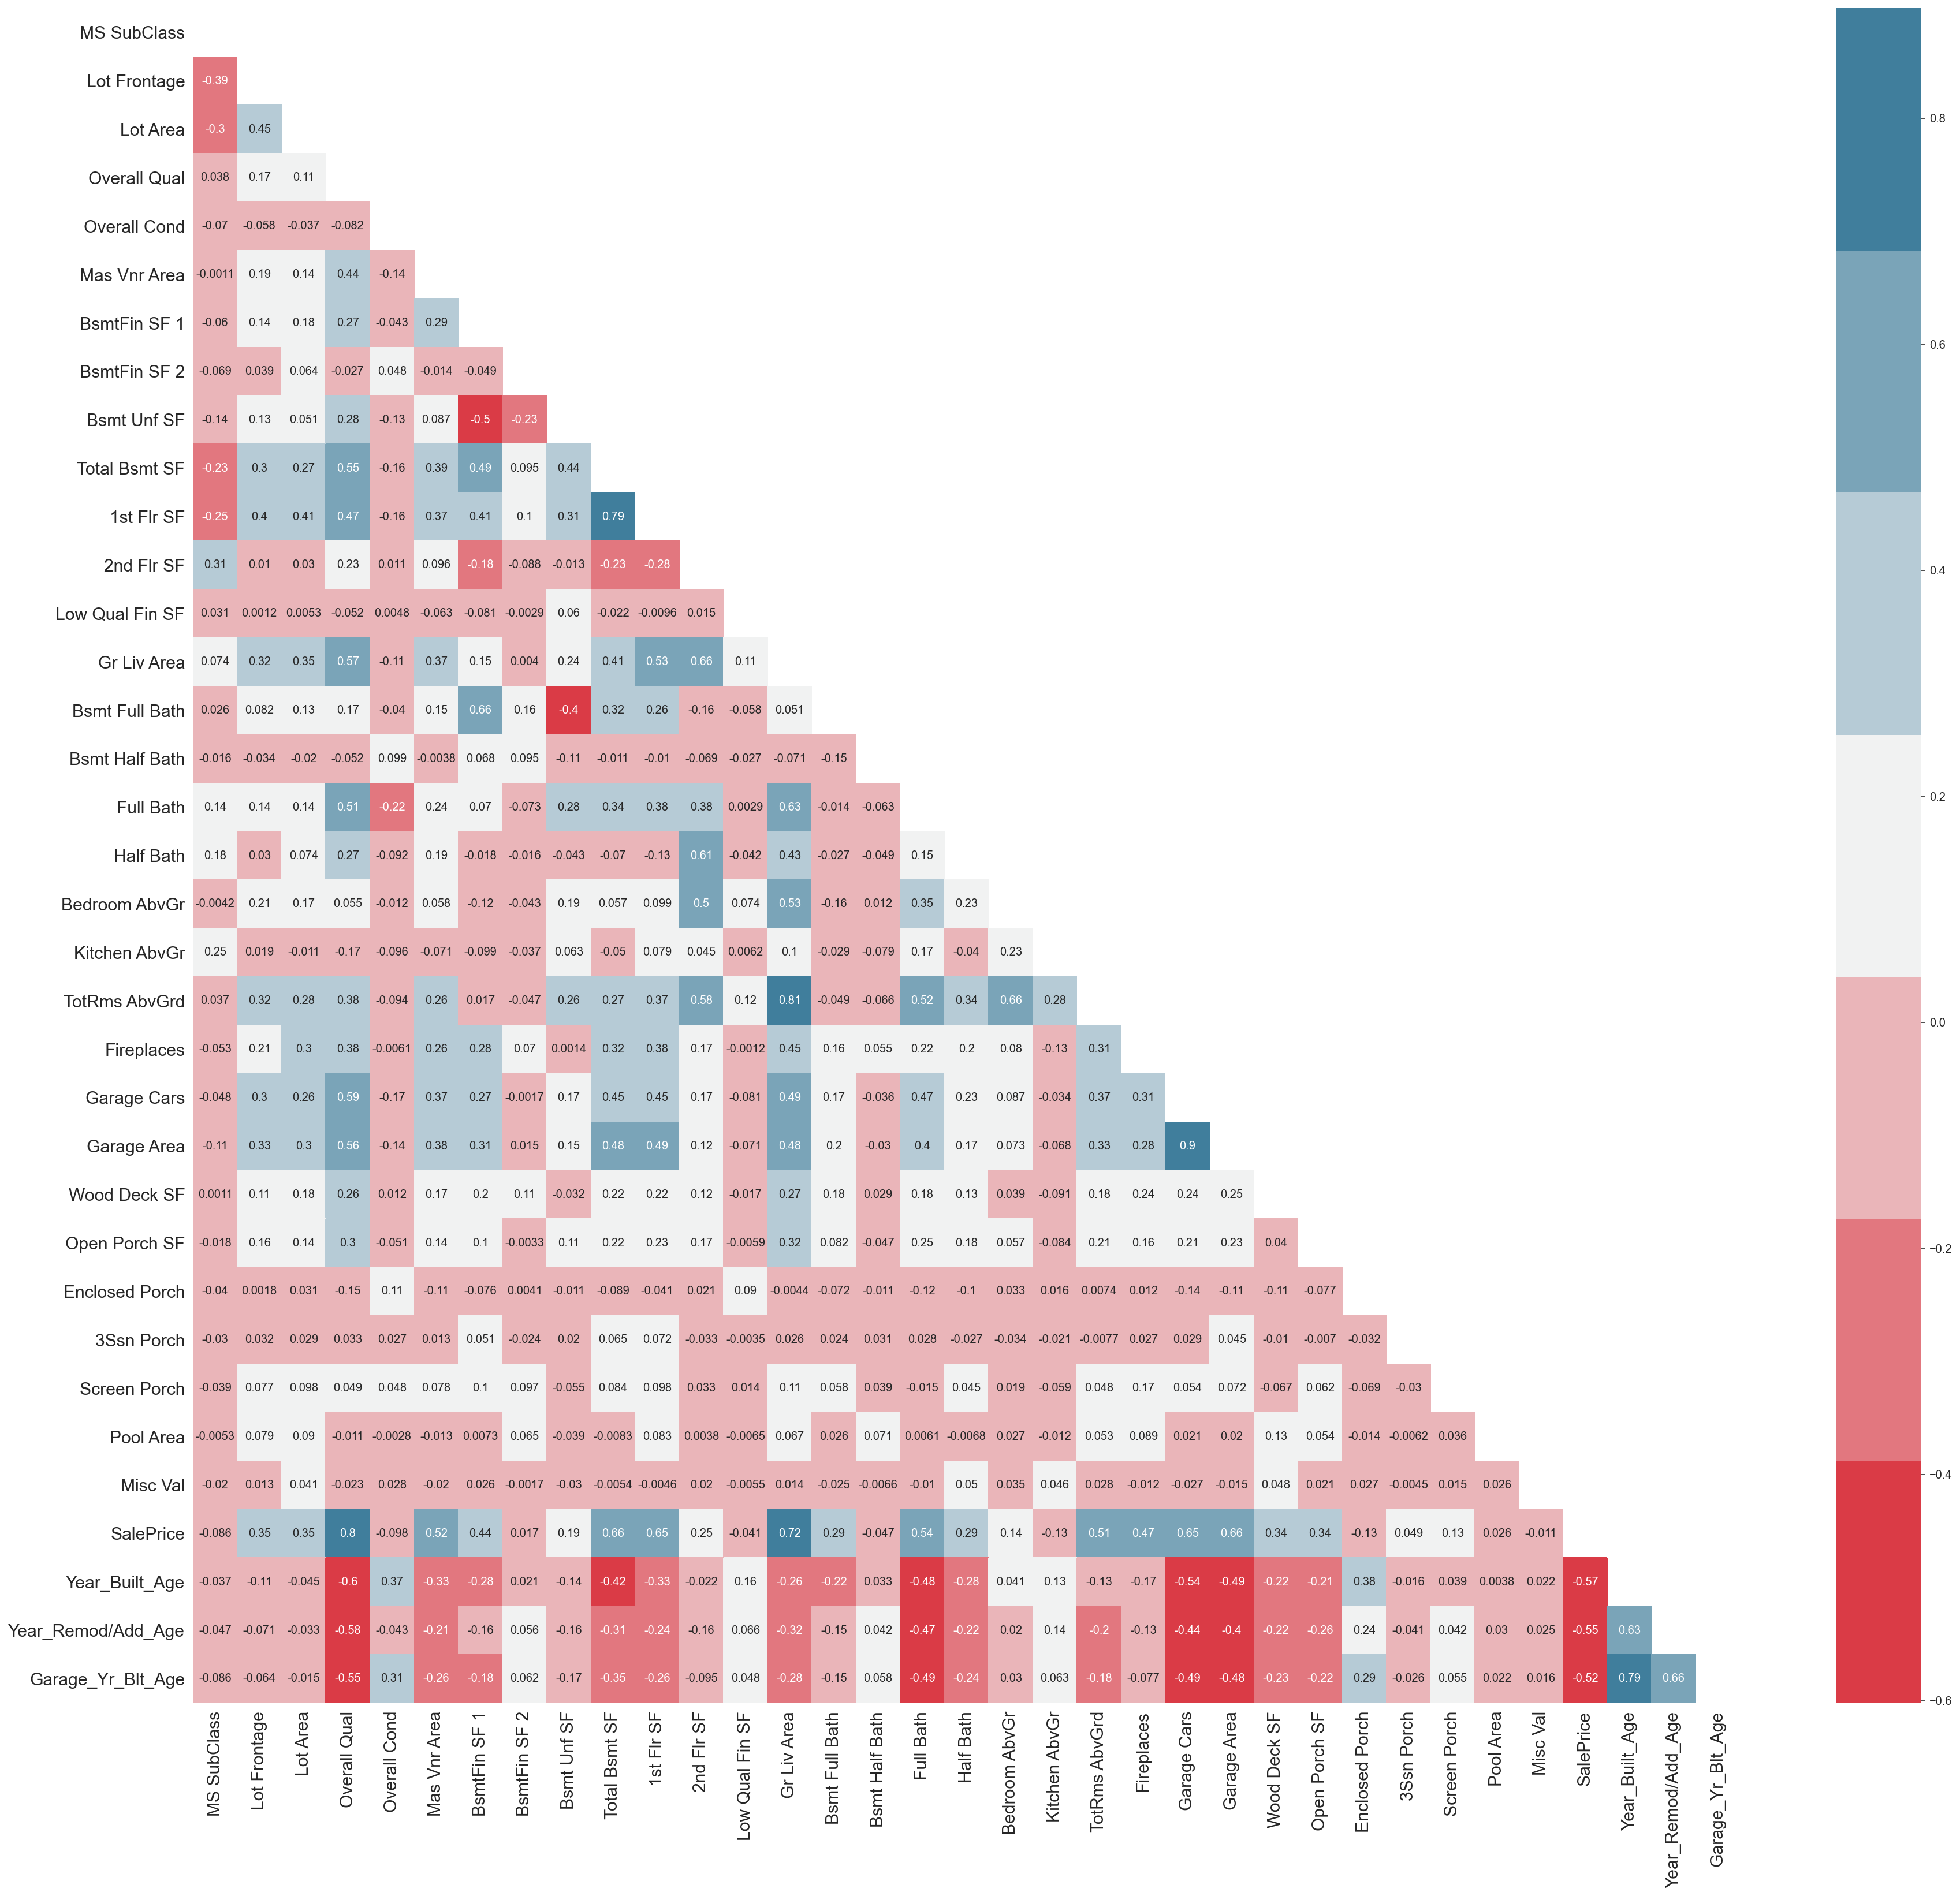

In [49]:
### Heatmap show the correlation value of all numerical features after delete outlier and replace null value

plt.figure(figsize=(30,27))
mask = np.zeros_like(df_norm_int_2.corr())
mask[np.triu_indices_from(mask)] = 1
ax = sns.heatmap(df_norm_int_2.corr(),annot=True,cmap=sns.diverging_palette(10, 590, n=7),mask=mask);
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=15)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=15)
plt.show()

## EDA and Cleaning Categorical data

In [50]:
check_type_train = df_train.dtypes.to_frame('types')
check_type_train

types
Id              int64
PID             int64
MS SubClass     int64
MS Zoning      object
Lot Frontage  float64
...               ...
Misc Val        int64
Mo Sold         int64
Yr Sold         int64
Sale Type      object
SalePrice       int64

[81 rows x 1 columns]

In [51]:
### Show only categorical features

len_of_type_object = len(check_type_train[check_type_train['types']=='object'].index)
print(f'Number of index (object) = {len_of_type_object}')
check_type_train[check_type_train['types']=='object'].index

Number of index (object) = 42


Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

In [52]:
### Filter only categorical data

df_train_obj = df_train[['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type','SalePrice']]

df_train_obj.head()

MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
0        RL   Pave   NaN       IR1          Lvl    AllPub    CulDSac   
1        RL   Pave   NaN       IR1          Lvl    AllPub    CulDSac   
2        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
3        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
4        RL   Pave   NaN       IR1          Lvl    AllPub     Inside   

  Land Slope Neighborhood Condition 1  ... Garage Type Garage Finish  \
0        Gtl       Sawyer        RRAe  ...      Attchd           RFn   
1        Gtl      SawyerW        Norm  ...      Attchd           RFn   
2        Gtl        NAmes        Norm  ...      Detchd           Unf   
3        Gtl       Timber        Norm  ...     BuiltIn           Fin   
4        Gtl      SawyerW        Norm  ...      Detchd           Unf   

  Garage Qual Garage Cond Paved Drive Pool QC Fence Misc Feature Sale Type  \
0          TA          TA           Y     NaN   NaN          NaN       WD    
1          TA          TA           Y     NaN   NaN          NaN       WD    
2          TA          TA           Y     NaN   NaN          NaN       WD    
3          TA          TA           Y     NaN   NaN          NaN       WD    
4          TA          TA           N     NaN   NaN          NaN       WD    

  SalePrice  
0    130500  
1    220000  
2    109000  
3    174000  
4    138500  

[5 rows x 43 columns]

In [53]:
df_train_obj.isnull().sum() # Check sum of null value for all categorical data 

MS Zoning            0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin Type 2      56
Heating              0
Heating QC           0
Central Air          0
Electrical           0
Kitchen Qual         0
Functional           0
Fireplace Qu      1000
Garage Type        113
Garage Finish      114
Garage Qual        114
Garage Cond        114
Paved Drive          0
Pool QC           2042
Fence             1651
Misc Feature      1986
Sale Type            0
SalePrice            0
dtype: int6

In [54]:
### Drop the column that has the missing value approximately >= 50% of all data.

df_train_obj = df_train_obj.drop(columns=['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature'])

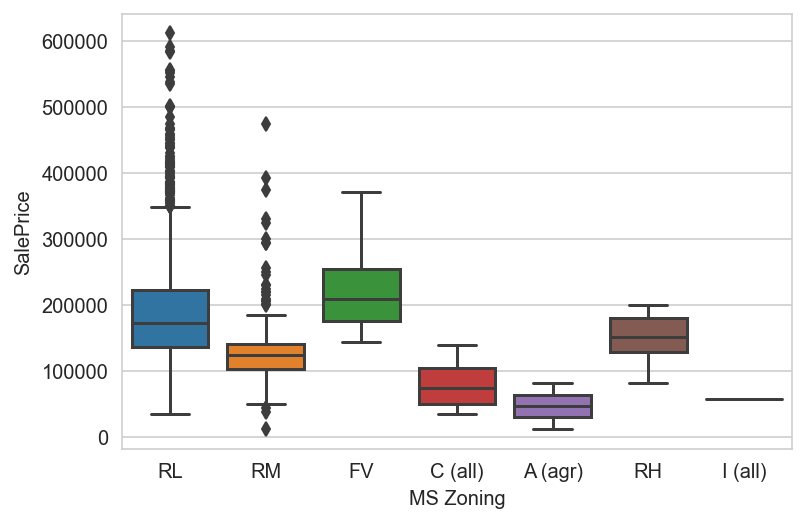

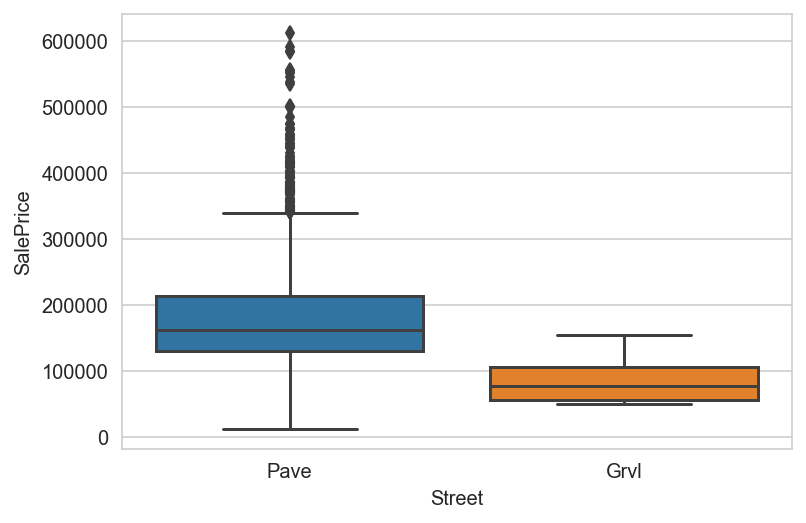

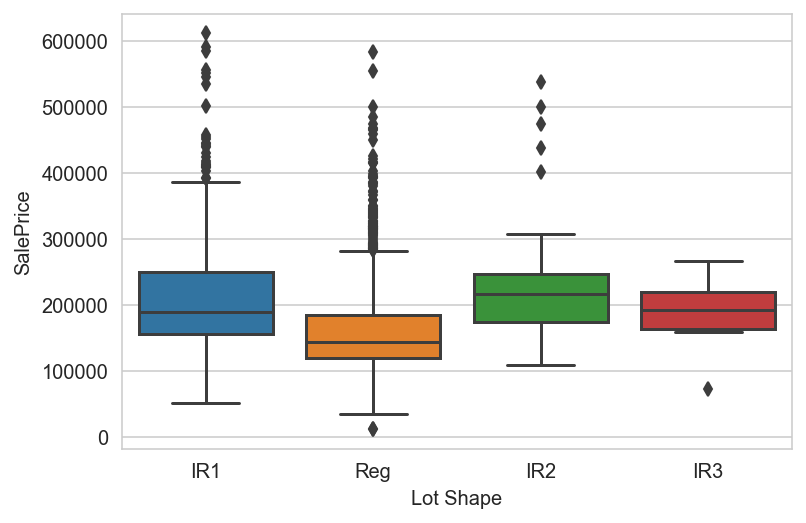

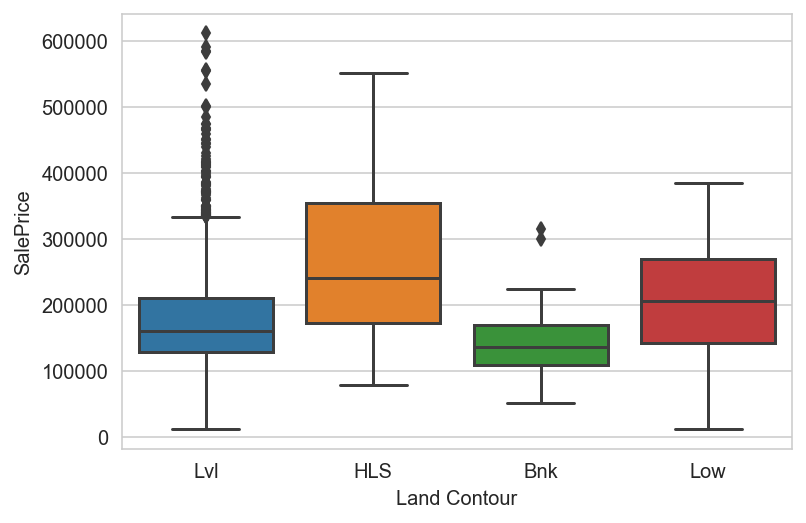

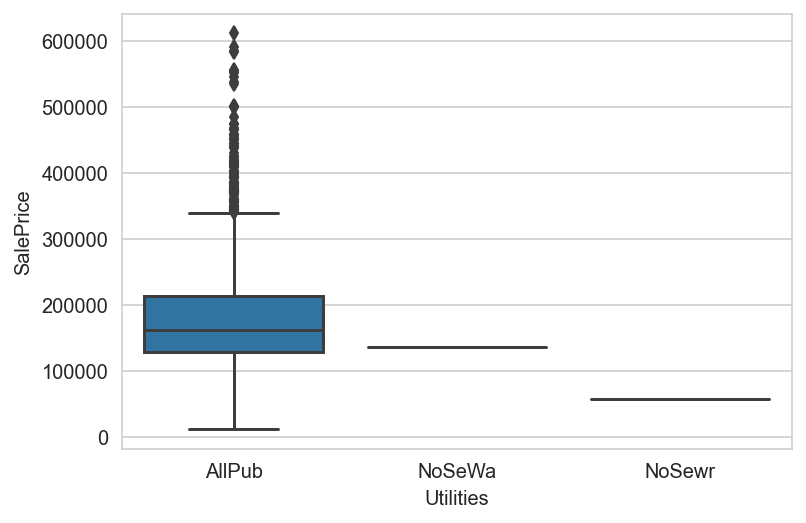

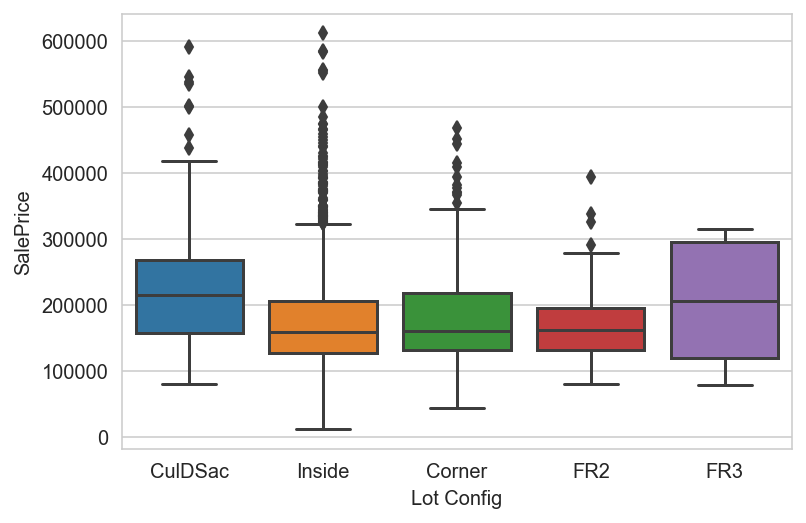

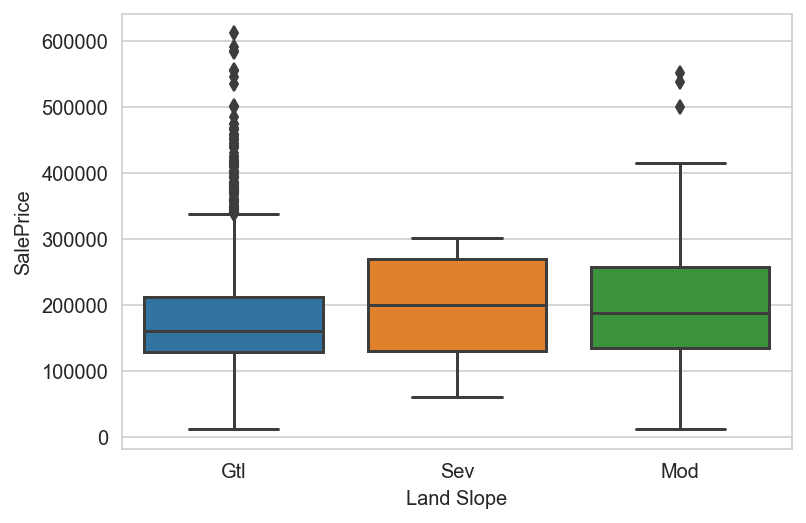

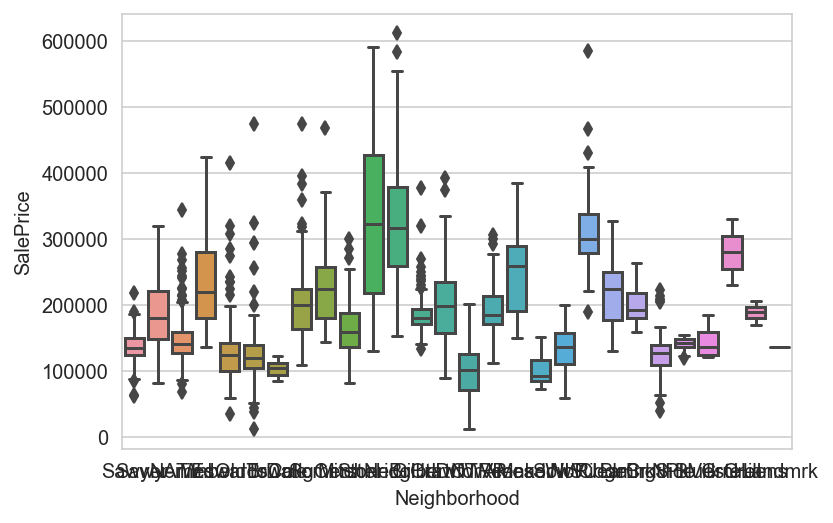

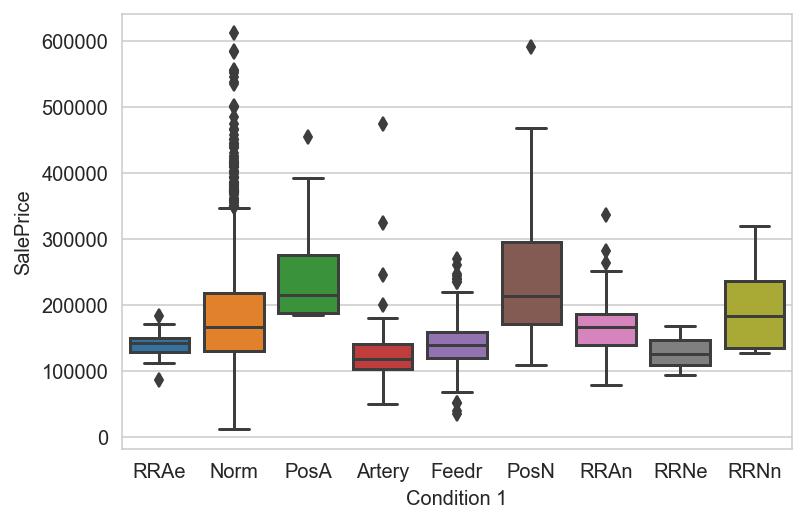

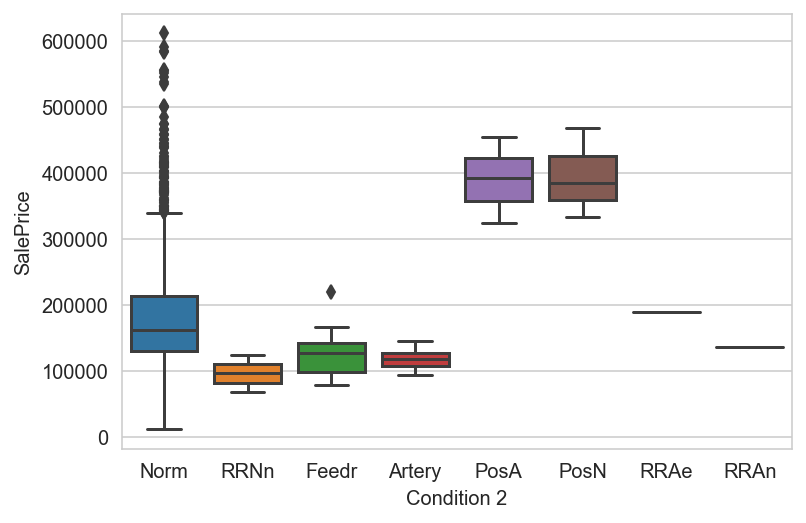

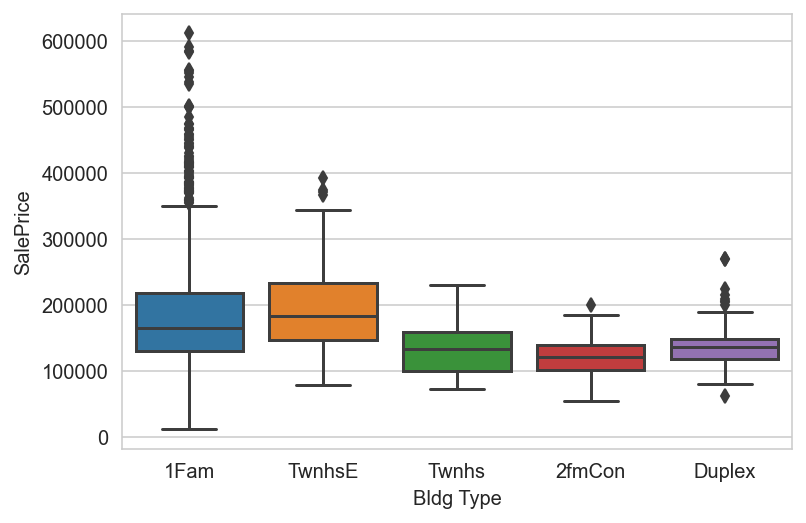

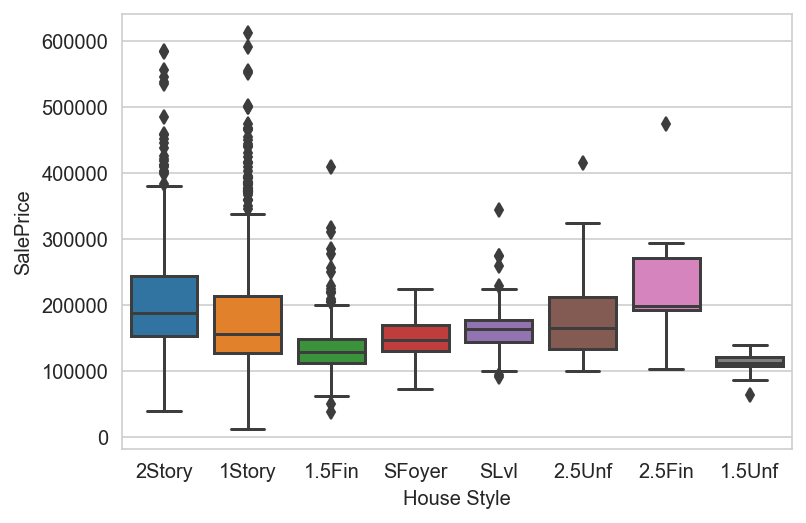

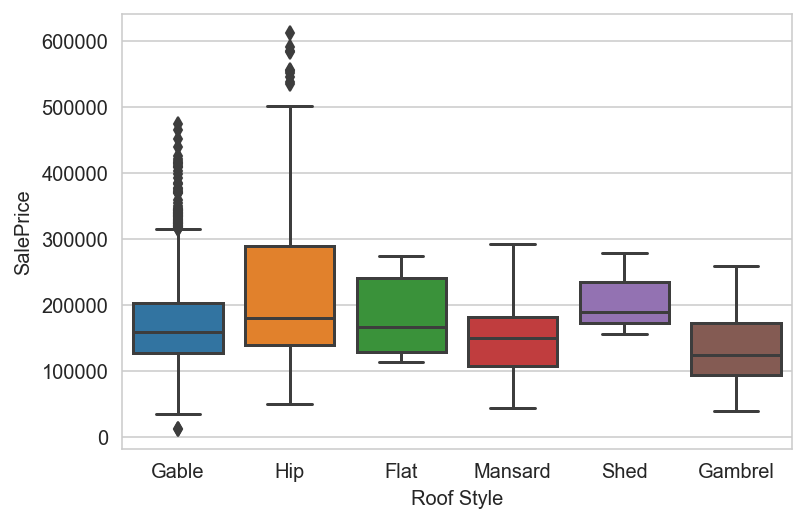

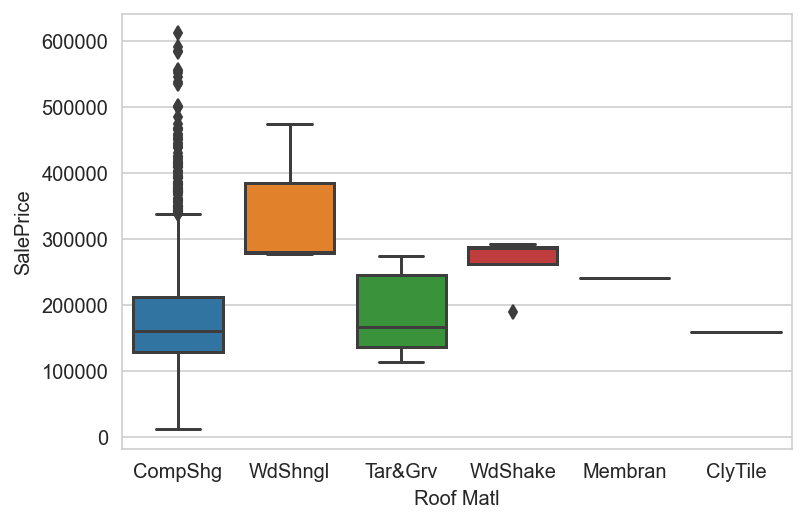

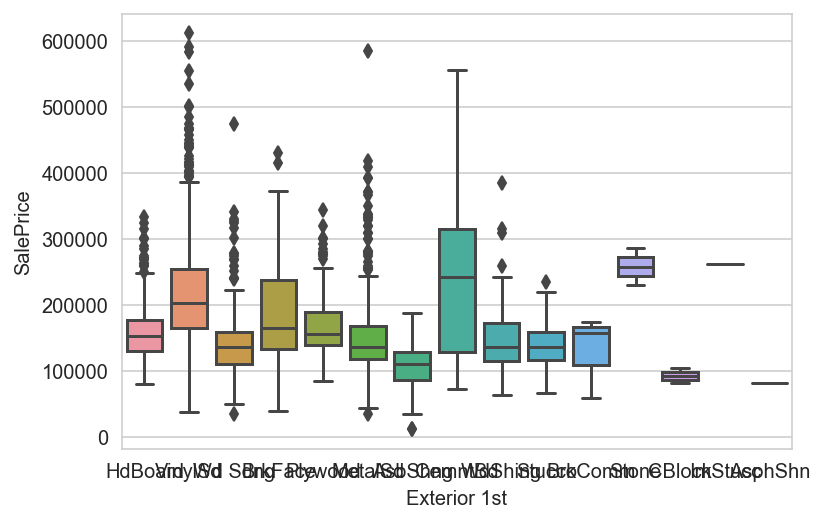

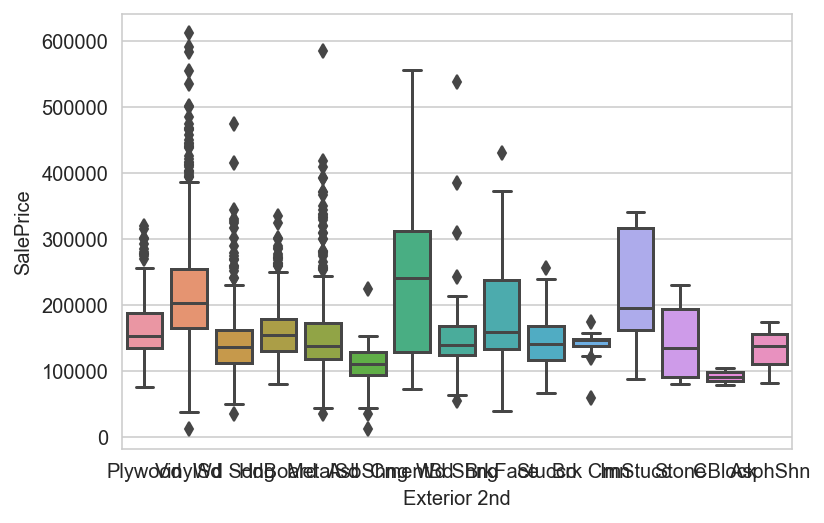

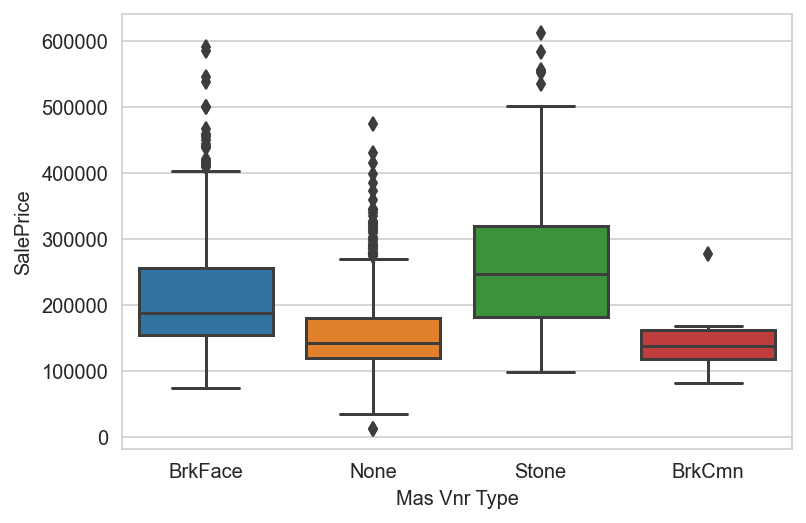

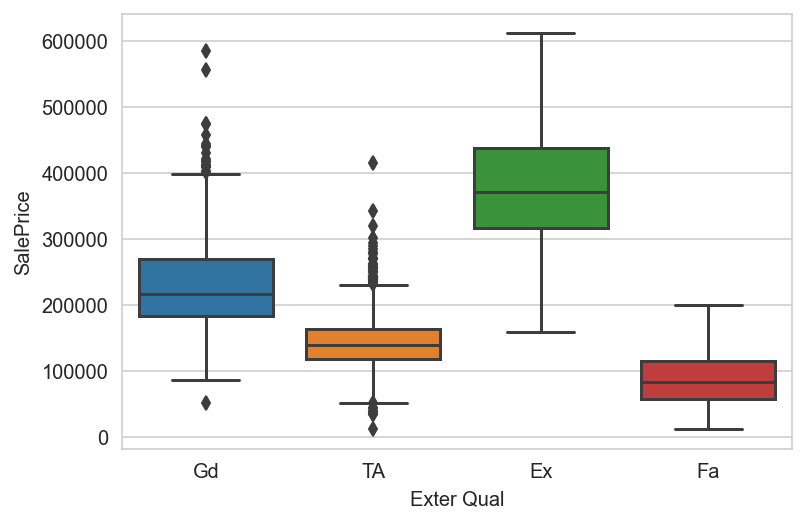

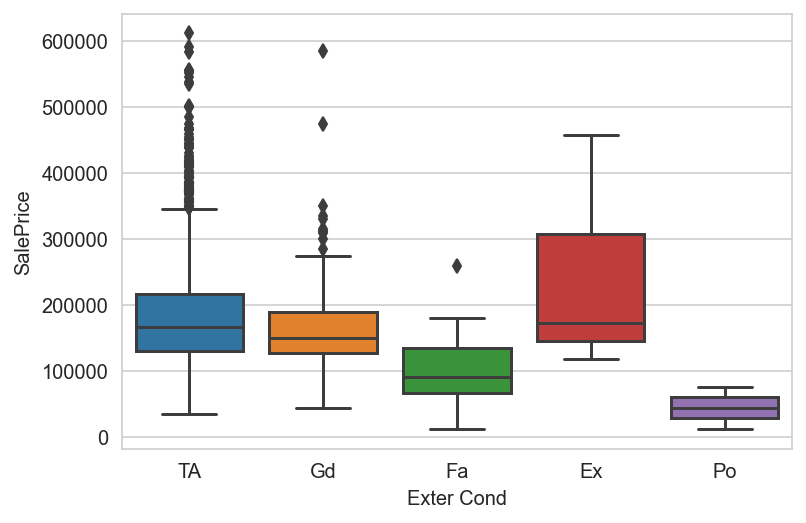

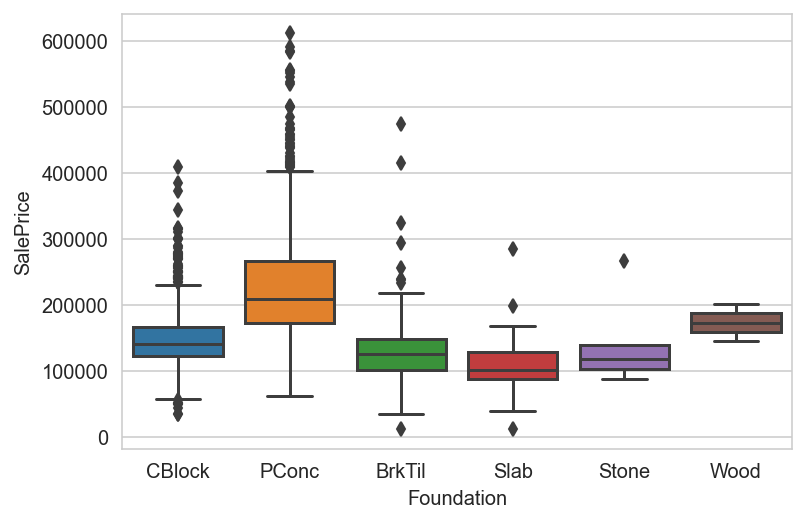

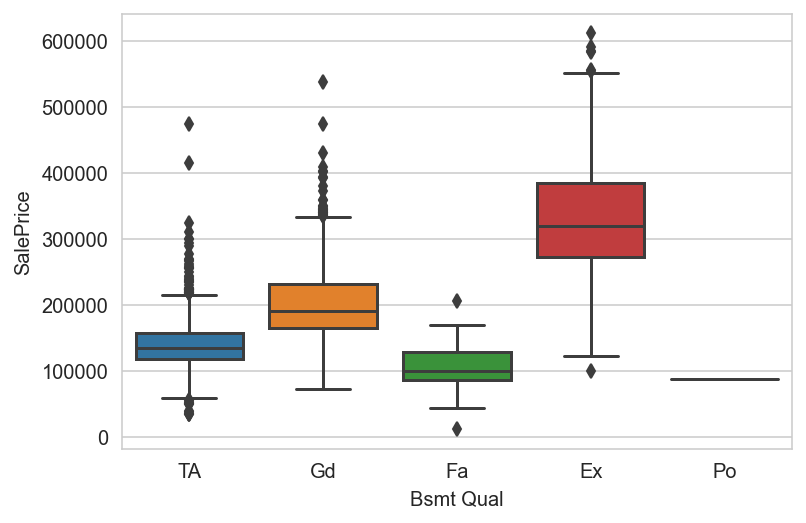

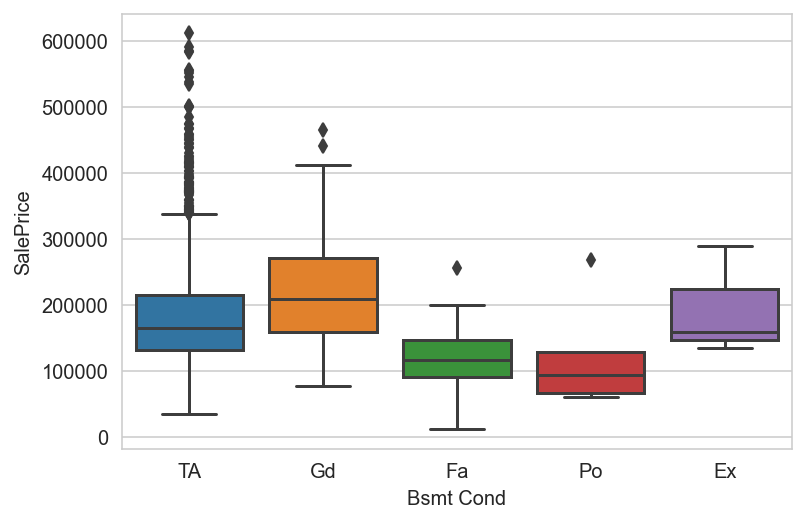

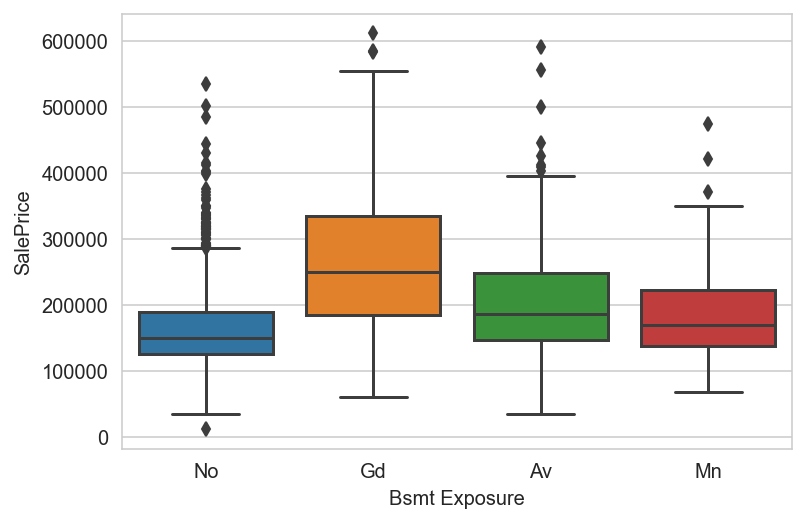

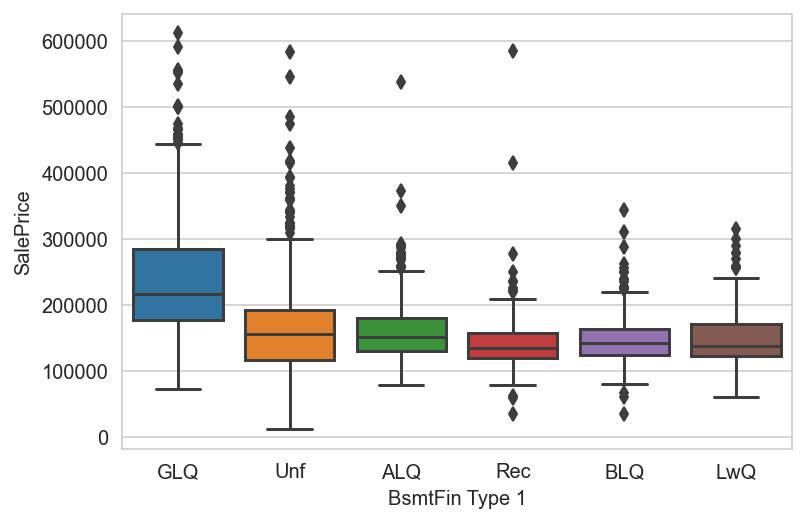

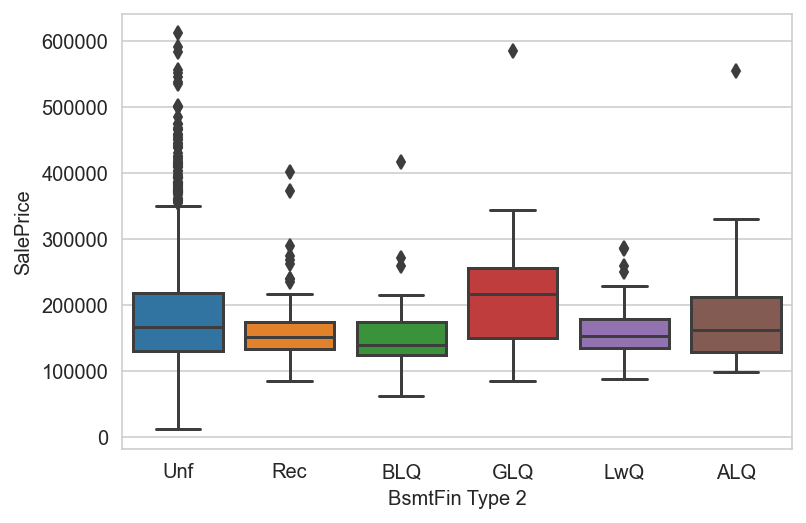

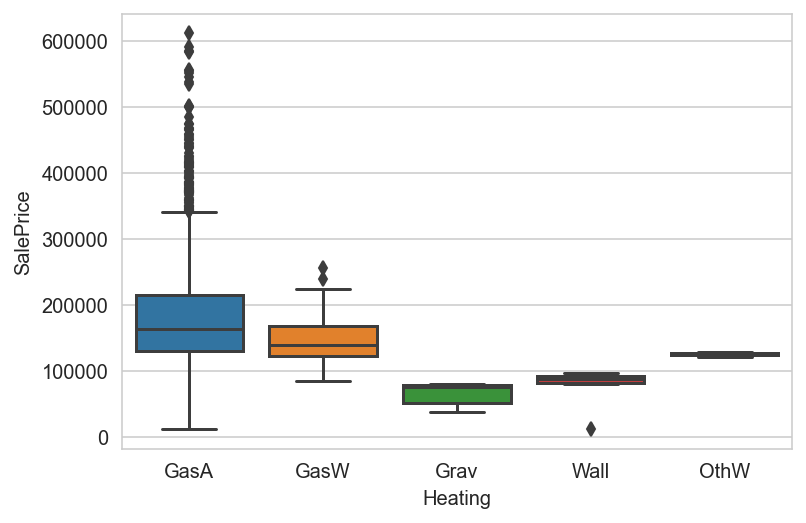

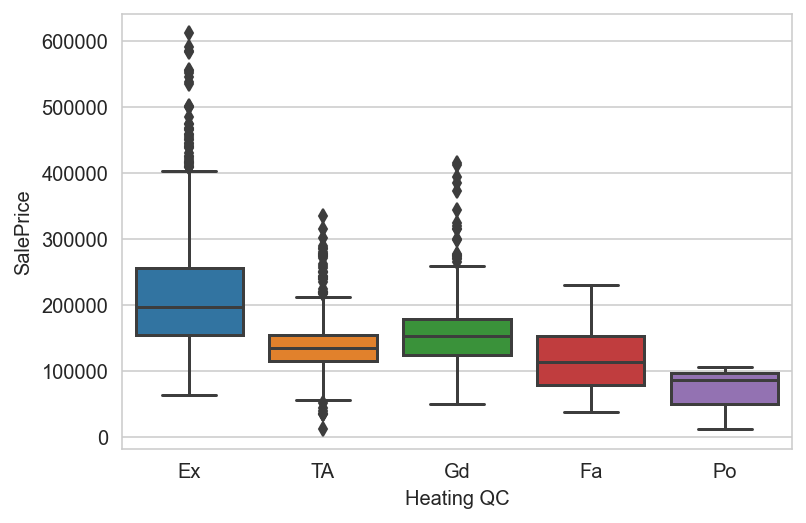

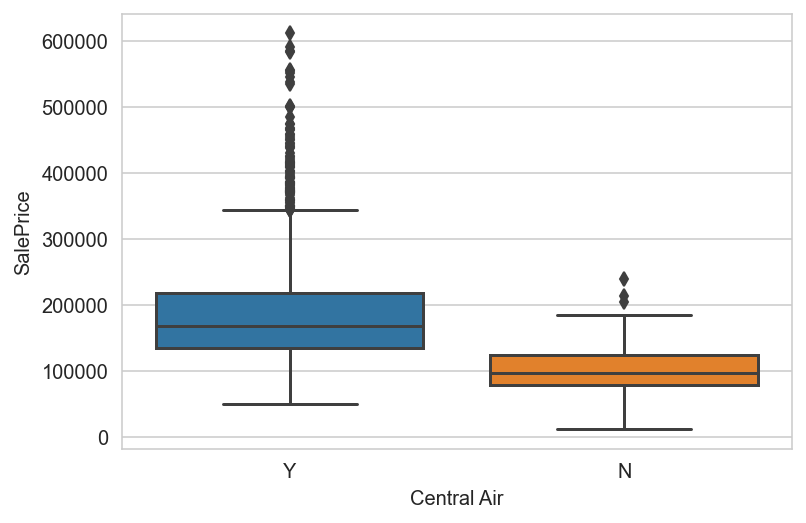

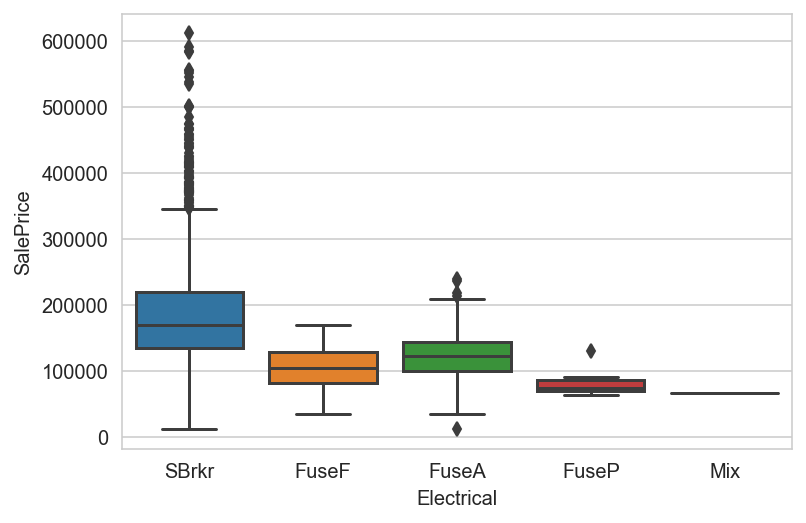

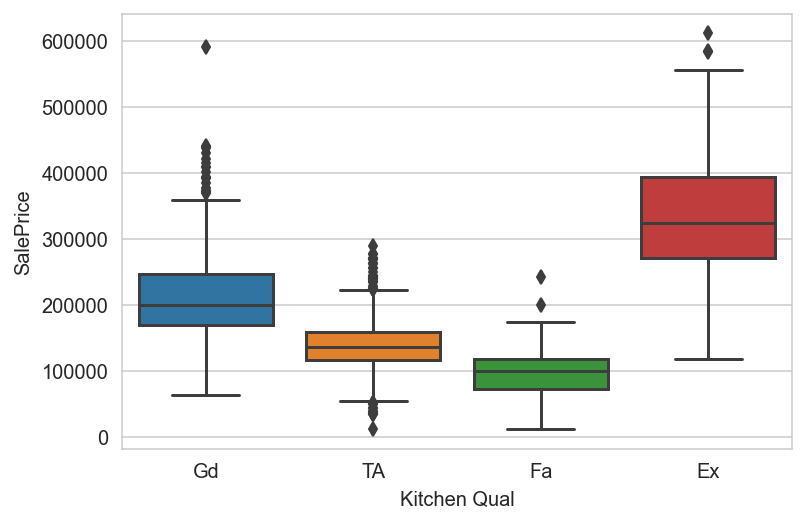

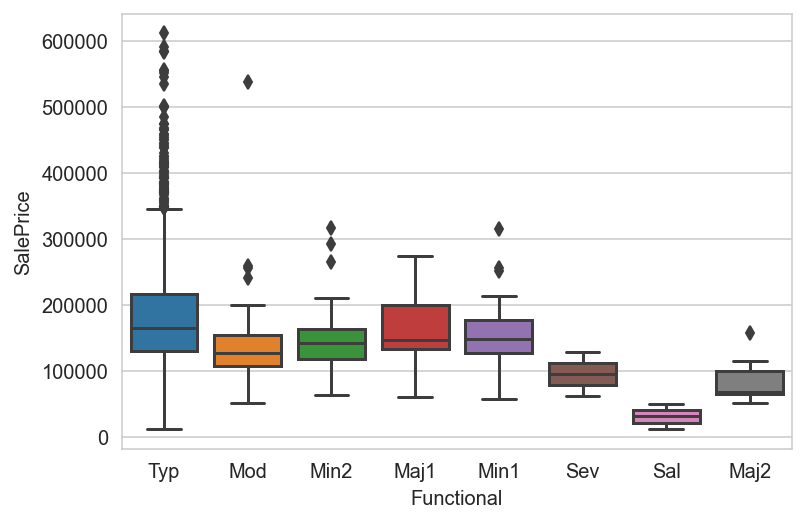

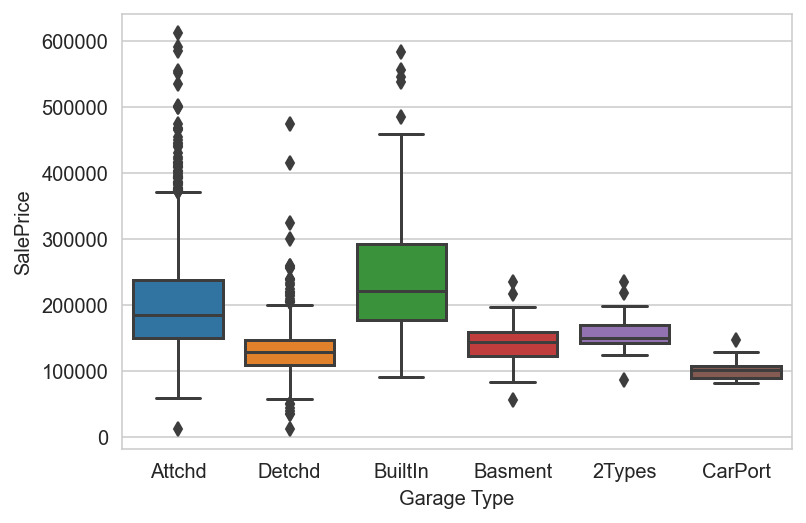

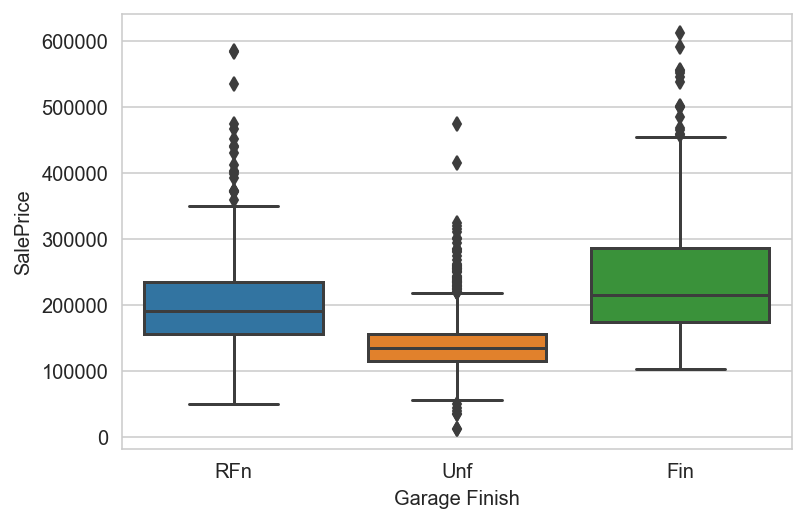

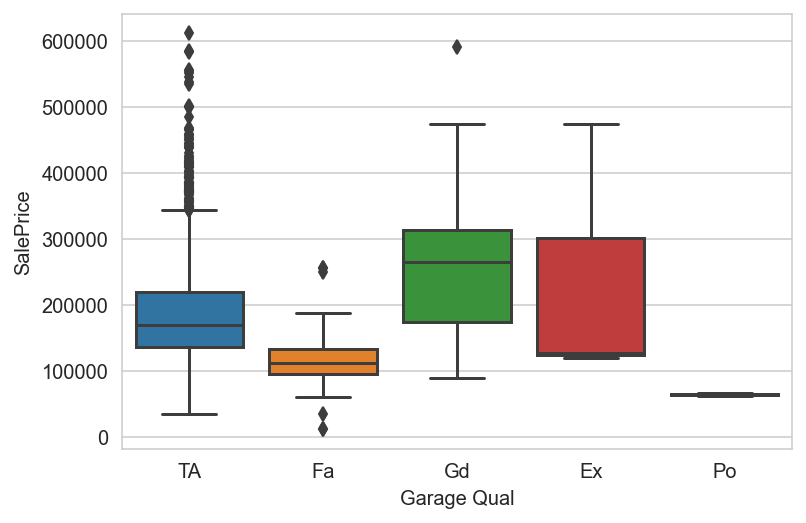

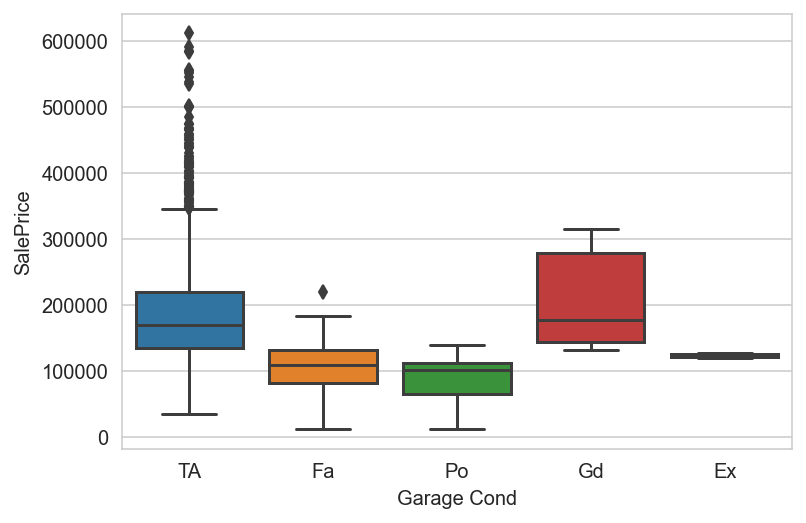

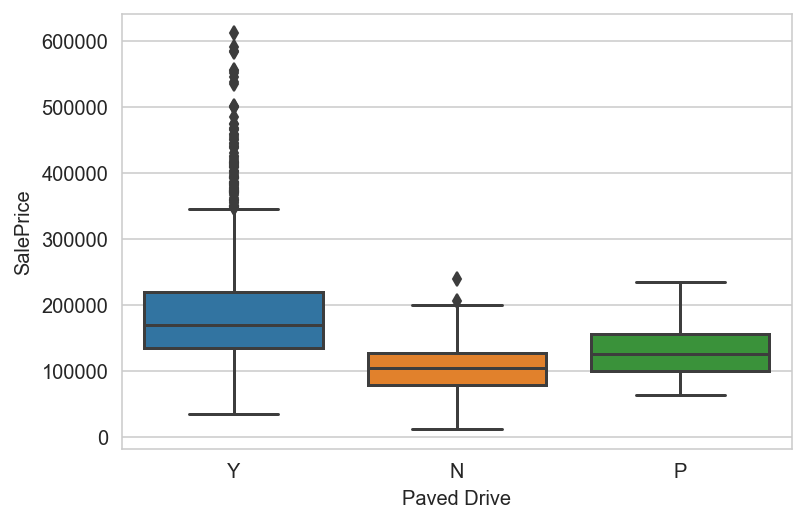

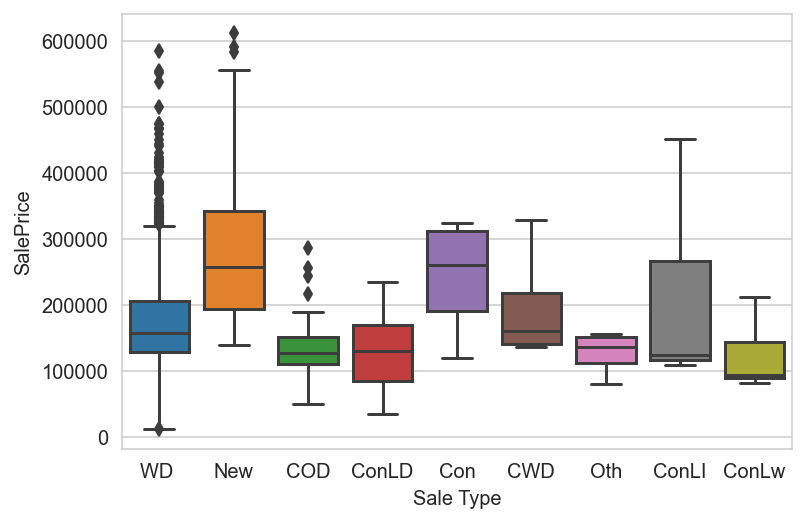

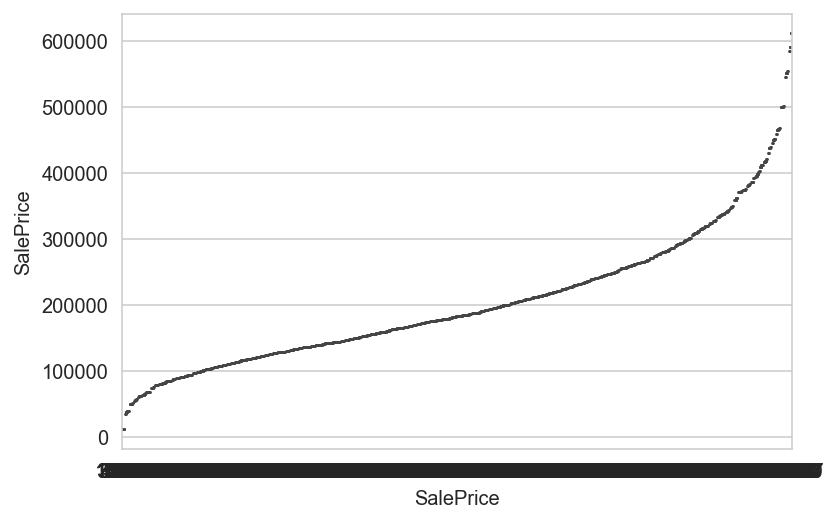

In [55]:
### Plot boxplot for showing the relation between SalePrice and all features
### I will choose to delete some column that it doesn't have the relation with SalePrice

for i in list(df_train_obj.columns):
    sns.boxplot(data = df_train_obj,x=i,y='SalePrice')
    plt.show()

In [56]:
df_train_obj.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'SalePrice'],
      dtype='object')

In [57]:
### Choose only columns that can use for prediction SalePrice

df_train_obj = df_train_obj[[
       'MS Zoning', 'Street', 'Land Contour', 'Utilities',
       'Condition 2', 'Roof Matl','Exter Qual',
       'Bsmt Qual', 'Heating', 'Kitchen Qual','Paved Drive', 'SalePrice']]

df_train_obj.head()

MS Zoning Street Land Contour Utilities Condition 2 Roof Matl Exter Qual  \
0        RL   Pave          Lvl    AllPub        Norm   CompShg         Gd   
1        RL   Pave          Lvl    AllPub        Norm   CompShg         Gd   
2        RL   Pave          Lvl    AllPub        Norm   CompShg         TA   
3        RL   Pave          Lvl    AllPub        Norm   CompShg         TA   
4        RL   Pave          Lvl    AllPub        Norm   CompShg         TA   

  Bsmt Qual Heating Kitchen Qual Paved Drive  SalePrice  
0        TA    GasA           Gd           Y     130500  
1        Gd    GasA           Gd           Y     220000  
2        TA    GasA           Gd           Y     109000  
3        Gd    GasA           TA           Y     174000  
4        Fa    GasA           TA           N     138500

In [58]:
### From checking the sum of null value, feature "Bsmt Qual" has sum of null value equal to 55 values

df_train_obj.isnull().sum()

MS Zoning        0
Street           0
Land Contour     0
Utilities        0
Condition 2      0
Roof Matl        0
Exter Qual       0
Bsmt Qual       55
Heating          0
Kitchen Qual     0
Paved Drive      0
SalePrice        0
dtype: int64

In [59]:
### Check the sum of each categories of feature "Bsmt Qual"

df_train_obj['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [60]:
### Find the name of category that has the maximum value
### Then replacing null value

mode_Bsmt_Qual = df_train_obj['Bsmt Qual'].value_counts().to_frame('count').index[0]
mode_Bsmt_Qual

'TA'

In [61]:
### Replace null value with mode_Bsmt_Qual

df_train_obj['Bsmt Qual'] = df_train_obj[['Bsmt Qual']].fillna(mode_Bsmt_Qual)

In [62]:
df_train_obj.isnull().sum()

MS Zoning       0
Street          0
Land Contour    0
Utilities       0
Condition 2     0
Roof Matl       0
Exter Qual      0
Bsmt Qual       0
Heating         0
Kitchen Qual    0
Paved Drive     0
SalePrice       0
dtype: int64

In [63]:
df_train_obj.head()

MS Zoning Street Land Contour Utilities Condition 2 Roof Matl Exter Qual  \
0        RL   Pave          Lvl    AllPub        Norm   CompShg         Gd   
1        RL   Pave          Lvl    AllPub        Norm   CompShg         Gd   
2        RL   Pave          Lvl    AllPub        Norm   CompShg         TA   
3        RL   Pave          Lvl    AllPub        Norm   CompShg         TA   
4        RL   Pave          Lvl    AllPub        Norm   CompShg         TA   

  Bsmt Qual Heating Kitchen Qual Paved Drive  SalePrice  
0        TA    GasA           Gd           Y     130500  
1        Gd    GasA           Gd           Y     220000  
2        TA    GasA           Gd           Y     109000  
3        Gd    GasA           TA           Y     174000  
4        Fa    GasA           TA           N     138500

In [64]:
### Get dummies for OneHotEncoding categorical feature

df_train_obj_dum = pd.get_dummies(df_train_obj,columns = ['MS Zoning', 'Street', 'Land Contour',
                                                          'Utilities','Condition 2', 'Roof Matl',
                                                          'Exter Qual','Bsmt Qual', 'Heating',
                                                          'Kitchen Qual','Paved Drive'])

In [65]:
### After OneHotEncoding, it has 51 categorical features 

df_train_obj_dum

SalePrice  MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  \
0        130500                  0                  0             0   
1        220000                  0                  0             0   
2        109000                  0                  0             0   
3        174000                  0                  0             0   
4        138500                  0                  0             0   
...         ...                ...                ...           ...   
2046     298751                  0                  0             0   
2047      82500                  0                  0             0   
2048     177000                  0                  0             0   
2049     144000                  0                  0             0   
2050     189000                  0                  0             0   

      MS Zoning_I (all)  MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  \
0                     0             0             1             0   
1                     0             0             1             0   
2                     0             0             1             0   
3                     0             0             1             0   
4                     0             0             1             0   
...                 ...           ...           ...           ...   
2046                  0             0             1             0   
2047                  0             0             1             0   
2048                  0             0             1             0   
2049                  0             0             1             0   
2050                  0             0             1             0   

      Street_Grvl  Street_Pave  ...  Heating_Grav  Heating_OthW  Heating_Wall  \
0               0            1  ...             0             0             0   
1               0            1  ...             0             0             0   
2               0            1  ...             0             0             0   
3               0            1  ...             0             0             0   
4               0            1  ...             0             0             0   
...           ...          ...  ...           ...           ...           ...   
2046            0            1  ...             0             0             0   
2047            0            1  ...             0             0             0   
2048            0            1  ...             0             0             0   
2049            0            1  ...             0             0             0   
2050            0            1  ...             0             0             0   

      Kitchen Qual_Ex  Kitchen Qual_Fa  Kitchen Qual_Gd  Kitchen Qual_TA  \
0                   0                0                1                0   
1                   0                0                1                0   
2                   0                0                1                0   
3                   0                0                0                1   
4                   0                0                0                1   
...               ...              ...              ...              ...   
2046                0                0                1                0   
2047                0                0                0                1   
2048                0                0                0                1   
2049                0                0                0                1   
2050                0                0                1                0   

      Paved Drive_N  Paved Drive_P  Paved Drive_Y  
0                 0              0              1  
1                 0              0              1  
2                 0              0              1  
3                 0              0              1  
4                 1              0              0  
...             ...            ...            ...  
2046              0              0              1  
2047              0   

## Use the Numerical data for prediction

In [67]:
X = df_train_int.drop(columns = ['SalePrice'])
y = df_train_int['SalePrice']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1532, 34)
(511, 34)
(1532,)
(511,)


## Standard Scaler

In [70]:
ss = StandardScaler()
ss_train = ss.fit_transform(X_train)
ss_test = ss.transform(X_test)

## Cross Validation

In [71]:
### Print the R2 for each K value

def cross(model,X,y):
    for i in range(5,11):
        result = cross_val_score(model,X,y,cv=i).mean()
        print(f'K = {i} >>>> R2 = {result}')

### Linear Regression

In [72]:
lr = LinearRegression()
lr.fit(ss_train,y_train)

LinearRegression()

In [73]:
lr.coef_

array([-3.72054465e+03,  2.51961981e+03,  5.87056878e+03,  2.21744027e+04,
        3.92596515e+03,  5.47810560e+03, -7.51629253e+17, -2.80615776e+17,
       -7.78723448e+17,  7.37353110e+17, -5.52255888e+17, -6.23583516e+17,
       -7.58111197e+16,  7.20537515e+17,  1.92430379e+03, -5.52753179e+02,
       -3.68041655e+02, -1.38017863e+03, -8.04259881e+03, -2.76737310e+03,
        6.48744472e+03,  2.88376497e+03, -9.11597915e+02,  5.87940366e+03,
        1.30010300e+03,  2.21755990e+02,  9.29555404e+02,  2.70746950e+02,
        4.22996992e+03,  5.20975990e+00, -5.97714986e+02, -8.82264958e+03,
       -5.10902836e+03, -3.02309605e+03])

In [74]:
### Showing the comparison of Training and Testing RMSE & R2

r2_lr = lr.score(ss_train,y_train)
r2_lr_cv = cross_val_score(lr, ss_train, y_train, cv=5).mean()
r2_lr_test = lr.score(ss_test,y_test)

rmse_lr = np.sqrt(mean_squared_error(y_train, lr.predict(ss_train)))
rmse_lr_CV = np.abs(cross_val_score(lr, ss_train, y_train, cv=5, scoring='neg_root_mean_squared_error')).mean()
rmse_lr_CV_test = np.sqrt(mean_squared_error(y_test, lr.predict(ss_test)))

print(f'Linear Regression >>\nTraining RMSE = {rmse_lr}\nTraining RMSE CV = {rmse_lr_CV}\nTesting RMSE = {rmse_lr_CV_test}\n-------------------------------\nTraining R2 = {r2_lr}\nTraining R2 CV = {r2_lr_cv}\nTesting R2 = {r2_lr_test}')

Linear Regression >>
Training RSME = 28308.45198506379
Training RSME CV = 29651.766789450725
Testing RSME = 26946.009793111323
-------------------------------
Training R2 = 0.870698789333173
Training R2 CV = 0.8560977561534816
Testing R2 = 0.8890574034622738


In [76]:
### Train = 75%, Test = 25%
model = lr
cross(model,ss_train,y_train)

K = 5 >>>> R2 = 0.8560977561534816
K = 6 >>>> R2 = 0.8587982616808012
K = 7 >>>> R2 = 0.8593940026410831
K = 8 >>>> R2 = 0.8626996424778921
K = 9 >>>> R2 = 0.8598400318072361
K = 10 >>>> R2 = 0.8578812575695771


### Ridge Regression

In [77]:
ridge = Ridge(alpha=100)
ridge.fit(ss_train,y_train)

Ridge(alpha=100)

In [78]:
ridge.coef_

array([-3178.87808857,  2220.03556639,  5614.56800893, 19469.58153946,
        3613.76622062,  5844.98874169,  8455.33359115,   185.83030287,
         799.4249193 ,  9534.0398249 ,  7766.88868217,  8882.77228438,
       -1469.89242171, 13485.80190045,  2260.8854679 ,  -629.41814448,
         653.56380326,   175.18992779, -6716.63668507, -3045.85858328,
        6293.52929273,  3480.40905403,   762.04036481,  4922.97886944,
        1718.71115905,   653.87286762,   740.03273376,   236.19853341,
        3630.03758039,   -35.34277939,  -672.2258038 , -7349.7272234 ,
       -5260.28888603, -3436.24154955])

In [79]:
### Showing the comparison of Training and Testing RMSE & R2

r2_ridge = ridge.score(ss_train,y_train)
r2_ridge_cv = cross_val_score(ridge, ss_train, y_train, cv=5).mean()
r2_ridge_test = ridge.score(ss_test,y_test)

rmse_ridge = np.sqrt(mean_squared_error(y_train, ridge.predict(ss_train)))
rmse_ridge_CV = np.abs(cross_val_score(ridge, ss_train, y_train, cv=5, scoring='neg_root_mean_squared_error')).mean()
rmse_ridge_CV_test = np.sqrt(mean_squared_error(y_test, ridge.predict(ss_test)))

print(f'Ridge Regression >>\nTraining RMSE = {rmse_ridge}\nTraining RMSE CV = {rmse_ridge_CV}\nTesting RMSE = {rmse_ridge_CV_test}\n-------------------------------\nTraining R2 = {r2_ridge}\nTraining R2 CV = {r2_ridge_cv}\nTesting R2 = {r2_ridge_test}')

Ridge Regression >>
Training RSME = 28384.493647459854
Training RSME CV = 29359.163548557008
Testing RSME = 27364.45757596212
-------------------------------
Training R2 = 0.8700032031060632
Training R2 CV = 0.8591088380580884
Testing R2 = 0.8855849677770814


In [80]:
### Train = 75%, Test = 25%
model = ridge
cross(model,ss_train,y_train)

K = 5 >>>> R2 = 0.8591088380580884
K = 6 >>>> R2 = 0.8593890915493768
K = 7 >>>> R2 = 0.8599312811369192
K = 8 >>>> R2 = 0.8628691483623052
K = 9 >>>> R2 = 0.8600145600297152
K = 10 >>>> R2 = 0.8585345906908699


### Ridge CV

In [81]:
r_alphas = np.arange(1, 1000, 1)
ridge_model_cv = RidgeCV(r_alphas,store_cv_values=True)
ridge_model_cv.fit(ss_train,y_train)

RidgeCV(alphas=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109,...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 97

In [82]:
### Find the best of ridge_alpha by using RidgeCV

ridge_optimal_alpha = ridge_model_cv.alpha_
ridge_optimal_alpha

39

In [83]:
### Use the best ridge alpha for Ridge model (not RidgeCV)

ridge_optimal_cv = Ridge(alpha=ridge_optimal_alpha)
ridge_optimal_cv.fit(ss_train,y_train)

Ridge(alpha=39)

In [84]:
ridge_optimal_cv.coef_

array([-3.50552979e+03,  2.13858675e+03,  5.88429057e+03,  2.05401297e+04,
        3.85047071e+03,  5.71561253e+03,  8.69190163e+03,  1.86452125e+02,
        7.18795044e+02,  9.69027104e+03,  7.80126222e+03,  9.98988839e+03,
       -1.49554060e+03,  1.44675938e+04,  2.03245277e+03, -5.80360698e+02,
       -1.08261490e+02, -5.74995979e+02, -7.60591053e+03, -2.76454751e+03,
        6.27508943e+03,  3.09172765e+03, -1.28435030e+02,  5.08349504e+03,
        1.55427038e+03,  3.88350514e+02,  8.16082975e+02,  2.05833940e+02,
        3.68229708e+03, -1.37797299e+00, -6.98799733e+02, -8.30117998e+03,
       -4.97742168e+03, -3.18214894e+03])

In [85]:
### Showing the comparison of Training and Testing RMSE & R2

r2_ridge_2 = ridge_optimal_cv.score(ss_train,y_train)
r2_ridge_cv_2 = cross_val_score(ridge_optimal_cv, ss_train, y_train, cv=5).mean()
r2_ridge_test_2 = ridge_optimal_cv.score(ss_test,y_test)

rmse_ridge_2 = np.sqrt(mean_squared_error(y_train, ridge_optimal_cv.predict(ss_train)))
rmse_ridge_CV_2 = np.abs(cross_val_score(ridge_optimal_cv, ss_train, y_train, cv=5, scoring='neg_root_mean_squared_error')).mean()
rmse_ridge_CV_test_2 = np.sqrt(mean_squared_error(y_test, ridge_optimal_cv.predict(ss_test)))

print(f'RidgeCV Regression >>\nTraining RMSE = {rmse_ridge_2}\nTraining RMSE CV = {rmse_ridge_CV_2}\nTesting RMSE = {rmse_ridge_CV_test_2}\n-------------------------------\nTraining R2 = {r2_ridge_2}\nTraining R2 CV = {r2_ridge_cv_2}\nTesting R2 = {r2_ridge_test_2}')

RidgeCV Regression >>
Training RSME = 28289.48957448324
Training RSME CV = 29313.673723709617
Testing RSME = 27090.869807143317
-------------------------------
Training R2 = 0.8708719560931698
Training R2 CV = 0.859347542905579
Testing R2 = 0.887861356630974


In [86]:
### Train = 75%, Test = 25%
model = ridge_optimal_cv
cross(model,ss_train,y_train)

K = 5 >>>> R2 = 0.859347542905579
K = 6 >>>> R2 = 0.8594855080591627
K = 7 >>>> R2 = 0.860160395259321
K = 8 >>>> R2 = 0.8631033259643892
K = 9 >>>> R2 = 0.8602031521681252
K = 10 >>>> R2 = 0.8587050412508079


### Lasso CV

In [87]:
l_alphas = np.arange(300, 3000, 1)
lasso_model_cv = LassoCV(alphas = l_alphas, cv=5)
lasso_model_cv.fit(ss_train,y_train);

In [88]:
### Finding the best Lasso alpha by using LassoCV

lasso_optimal_alpha = lasso_model_cv.alpha_
lasso_optimal_alpha

472

In [89]:
### Use the best Lasso alpha for Lasso model (not LassoCV)

lasso_optimal_cv = Lasso(alpha=lasso_optimal_alpha)
lasso_optimal_cv.fit(ss_train,y_train)

Lasso(alpha=472)

In [90]:
lasso_optimal_cv.coef_

array([-3285.73165569,  2014.14113312,  5814.01760392, 22011.51645907,
        3127.88470569,  5358.39618587,  8225.68487458,     0.        ,
          -0.        ,  9869.26021963,     0.        ,     0.        ,
       -2159.01256816, 26084.34905701,  1731.68114014,  -113.66689276,
           0.        ,    -0.        , -6690.21135165, -2385.82900322,
        4612.04697929,  2708.25832254,     0.        ,  5016.06340619,
        1176.64815188,     0.        ,     0.        ,     0.        ,
        3229.94200158,     0.        ,  -143.76563198, -7467.48178975,
       -5003.19397962, -2497.26173854])

In [91]:
### Showing the comparison of Training and Testing RMSE & R2

r2_lasso = lasso_optimal_cv.score(ss_train,y_train)
r2_lasso_cv = cross_val_score(lasso_optimal_cv, ss_train, y_train, cv=5).mean()
r2_lasso_test = lasso_optimal_cv.score(ss_test,y_test)

rmse_lasso = np.sqrt(mean_squared_error(y_train, lasso_optimal_cv.predict(ss_train)))
rmse_lasso_CV = np.abs(cross_val_score(lasso_optimal_cv, ss_train, y_train, cv=5, scoring='neg_root_mean_squared_error')).mean()
rmse_lasso_CV_test = np.sqrt(mean_squared_error(y_test, lasso_optimal_cv.predict(ss_test)))

print(f'LassoCV Regression >>\nTraining RMSE = {rmse_lasso}\nTraining RMSE CV = {rmse_lasso_CV}\nTesting RMSE = {rmse_lasso_CV_test}\n-------------------------------\nTraining R2 = {r2_lasso}\nTraining R2 CV = {r2_lasso_cv}\nTesting R2 = {r2_lasso_test}')

LassoCV Regression >>
Training RSME = 28362.32441854756
Training RSME CV = 29219.079313917486
Testing RSME = 27016.958199389956
-------------------------------
Training R2 = 0.8702061874075007
Training R2 CV = 0.86034253594451
Testing R2 = 0.8884724142304936


In [92]:
### Train = 75%, Test = 25%
model = lasso_optimal_cv
cross(model,ss_train,y_train)

K = 5 >>>> R2 = 0.86034253594451
K = 6 >>>> R2 = 0.8605254921298823
K = 7 >>>> R2 = 0.8612461509819568
K = 8 >>>> R2 = 0.8638885635234461
K = 9 >>>> R2 = 0.8612513470488106
K = 10 >>>> R2 = 0.8598164281279003


### ElasticNet Regression

In [98]:
en_alphas = np.arange(0.001,1,0.005)

en_model_cv = ElasticNetCV(alphas=en_alphas,l1_ratio=0.5,cv=5)
en_model_cv.fit(ss_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 746654033.006958, tolerance: 716704155.9425914
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 440680685763.27484, tolerance: 716704155.9425914
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460843694923.2119, tolerance: 778064295.9278305
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conver

ElasticNetCV(alphas=array([0.001, 0.006, 0.011, 0.016, 0.021, 0.026, 0.031, 0.036, 0.041,
       0.046, 0.051, 0.056, 0.061, 0.066, 0.071, 0.076, 0.081, 0.086,
       0.091, 0.096, 0.101, 0.106, 0.111, 0.116, 0.121, 0.126, 0.131,
       0.136, 0.141, 0.146, 0.151, 0.156, 0.161, 0.166, 0.171, 0.176,
       0.181, 0.186, 0.191, 0.196, 0.201, 0.206, 0.211, 0.216, 0.221,
       0.226, 0.231, 0.236, 0.241, 0.246, 0.251, 0.256, 0.261, 0.266...
       0.676, 0.681, 0.686, 0.691, 0.696, 0.701, 0.706, 0.711, 0.716,
       0.721, 0.726, 0.731, 0.736, 0.741, 0.746, 0.751, 0.756, 0.761,
       0.766, 0.771, 0.776, 0.781, 0.786, 0.791, 0.796, 0.801, 0.806,
       0.811, 0.816, 0.821, 0.826, 0.831, 0.836, 0.841, 0.846, 0.851,
       0.856, 0.861, 0.866, 0.871, 0.876, 0.881, 0.886, 0.891, 0.896,
       0.901, 0.906, 0.911, 0.916, 0.921, 0.926, 0.931, 0.936, 0.941,
       0.946, 0.951, 0.956, 0.961, 0.966, 0.971, 0.976, 0.981, 0.986,
       0.991, 0.996]),
             cv=5)

In [99]:
### Finding the best ElasticNet_alpha by ElasticNetCV

en_alpha = en_model_cv.alpha_
en_alpha

0.061

In [100]:
### Use the best ElasticNet_alpha for ElasticNet model (not ElasticNetCV)

en_model = ElasticNet(alpha=en_alpha,l1_ratio=0.5)
en_model.fit(ss_train,y_train)

ElasticNet(alpha=0.061)

In [101]:
en_model.coef_

array([-3.45879596e+03,  2.15022148e+03,  5.84686736e+03,  2.03957359e+04,
        3.81651243e+03,  5.73511505e+03,  8.66062898e+03,  1.86363973e+02,
        7.28834478e+02,  9.67000376e+03,  7.79726209e+03,  9.82647840e+03,
       -1.49340575e+03,  1.43235016e+04,  2.06493375e+03, -5.87866917e+02,
        4.65918904e+00, -4.61698396e+02, -7.48086852e+03, -2.80889514e+03,
        6.28359717e+03,  3.14620284e+03,  6.80390255e+00,  5.05063615e+03,
        1.57706280e+03,  4.24829376e+02,  8.04873759e+02,  2.10067560e+02,
        3.67622823e+03, -6.08346814e+00, -6.95110692e+02, -8.15043207e+03,
       -5.01974019e+03, -3.22400249e+03])

In [102]:
### Showing the comparison of Training and Testing RMSE & R2

r2_elast = en_model.score(ss_train,y_train)
r2_elast_cv = cross_val_score(en_model, ss_train, y_train, cv=5).mean()
r2_elast_test = en_model.score(ss_test,y_test)

rmse_elast = np.sqrt(mean_squared_error(y_train, en_model.predict(ss_train)))
rmse_elast_CV = np.abs(cross_val_score(en_model, ss_train, y_train, cv=5, scoring='neg_root_mean_squared_error')).mean()
rmse_elast_CV_test = np.sqrt(mean_squared_error(y_test, en_model.predict(ss_test)))

print(f'ElasticNet Regression >>\nTraining RMSE = {rmse_elast}\nTraining RMSE CV = {rmse_elast_CV}\nTesting RMSE = {rmse_elast_CV_test}\n-------------------------------\nTraining R2 = {r2_elast}\nTraining R2 CV = {r2_elast_cv}\nTesting R2 = {r2_elast_test}')

ElasticNet Regression >>
Training RSME = 28298.541056935213
Training RSME CV = 29313.898765264334
Testing RSME = 27124.33297584991
-------------------------------
Training R2 = 0.870789311462584
Training R2 CV = 0.8593389507357541
Testing R2 = 0.8875841538716955


### Plot Graph for comparison of coef_ in each model

In [93]:
### Get all numerical features except 'SalePrice' for plotting graph

features = [col for col in df_train_int._get_numeric_data().columns if col != 'SalePrice']

<AxesSubplot:>

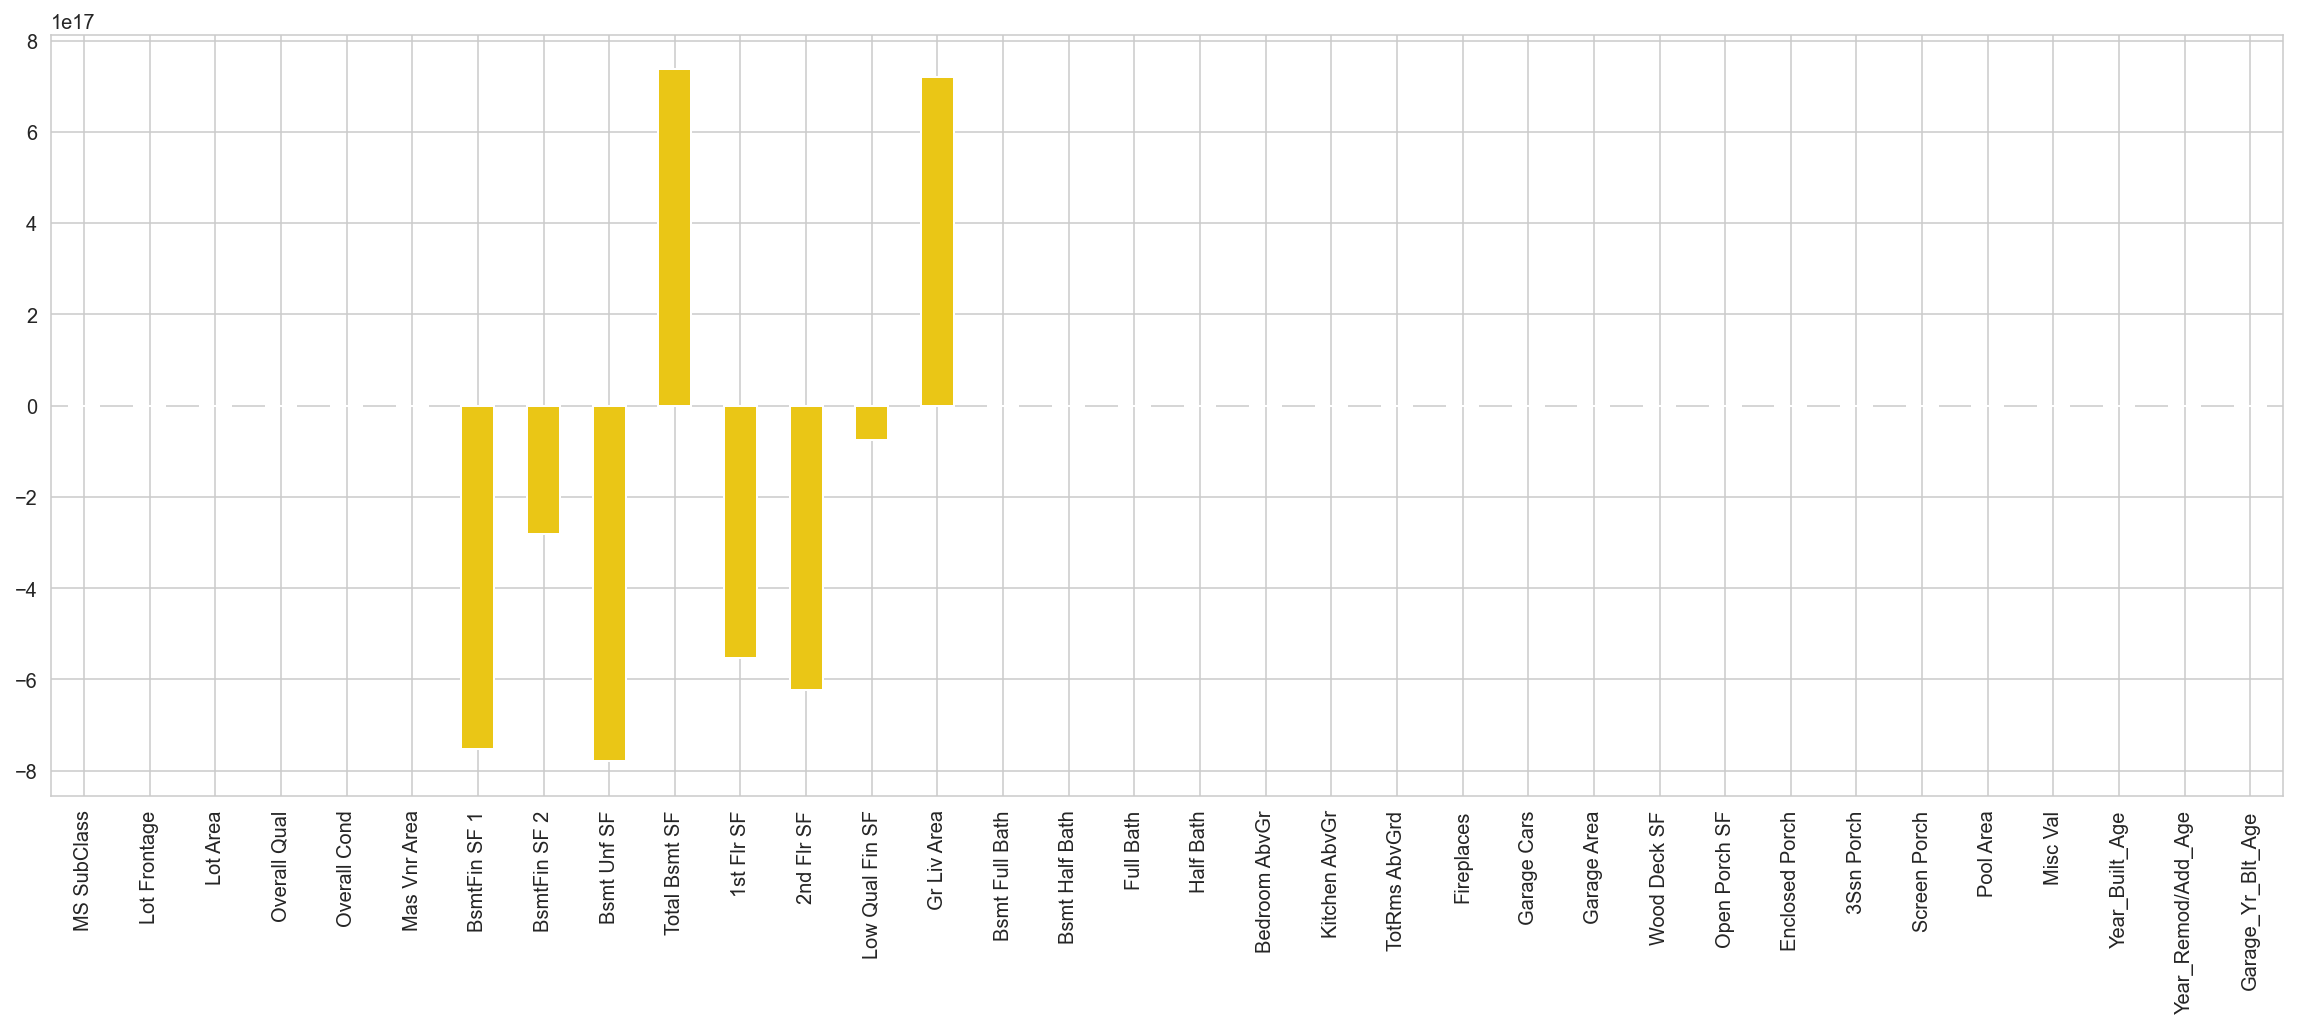

In [94]:
### Plotting Coefficient value of Linear model

pd.Series(lr.coef_,index=features).plot(kind='bar',figsize=(20,7),color='#EAC616')

<AxesSubplot:>

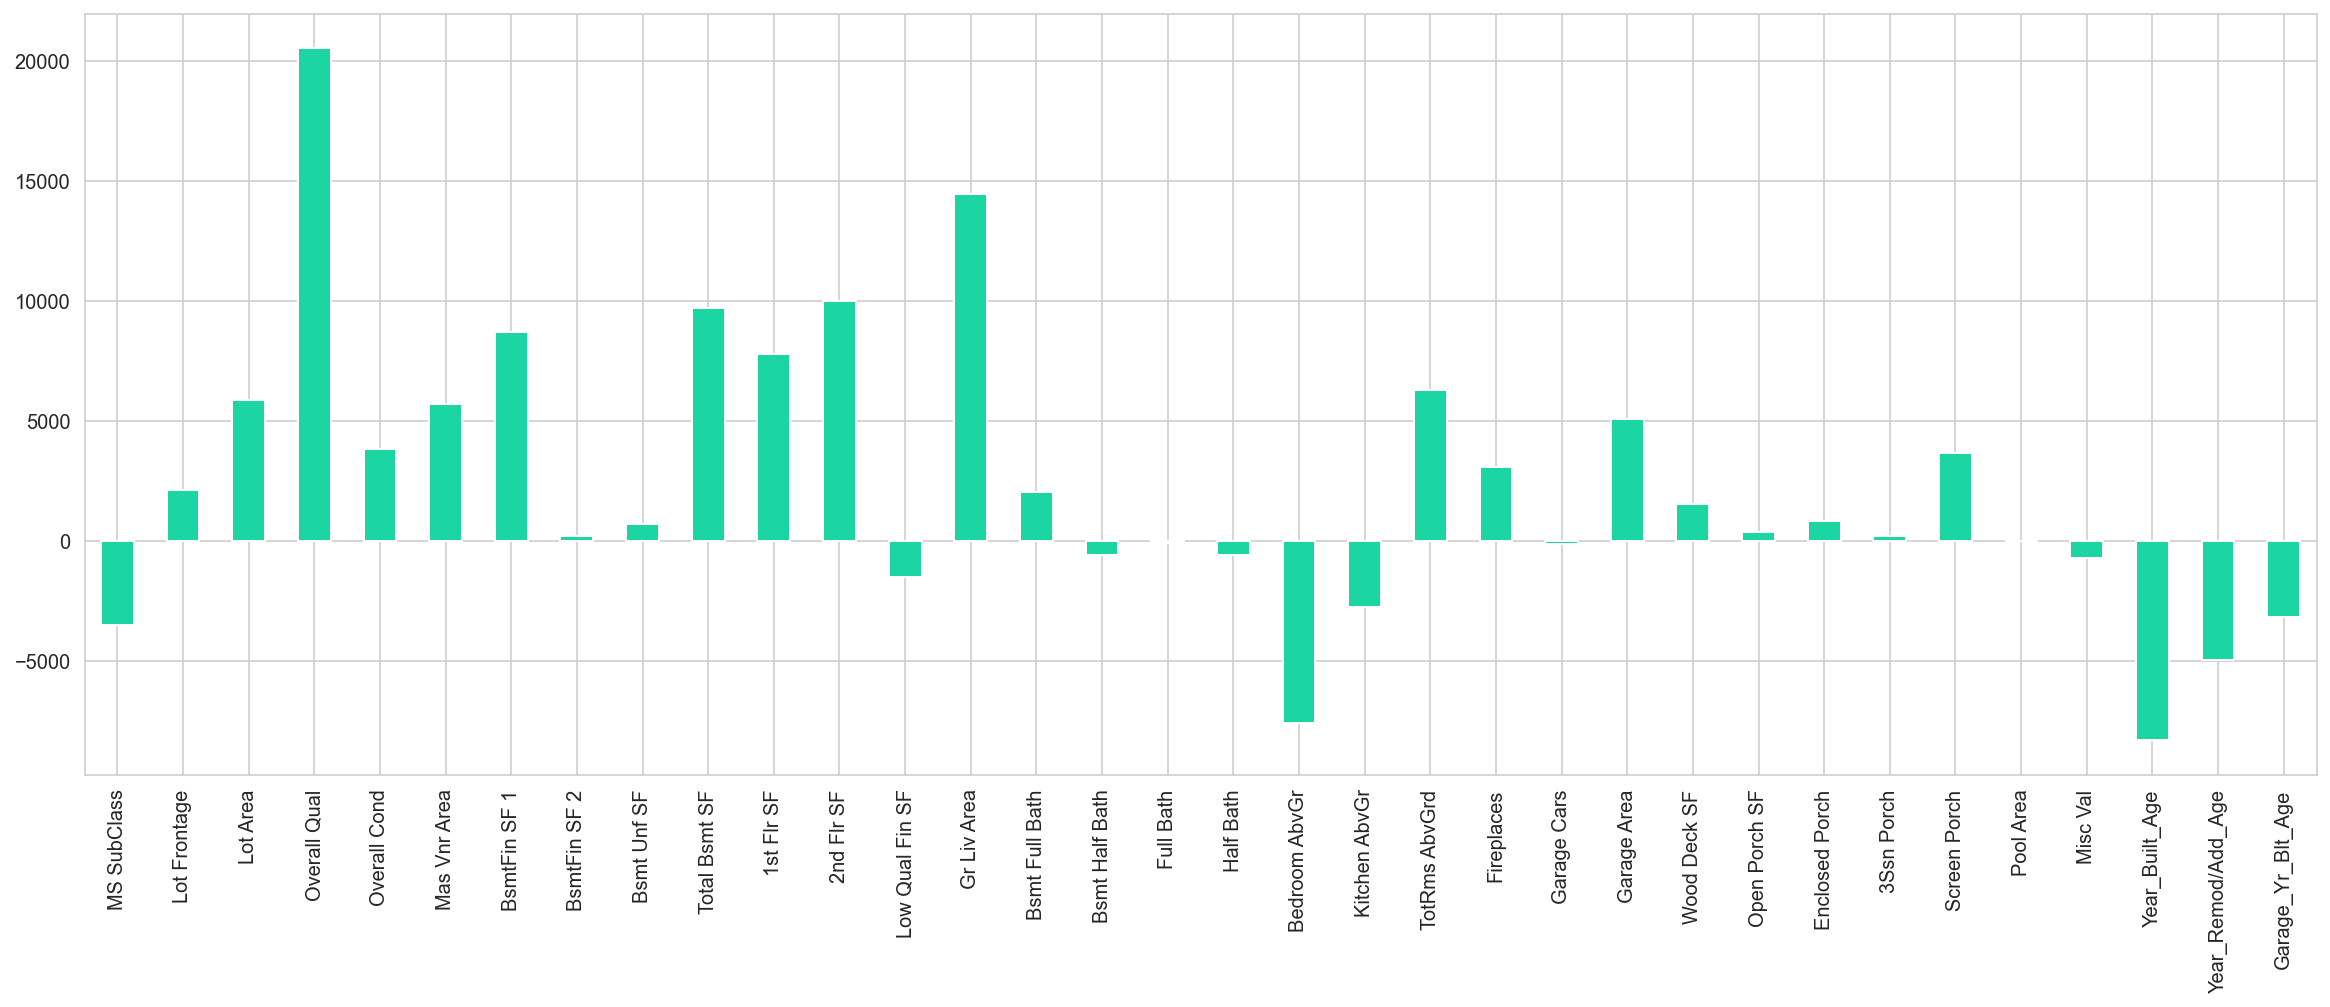

In [95]:
### Plotting Coefficient value of Ridge model

pd.Series(ridge_optimal_cv.coef_,index=features).plot(kind='bar',figsize=(20,7),color='#1BD5A2')

<AxesSubplot:>

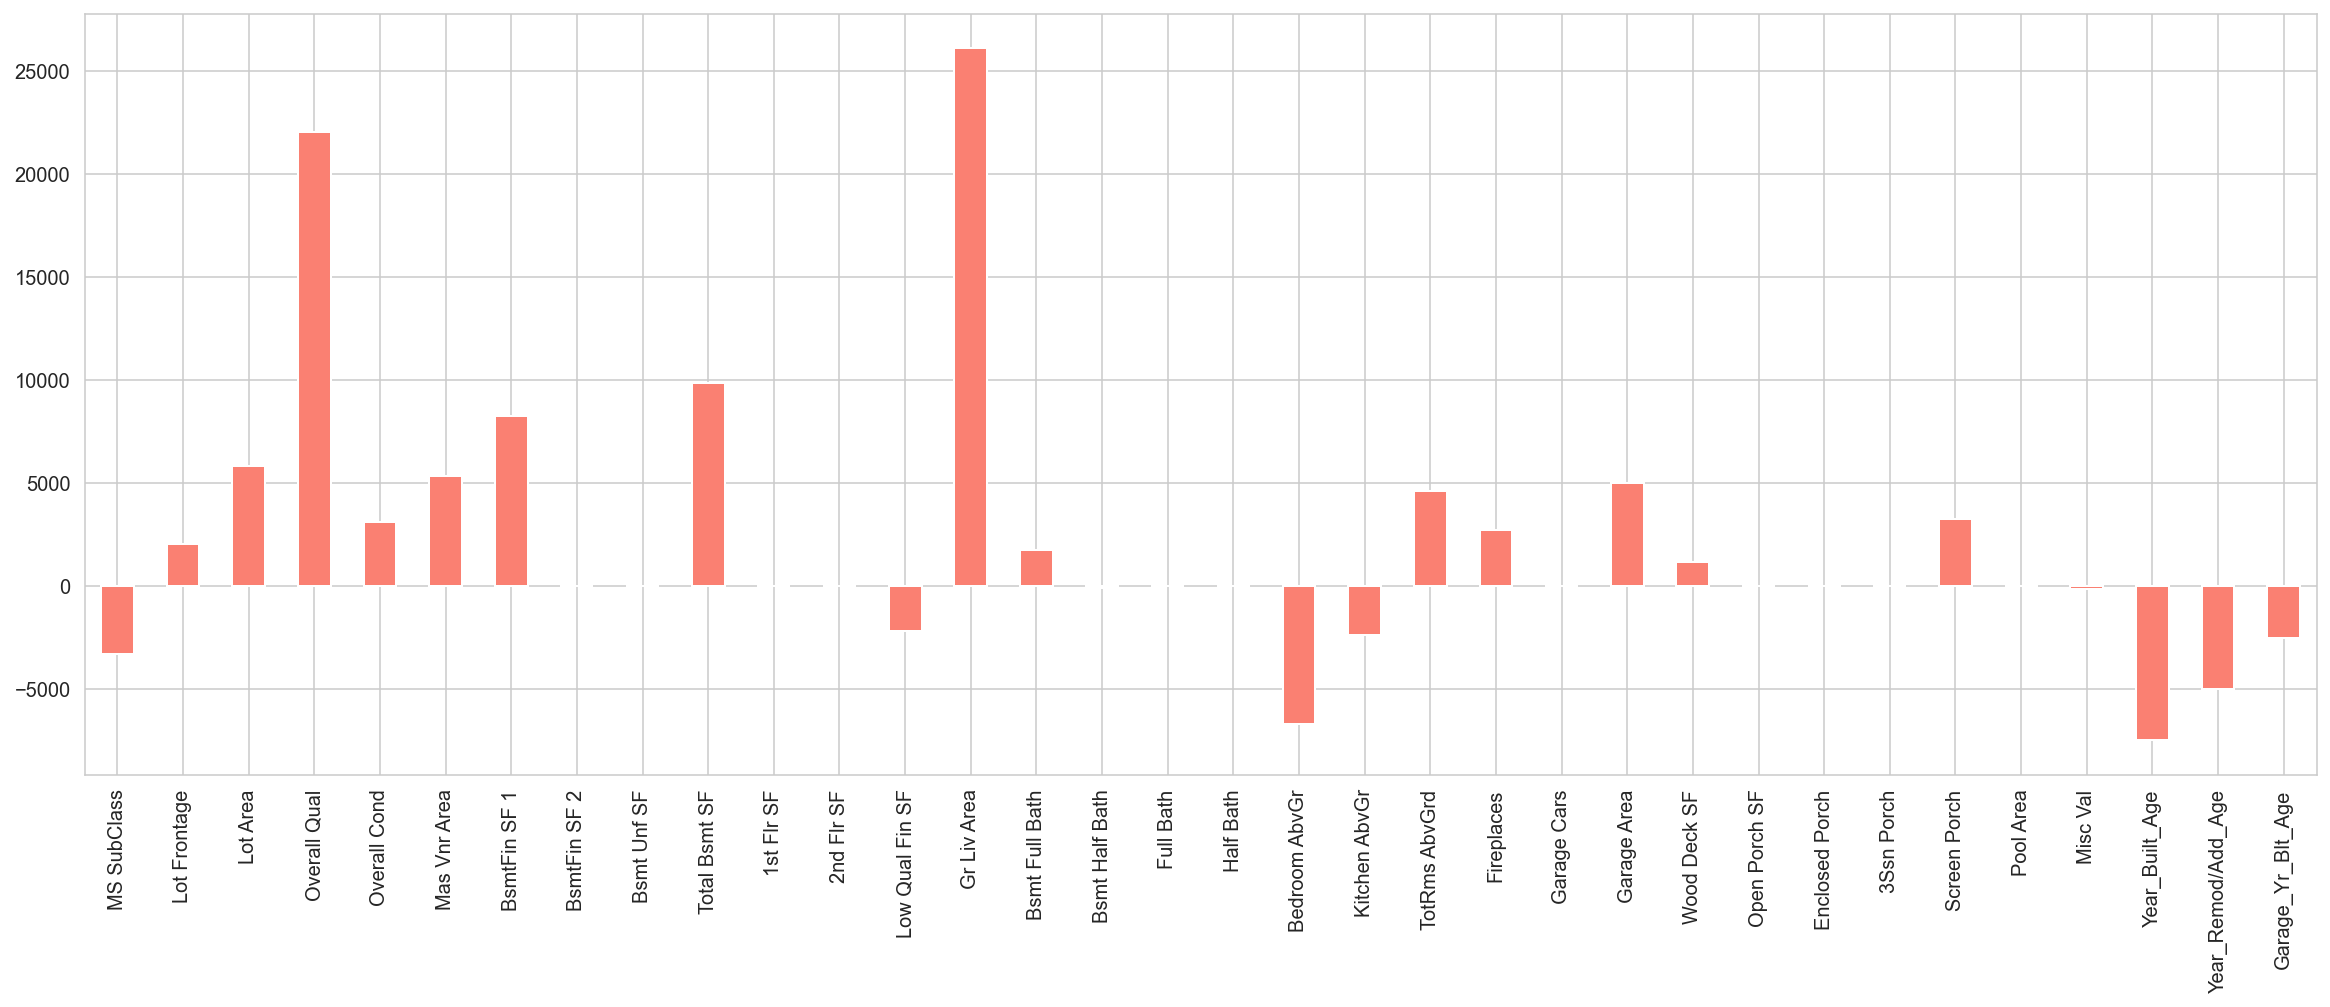

In [96]:
### Plotting Coefficient value of Lasso model

pd.Series(lasso_optimal_cv.coef_,index=features).plot(kind='bar',figsize=(20,7),color='salmon')

<AxesSubplot:>

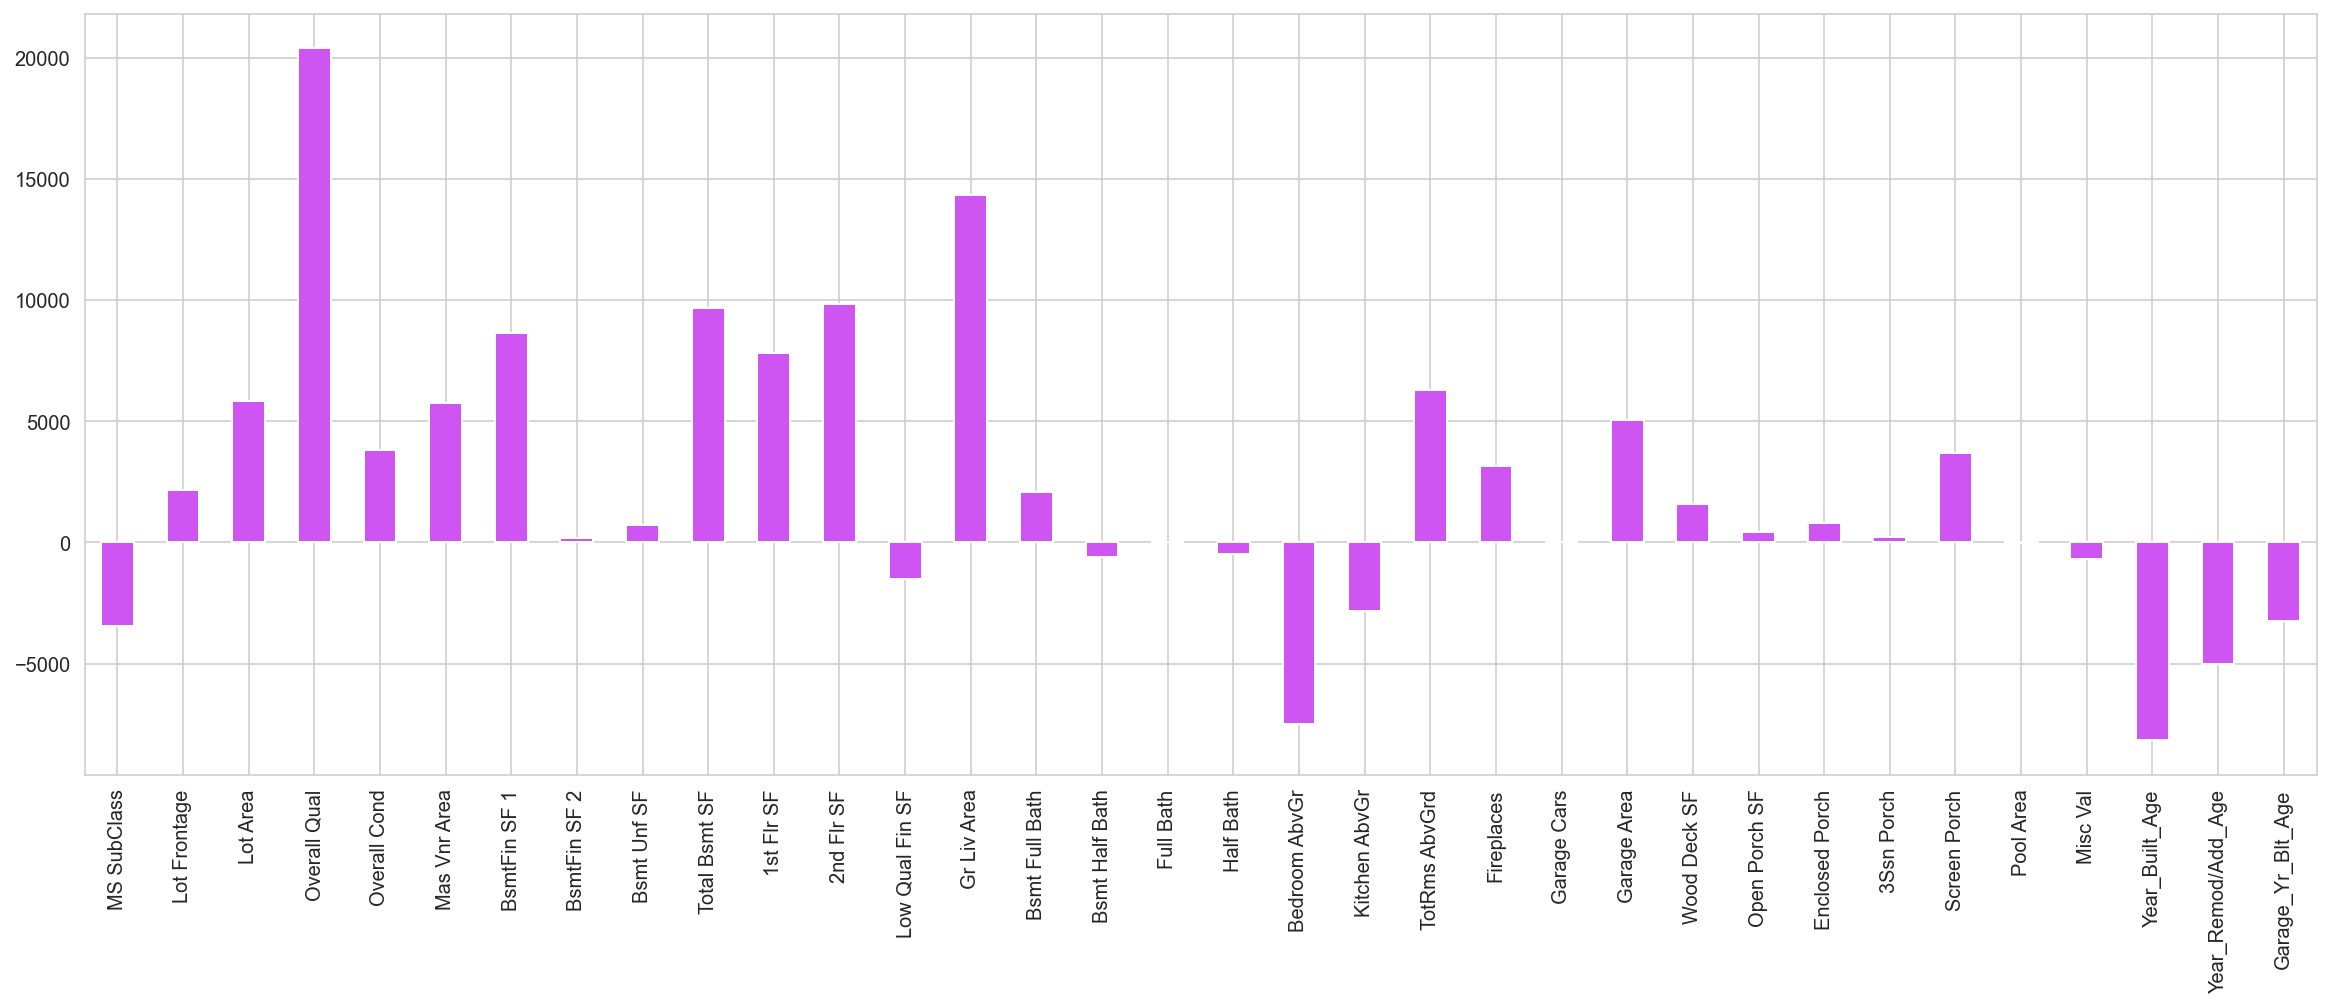

In [103]:
### Plotting Coefficient value of ElasticNet model

pd.Series(en_model.coef_,index=features).plot(kind='bar',figsize=(20,7),color='#CF55F2')

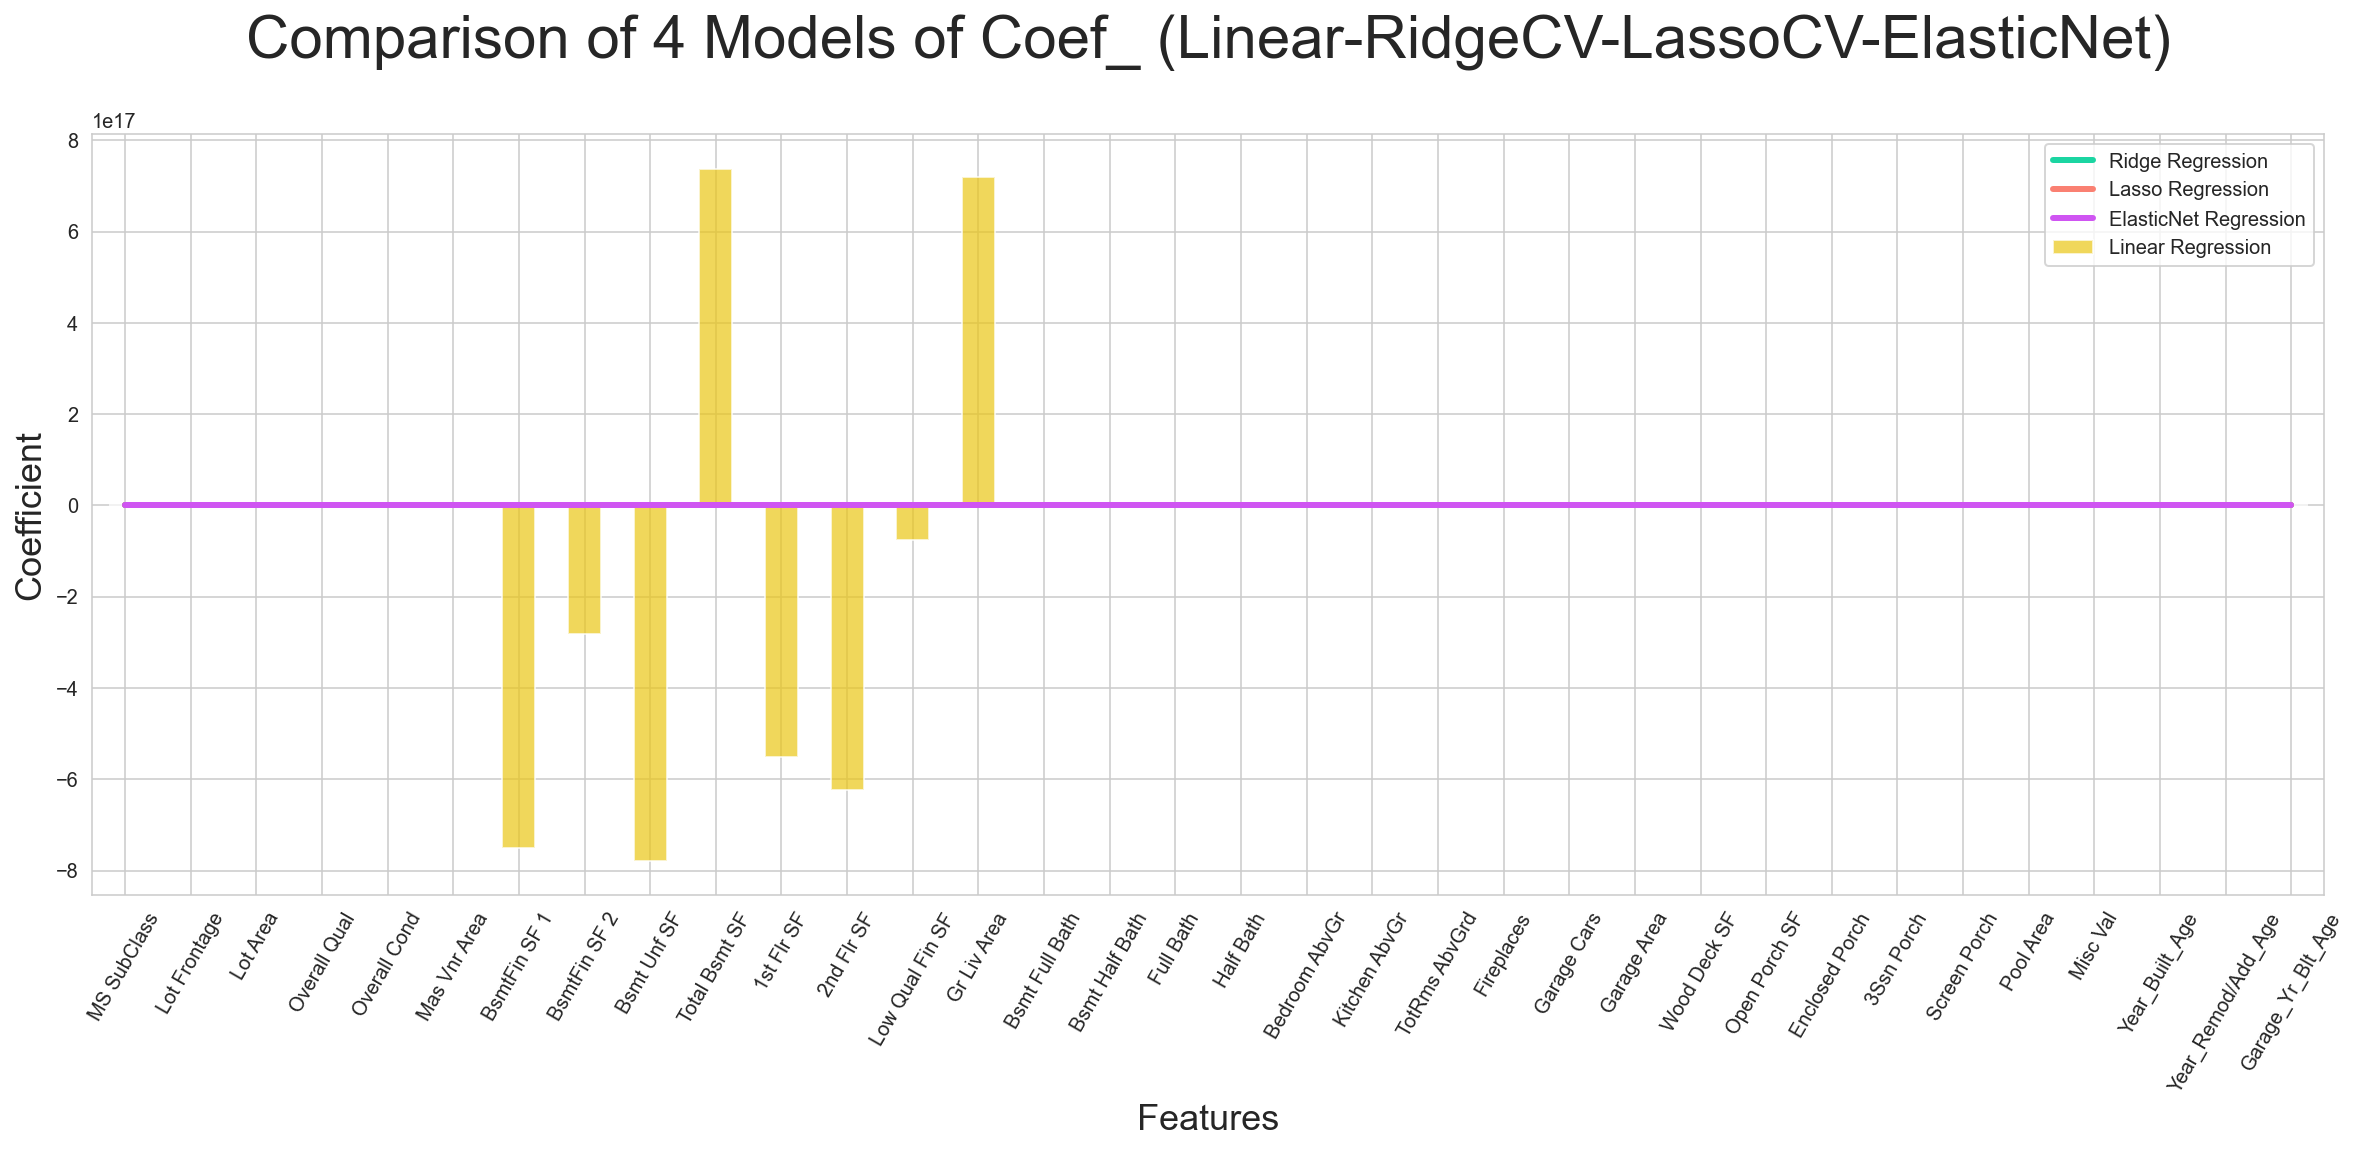

In [104]:
### Showing the comparison of Training and Testing RMSE & R2 for all model (Linear&Ridge&Lasso&ElasticNet)

pd.Series(lr.coef_,index=features).plot(kind='bar',figsize=(20,7),color='#EAC616',alpha=0.7,label='Linear Regression')
pd.Series(ridge_optimal_cv.coef_,index=features).plot(kind='line',figsize=(20,7),color='#1BD5A2',label='Ridge Regression',lw=3)
pd.Series(lasso_optimal_cv.coef_,index=features).plot(kind='line',figsize=(20,7),color='salmon',label='Lasso Regression',lw=3)
pd.Series(en_model.coef_,index=features).plot(kind='line',figsize=(20,7),color='#CF55F2',label='ElasticNet Regression',lw=3)
plt.xticks(rotation=60);
plt.xlabel('Features',fontsize=18)
plt.ylabel('Coefficient',fontsize=18)
plt.title('Comparison of 4 Models of Coef_ (Linear-RidgeCV-LassoCV-ElasticNet)\n',fontsize=30)
plt.legend();
plt.show()

## Test file (numerical)

In [106]:
### Test file for only Numerical features

df_test_int = df_test[['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val']]

In [107]:
df_test_int.shape

(879, 34)

In [108]:
### Filter only column "Year"

df_test_int[['Year Built','Year Remod/Add','Garage Yr Blt']]

Year Built  Year Remod/Add  Garage Yr Blt
0          1910            1950         1910.0
1          1977            1977         1977.0
2          2006            2006         2006.0
3          1923            2006         1935.0
4          1963            1963         1963.0
..          ...             ...            ...
874        1974            1974         1974.0
875        1966            1999         1966.0
876        1968            1968         1968.0
877        1971            1971         1974.0
878        1955            1955         1955.0

[879 rows x 3 columns]

In [109]:
### Find the age by calculation (2021 - column in "Year" = Age)

df_test_int['Year_Built_Age'] = df_test_int['Year Built'].map(lambda x:2021-x)
df_test_int['Year_Remod/Add_Age'] = df_test_int['Year Remod/Add'].map(lambda x:2021-x)
df_test_int['Garage_Yr_Blt_Age'] = df_test_int['Garage Yr Blt'].map(lambda x:2021-x)

<ipython-input-109-64e78986dde5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_int['Year_Built_Age'] = df_test_int['Year Built'].map(lambda x:2021-x)
<ipython-input-109-64e78986dde5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_int['Year_Remod/Add_Age'] = df_test_int['Year Remod/Add'].map(lambda x:2021-x)
<ipython-input-109-64e78986dde5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [110]:
### Drop the column = "Year"

df_test_int = df_test_int.drop(columns=['Year Built','Year Remod/Add','Garage Yr Blt'])

In [111]:
df_test_int.isnull().sum()

MS SubClass             0
Lot Frontage          160
Lot Area                0
Overall Qual            0
Overall Cond            0
Mas Vnr Area            1
BsmtFin SF 1            0
BsmtFin SF 2            0
Bsmt Unf SF             0
Total Bsmt SF           0
1st Flr SF              0
2nd Flr SF              0
Low Qual Fin SF         0
Gr Liv Area             0
Bsmt Full Bath          0
Bsmt Half Bath          0
Full Bath               0
Half Bath               0
Bedroom AbvGr           0
Kitchen AbvGr           0
TotRms AbvGrd           0
Fireplaces              0
Garage Cars             0
Garage Area             0
Wood Deck SF            0
Open Porch SF           0
Enclosed Porch          0
3Ssn Porch              0
Screen Porch            0
Pool Area               0
Misc Val                0
Year_Built_Age          0
Year_Remod/Add_Age      0
Garage_Yr_Blt_Age      45
dtype: int64

In [112]:
df_test_int.shape

(879, 34)

In [113]:
### What the column that has null value

check_null_int_test = df_test_int.isnull().sum().to_frame('null')
column_null_int_test = list(check_null_int_test[check_null_int_test['null'] != 0].T.columns)
column_null_int_test

['Lot Frontage', 'Mas Vnr Area', 'Garage_Yr_Blt_Age']

In [114]:
### Replace null value with avg

df_test_int = replace_null(df_test_int,column_null_int_test)

In [115]:
df_test_int.isnull().sum()

MS SubClass           0
Lot Frontage          0
Lot Area              0
Overall Qual          0
Overall Cond          0
Mas Vnr Area          0
BsmtFin SF 1          0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Bsmt Full Bath        0
Bsmt Half Bath        0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
TotRms AbvGrd         0
Fireplaces            0
Garage Cars           0
Garage Area           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Misc Val              0
Year_Built_Age        0
Year_Remod/Add_Age    0
Garage_Yr_Blt_Age     0
dtype: int64

In [116]:
print(df_train_int.shape)
print(df_test_int.shape)

(2043, 35)
(879, 34)


## Test file (categorial)

In [117]:
### Test file for only Categorical features
### Filter features same with Train file in Categorical data

df_test_obj = df_test[['MS Zoning', 'Street', 'Land Contour', 'Utilities',
                       'Condition 2', 'Roof Matl','Exter Qual',
                       'Bsmt Qual', 'Heating', 'Kitchen Qual','Paved Drive']]

df_test_obj.head()

MS Zoning Street Land Contour Utilities Condition 2 Roof Matl Exter Qual  \
0        RM   Pave          Lvl    AllPub        Norm   CompShg         TA   
1        RL   Pave          Lvl    AllPub        Norm   CompShg         TA   
2        RL   Pave          Lvl    AllPub        Norm   CompShg         Gd   
3        RM   Pave          Lvl    AllPub        Norm   CompShg         Gd   
4        RL   Pave          Lvl    AllPub        Norm   CompShg         TA   

  Bsmt Qual Heating Kitchen Qual Paved Drive  
0        Fa    GasA           Fa           Y  
1        Gd    GasA           TA           Y  
2        Gd    GasA           Gd           Y  
3        TA    GasA           TA           N  
4        Gd    GasA           TA           Y

In [118]:
### From checking the sum of null value, feature "Bsmt Qual" has sum of null value equal to 25 values

df_test_obj.isnull().sum()

MS Zoning        0
Street           0
Land Contour     0
Utilities        0
Condition 2      0
Roof Matl        0
Exter Qual       0
Bsmt Qual       25
Heating          0
Kitchen Qual     0
Paved Drive      0
dtype: int64

In [119]:
### Find the name of category that has the maximum value
### Then replacing null value

mode_Bsmt_Qual_obj = df_test_obj['Bsmt Qual'].value_counts().to_frame('count').index[0]
mode_Bsmt_Qual_obj

'TA'

In [120]:
### Replace null value with mode_Bsmt_Qual_obj

df_test_obj['Bsmt Qual'] = df_test_obj[['Bsmt Qual']].fillna(mode_Bsmt_Qual_obj)

<ipython-input-120-49c77664a9e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_obj['Bsmt Qual'] = df_test_obj[['Bsmt Qual']].fillna(mode_Bsmt_Qual_obj)


In [121]:
df_test_obj.isnull().sum()

MS Zoning       0
Street          0
Land Contour    0
Utilities       0
Condition 2     0
Roof Matl       0
Exter Qual      0
Bsmt Qual       0
Heating         0
Kitchen Qual    0
Paved Drive     0
dtype: int64

In [122]:
### Get dummies for OneHotEncoding categorical feature

df_test_obj_dum = pd.get_dummies(df_test_obj,columns = ['MS Zoning', 'Street', 'Land Contour',
                                                          'Utilities','Condition 2', 'Roof Matl',
                                                          'Exter Qual','Bsmt Qual', 'Heating',
                                                          'Kitchen Qual','Paved Drive'])

df_test_obj_dum.head()

MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  \
0                  0             0                  0             0   
1                  0             0                  0             0   
2                  0             0                  0             0   
3                  0             0                  0             0   
4                  0             0                  0             0   

   MS Zoning_RL  MS Zoning_RM  Street_Grvl  Street_Pave  Land Contour_Bnk  \
0             0             1            0            1                 0   
1             1             0            0            1                 0   
2             1             0            0            1                 0   
3             0             1            0            1                 0   
4             1             0            0            1                 0   

   Land Contour_HLS  ...  Heating_GasW  Heating_Grav  Kitchen Qual_Ex  \
0                 0  ...             0             0                0   
1                 0  ...             0             0                0   
2                 0  ...             0             0                0   
3                 0  ...             0             0                0   
4                 0  ...             0             0                0   

   Kitchen Qual_Fa  Kitchen Qual_Gd  Kitchen Qual_Po  Kitchen Qual_TA  \
0                1                0                0                0   
1                0                0                0                1   
2                0                1                0                0   
3                0                0                0                1   
4                0                0                0                1   

   Paved Drive_N  Paved Drive_P  Paved Drive_Y  
0              0              0              1  
1              0              0              1  
2              0              0              1  
3              1              0              0  
4              0              0              1  

[5 rows x 45 columns]

In [123]:
### After OneHotEncoding, it has 51 categorical features 

print(df_train_obj_dum.shape)
print(df_test_obj_dum.shape)

(2051, 52)
(879, 45)


In [124]:
### Check the column that is in train set but is not in test set after finding the dummies

check_dup_train = set(df_train_obj_dum.drop(columns=['SalePrice']).columns) - set(df_test_obj_dum.columns)
list(check_dup_train)

['Roof Matl_Membran',
 'Condition 2_RRAe',
 'Utilities_NoSeWa',
 'Condition 2_Artery',
 'Condition 2_RRNn',
 'Roof Matl_ClyTile',
 'Condition 2_RRAn',
 'Heating_OthW',
 'Heating_Wall',
 'MS Zoning_A (agr)']

In [125]:
### Check the column that is in train set but is not in test set after finding the dummies

check_dup_test = set(df_test_obj_dum.columns) - set(df_train_obj_dum.drop(columns=['SalePrice']).columns)
list(check_dup_test)

['Roof Matl_Metal', 'Heating_Floor', 'Roof Matl_Roll', 'Kitchen Qual_Po']

In [126]:
# Drop the column that has only train or test data

df_train_obj_dum_new = df_train_obj_dum.drop(columns=['Condition 2_RRAe','Roof Matl_Membran','Condition 2_Artery','Heating_OthW','MS Zoning_A (agr)','Condition 2_RRNn','Heating_Wall','Condition 2_RRAn','Roof Matl_ClyTile','Utilities_NoSeWa'])
df_test_obj_dum_new = df_test_obj_dum.drop(columns=['Heating_Floor', 'Roof Matl_Metal', 'Roof Matl_Roll', 'Kitchen Qual_Po'])

In [127]:
print(df_train_obj_dum_new.shape)
print(df_test_obj_dum_new.shape)

(2051, 42)
(879, 41)


## Prediction

In [128]:
### Write the function for calculating R2 & RMSE all model (Linear&Ridge&Lasso&ElasticNet) ###

def predict(train,test):
    X_train = train.drop(columns = ['SalePrice'])
    X_test = test
    y_train = train['SalePrice']
#     X = data.drop(columns = ['SalePrice'])
#     y = data['SalePrice']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)
    
    ss = StandardScaler()
    ss_train = ss.fit_transform(X_train)
    ss_test = ss.transform(X_test)
    
    ### Linear Regression ###
    lr = LinearRegression()
    lr.fit(ss_train,y_train)
    r2_lr = lr.score(ss_train,y_train)
    r2_lr_cv = cross_val_score(lr, ss_train, y_train, cv=5).mean()
    #r2_lr_test = lr.score(ss_test,y_test)
    rmse_lr = np.sqrt(mean_squared_error(y_train, lr.predict(ss_train)))
    rmse_lr_CV = np.abs(cross_val_score(lr, ss_train, y_train, cv=5, scoring='neg_root_mean_squared_error')).mean()
    #rmse_lr_CV_test = np.sqrt(mean_squared_error(y_test, lr.predict(ss_test)))
        
    ### RidgeCV Regression ###
    r_alphas = np.arange(1, 1000, 1)
    ridge_model_cv = RidgeCV(r_alphas,store_cv_values=True)
    ridge_model_cv.fit(ss_train,y_train)
    ridge_optimal_alpha = ridge_model_cv.alpha_
    ridge_optimal_cv = Ridge(alpha=ridge_optimal_alpha)
    ridge_optimal_cv.fit(ss_train,y_train)
    r2_ridge_2 = ridge_optimal_cv.score(ss_train,y_train)
    r2_ridge_cv_2 = cross_val_score(ridge_optimal_cv, ss_train, y_train, cv=5).mean()
    #r2_ridge_test_2 = ridge_optimal_cv.score(ss_test,y_test)
    rmse_ridge_2 = np.sqrt(mean_squared_error(y_train, ridge_optimal_cv.predict(ss_train)))
    rmse_ridge_CV_2 = np.abs(cross_val_score(ridge_optimal_cv, ss_train, y_train, cv=5, scoring='neg_root_mean_squared_error')).mean()
    #rmse_ridge_CV_test_2 = np.sqrt(mean_squared_error(y_test, ridge_optimal_cv.predict(ss_test)))
        
    ### LassoCV Regression ###
    l_alphas = np.arange(300, 3000, 1)
    lasso_model_cv = LassoCV(alphas = l_alphas, cv=5)
    lasso_model_cv.fit(ss_train,y_train);
    lasso_optimal_alpha = lasso_model_cv.alpha_
    lasso_optimal_cv = Lasso(alpha=lasso_optimal_alpha)
    lasso_optimal_cv.fit(ss_train,y_train)
    r2_lasso = lasso_optimal_cv.score(ss_train,y_train)
    r2_lasso_cv = cross_val_score(lasso_optimal_cv, ss_train, y_train, cv=5).mean()
    #r2_lasso_test = lasso_optimal_cv.score(ss_test,y_test)
    rmse_lasso = np.sqrt(mean_squared_error(y_train, lasso_optimal_cv.predict(ss_train)))
    rmse_lasso_CV = np.abs(cross_val_score(lasso_optimal_cv, ss_train, y_train, cv=5, scoring='neg_root_mean_squared_error')).mean()
    #rmse_lasso_CV_test = np.sqrt(mean_squared_error(y_test, lasso_optimal_cv.predict(ss_test)))
        
    ### ElasticNet Regression ###
    en_alphas = np.arange(0.001,1,0.005)
    en_model_cv = ElasticNetCV(alphas=en_alphas,l1_ratio=0.5,cv=5)
    en_model_cv.fit(ss_train,y_train)
    en_alpha = en_model_cv.alpha_
    en_model = ElasticNet(alpha=en_alpha,l1_ratio=0.5)
    en_model.fit(ss_train,y_train)
    r2_elast = en_model.score(ss_train,y_train)
    r2_elast_cv = cross_val_score(en_model, ss_train, y_train, cv=5).mean()
    #r2_elast_test = en_model.score(ss_test,y_test)
    rmse_elast = np.sqrt(mean_squared_error(y_train, en_model.predict(ss_train)))
    rmse_elast_CV = np.abs(cross_val_score(en_model, ss_train, y_train, cv=5, scoring='neg_root_mean_squared_error')).mean()
    #rmse_elast_CV_test = np.sqrt(mean_squared_error(y_test, en_model.predict(ss_test)))
    
    ### Plot Graph ###
    features = [col for col in train._get_numeric_data().columns if col != 'SalePrice']
    pd.Series(lr.coef_,index=features).plot(kind='bar',figsize=(20,7),color='#EAC616',alpha=0.7,label='Linear Regression')
    pd.Series(ridge_optimal_cv.coef_,index=features).plot(kind='line',figsize=(20,7),color='#1BD5A2',label='Ridge Regression',lw=3)
    pd.Series(lasso_optimal_cv.coef_,index=features).plot(kind='line',figsize=(20,7),color='salmon',label='Lasso Regression',lw=3)
    pd.Series(en_model.coef_,index=features).plot(kind='line',figsize=(20,7),color='#CF55F2',label='ElasticNet Regression',lw=3)
    plt.xticks(rotation=60);
    plt.xlabel('Features',fontsize=18)
    plt.ylabel('Coefficient',fontsize=18)
    plt.title('Comparison of 4 Models of Coef_ (Linear-RidgeCV-LassoCV-ElasticNet)\n',fontsize=30)
    plt.legend();
    
    a = '-'
    print(f'\t\t\t>>>> Linear Regression <<<<\n\nTraining RMSE = {rmse_lr}\nTraining RMSE CV = {rmse_lr_CV}\nTesting RMSE = {a}\n-------------------------------\nTraining R2 = {r2_lr}\nTraining R2 CV = {r2_lr_cv}\nTesting R2 = {a}')
    print('=====================================================================')
    print(f'\t\t\t>>>> RidgeCV Regression <<<<\n\nAlpha = {ridge_optimal_alpha}\nTraining RMSE = {rmse_ridge_2}\nTraining RMSE CV = {rmse_ridge_CV_2}\nTesting RMSE = {a}\n-------------------------------\nTraining R2 = {r2_ridge_2}\nTraining R2 CV = {r2_ridge_cv_2}\nTesting R2 = {a}')
    print('=====================================================================')
    print(f'\t\t\t>>>> LassoCV Regression <<<<\n\nAlpha = {lasso_optimal_alpha}\nTraining RMSE = {rmse_lasso}\nTraining RMSE CV = {rmse_lasso_CV}\nTesting RMSE = {a}\n-------------------------------\nTraining R2 = {r2_lasso}\nTraining R2 CV = {r2_lasso_cv}\nTesting R2 = {a}')
    print('=====================================================================')
    print(f'\t\t\t>>>> ElasticNet Regression <<<<\n\nAlpha = {en_alpha}\nTraining RMSE = {rmse_elast}\nTraining RMSE CV = {rmse_elast_CV}\nTesting RMSE = {a}\n-------------------------------\nTraining R2 = {r2_elast}\nTraining R2 CV = {r2_elast_cv}\nTesting R2 = {a}')
    print('=====================================================================')
    print('=====================================================================')
    return plt.show()
    
    

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101469311266.27539, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1594803994146.1667, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330314289911.82446, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

			>>>> Linear Regression <<<<

Training RSME = 43994.22988506626
Training RSME CV = 1.3713808141657339e+17
Testing RSME = -
-------------------------------
Training R2 = 0.691745237674775
Training R2 CV = -1.4226515248309484e+25
Testing R2 = -
			>>>> RidgeCV Regression <<<<

Alpha = 228
Training RSME = 43952.98433375846
Training RSME CV = 44553.70998162658
Testing RSME = -
-------------------------------
Training R2 = 0.6923229578784345
Training R2 CV = 0.6816235454855561
Testing R2 = -
			>>>> LassoCV Regression <<<<

Alpha = 300
Training RSME = 43919.61877739511
Training RSME CV = 44499.33449437762
Testing RSME = -
-------------------------------
Training R2 = 0.6927899077048014
Training R2 CV = 0.6822659322723273
Testing R2 = -
			>>>> ElasticNet Regression <<<<

Alpha = 0.136
Training RSME = 43892.36680425668
Training RSME CV = 44526.346200591695
Testing RSME = -
-------------------------------
Training R2 = 0.6931710350457123
Training R2 CV = 0.6819493494451538
Testing R2 = -


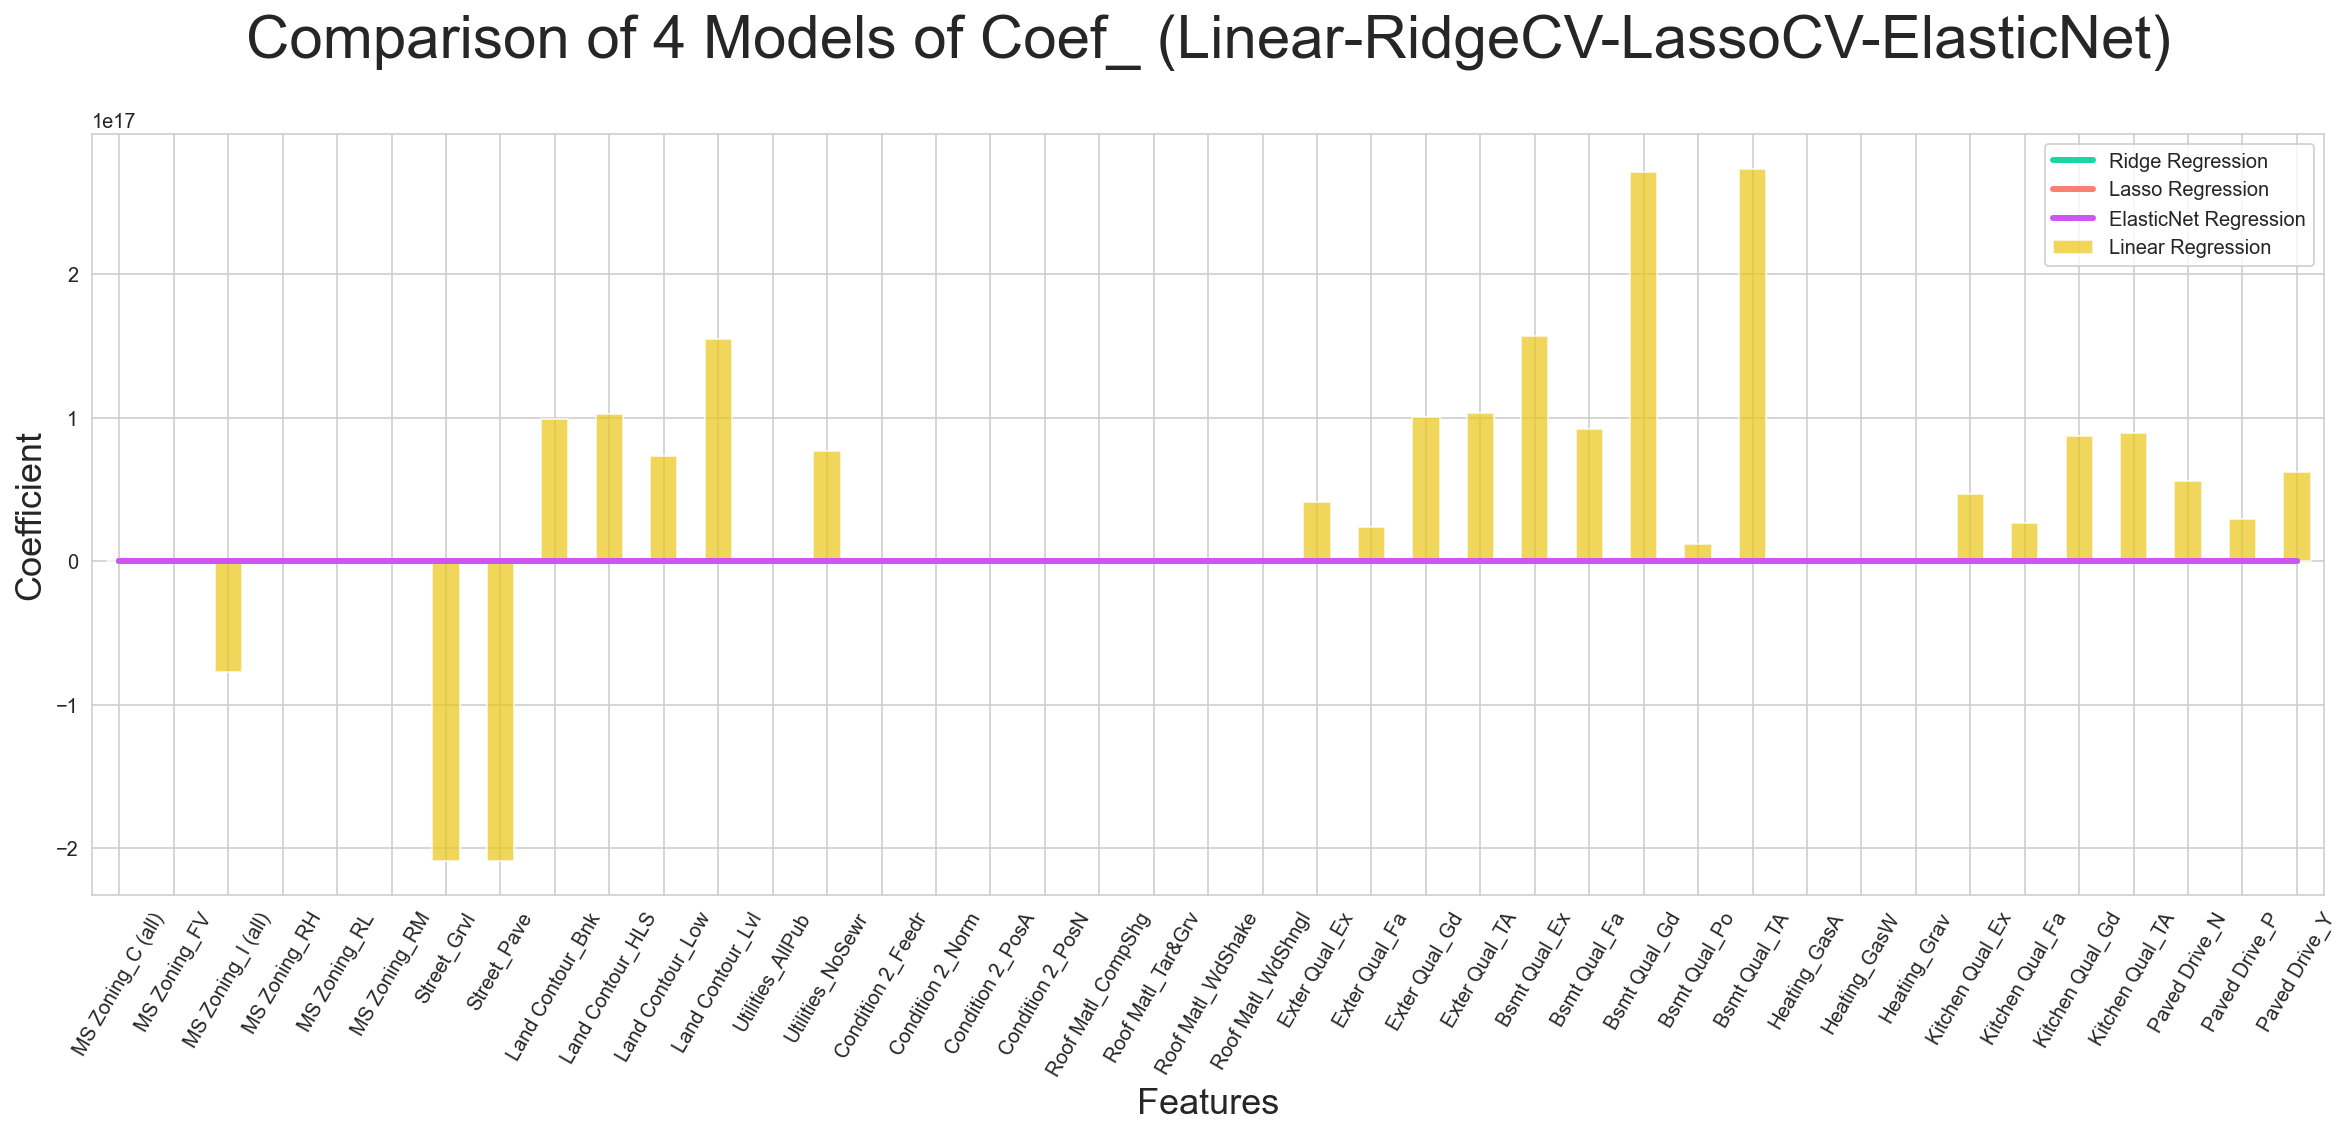

In [134]:
### For Example of all categorial data

predict(df_train_obj_dum_new,df_test_obj_dum_new)

## Feature Selection

### 1st Testing >> Features selected by reading data dictionary

In [135]:
df_train_int.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice', 'Year_Built_Age',
       'Year_Remod/Add_Age', 'Garage_Yr_Blt_Age'],
      dtype='object')

#### Separate to train and test data

In [136]:
### Data from train file

data_train_1 = df_train_int[['Lot Frontage', 'Lot Area','Overall Qual',
       'Overall Cond', 'Year_Built_Age','Mas Vnr Area','BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF','Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath','Full Bath','Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','Garage Cars', 'Garage Area',
       'Wood Deck SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area','SalePrice']]

In [149]:
### Data from test file

data_test_1 = df_test_int[['Lot Frontage', 'Lot Area','Overall Qual',
       'Overall Cond', 'Year_Built_Age','Mas Vnr Area','BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF','Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath','Full Bath','Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','Garage Cars', 'Garage Area',
       'Wood Deck SF','Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area']]

In [151]:
print(data_train_1.shape)
print(data_test_1.shape)

(2043, 28)
(879, 27)


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559337431205.444, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 601943908957.909, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 597373127597.0535, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conve

			>>>> Linear Regression <<<<

Training RSME = 28278.55222819309
Training RSME CV = 28868.797670820182
Testing RSME = -
-------------------------------
Training R2 = 0.8727556295727128
Training R2 CV = 0.8667491672521328
Testing R2 = -
			>>>> RidgeCV Regression <<<<

Alpha = 32
Training RSME = 28286.761468074194
Training RSME CV = 28842.77397580333
Testing RSME = -
-------------------------------
Training R2 = 0.8726817409823628
Training R2 CV = 0.8669907532890221
Testing R2 = -
			>>>> LassoCV Regression <<<<

Alpha = 383
Training RSME = 28332.836505694795
Training RSME CV = 28780.085465779535
Testing RSME = -
-------------------------------
Training R2 = 0.872266637176965
Training R2 CV = 0.8675496743449427
Testing R2 = -
			>>>> ElasticNet Regression <<<<

Alpha = 0.046
Training RSME = 28295.465459491206
Training RSME CV = 28841.634127309964
Testing RSME = -
-------------------------------
Training R2 = 0.8726033758764075
Training R2 CV = 0.8670013519901895
Testing R2 = -


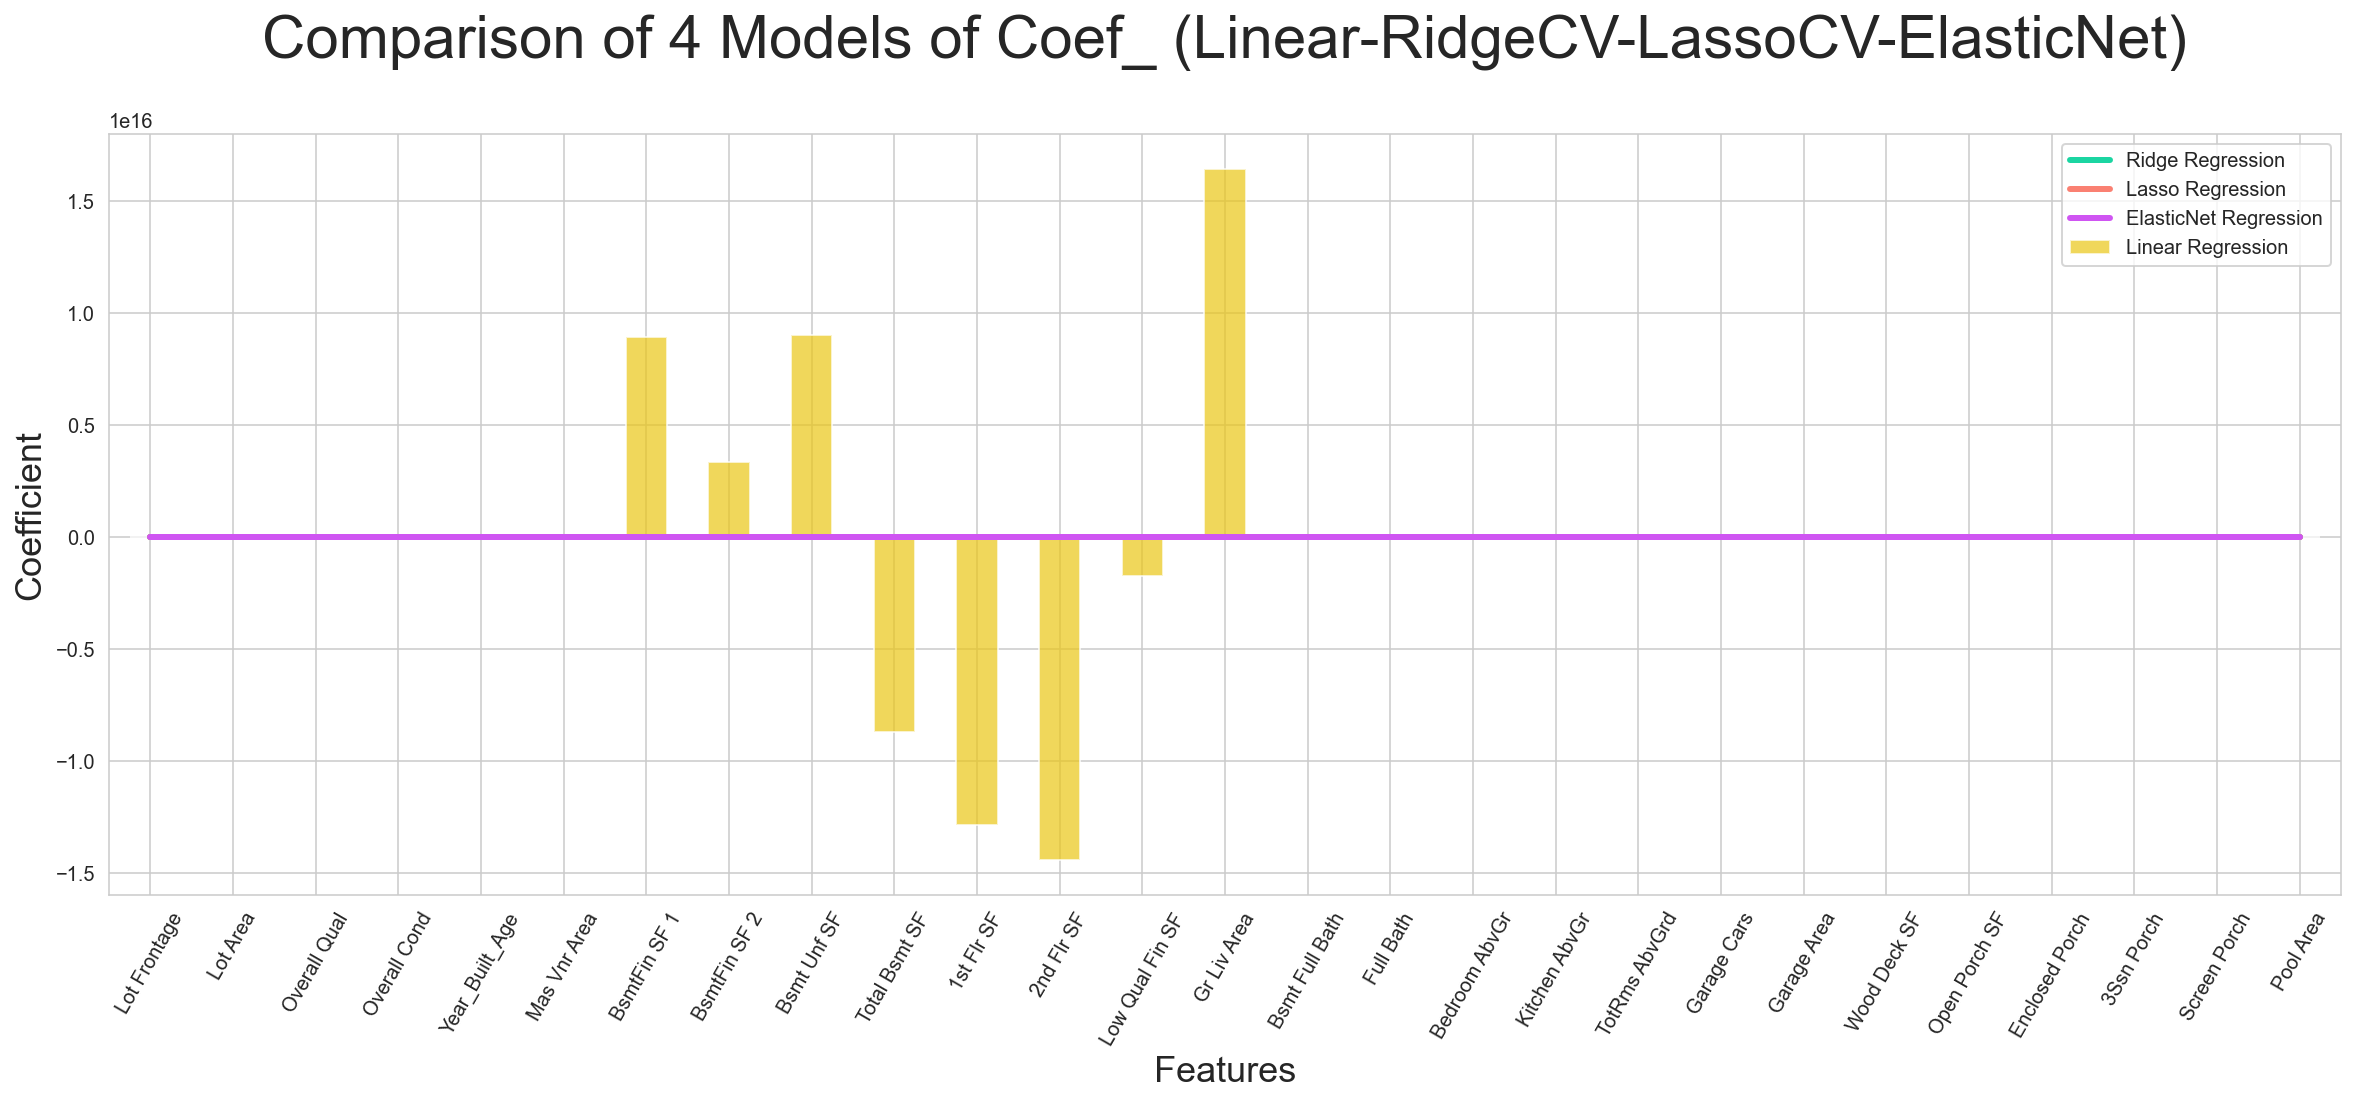

In [152]:
### Use the function to calculate RMSE and R2 of train set
# For test set, let's trial in Kaggle

predict(data_train_1,data_test_1)

### 2nd Testing >> Features selected by Sequential Forward Selection (SFS) for Numerical Data

In [140]:
!pip install mlxtend

('MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Screen Porch', 'Misc Val', 'Year_Built_Age', 'Year_Remod/Add_Age', 'Garage_Yr_Blt_Age')


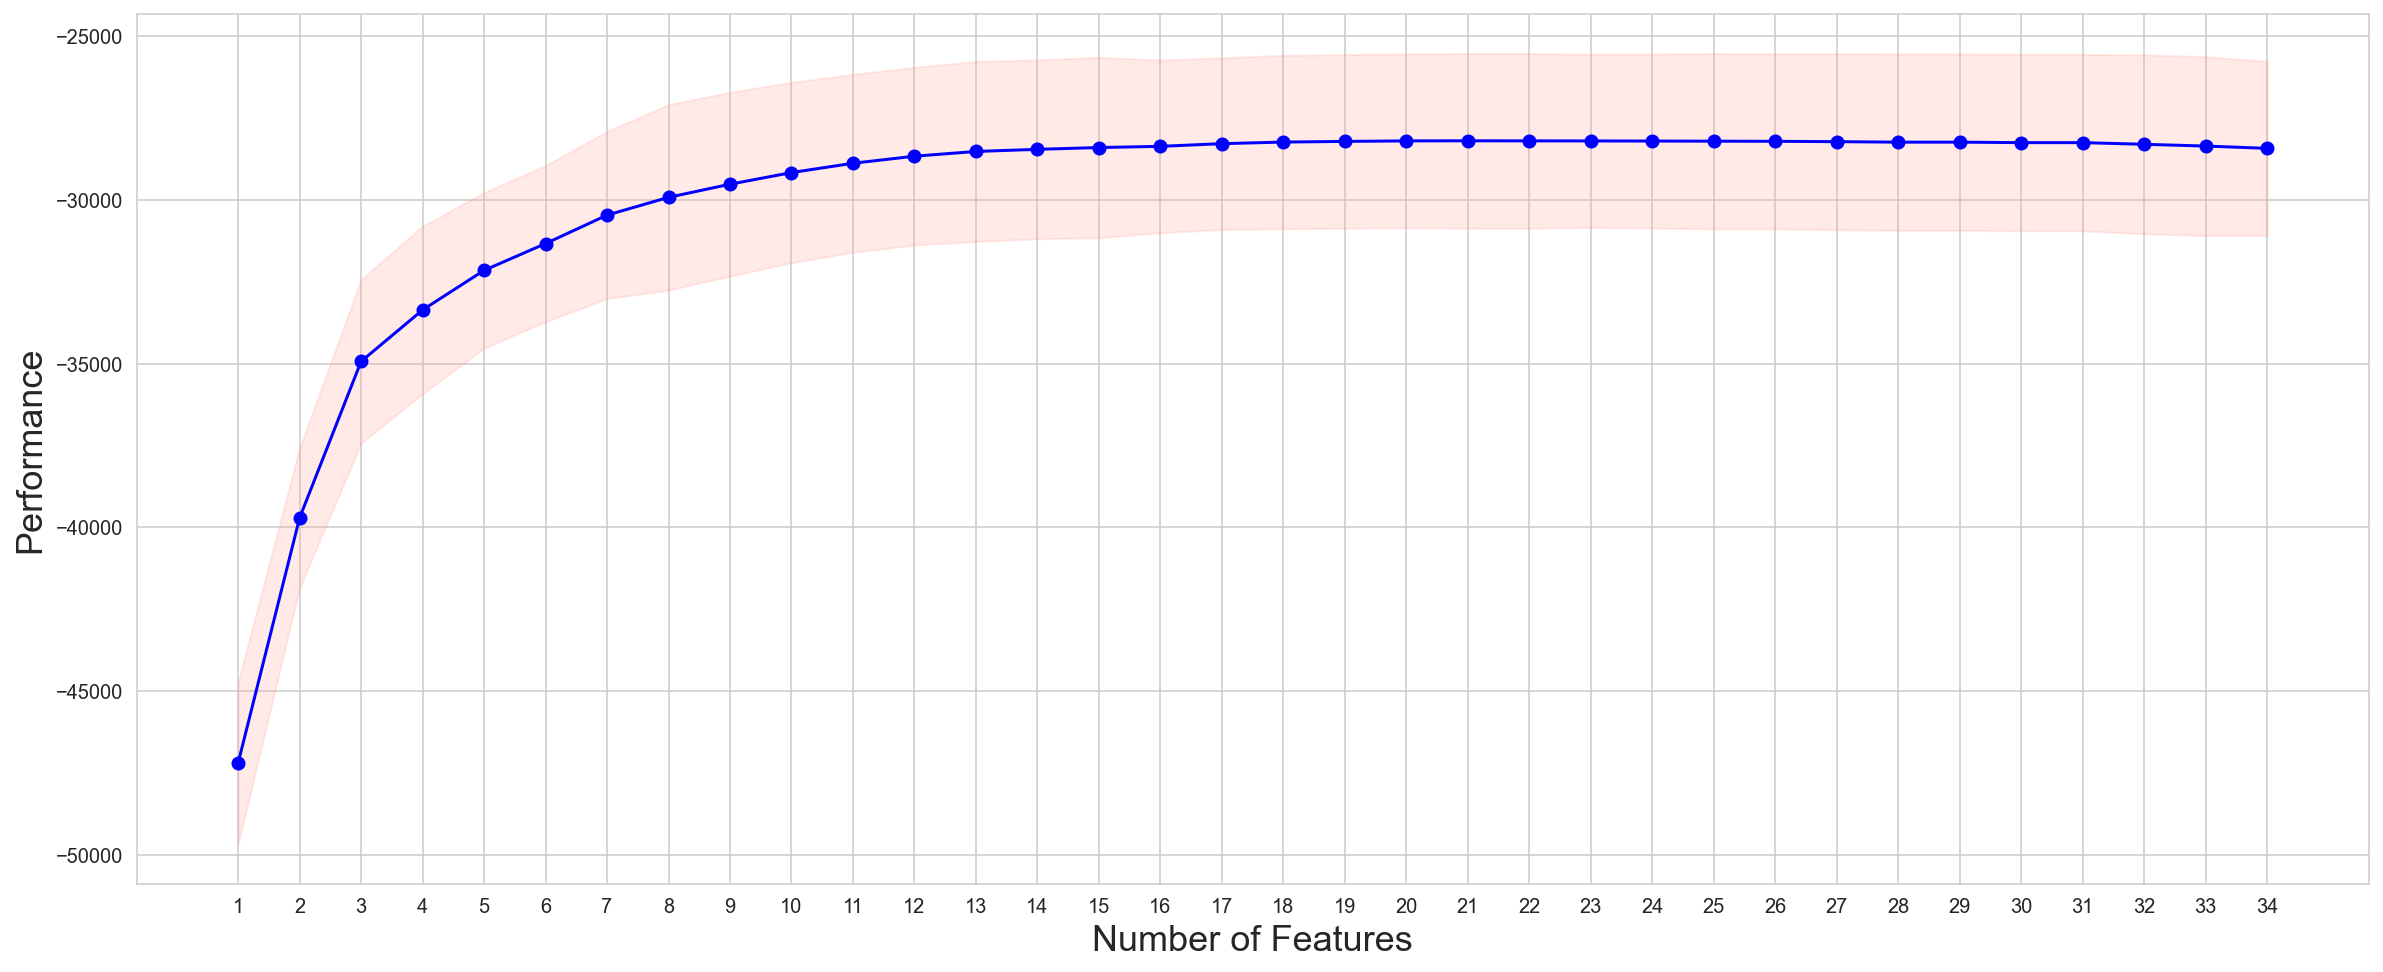

In [141]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import itertools

#import and prepare data >>>>>>>> (Train Data) <<<<<<<<<<

X = df_train_int.drop(columns = ['SalePrice'])
y = df_train_int['SalePrice']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)
# ss = StandardScaler()
# ss_train = ss.fit_transform(X_train)
# ss_test = ss.transform(X_test)

#Define Sequential Forward Selection (sfs)
sfs = SFS(Lasso(), 
          k_features=34, 
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          cv=5)

sfs = sfs.fit(X, y)
plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize=(20,8),bcolor='#FF9A8C')
plt.xlabel('Number of Features',fontsize=18)
plt.ylabel('Performance',fontsize=18)

print(sfs.get_metric_dict()[25]['feature_names']) ### Get the name of 25 features that SFS recommend

In [153]:
### Use the features that the SFS recommends for highest performance (y-axis)

data_train_2 = df_train_int[['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
                             'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
                             'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
                             'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
                             'Fireplaces', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
                             'Screen Porch', 'Misc Val', 'Year_Built_Age', 'Year_Remod/Add_Age',
                             'Garage_Yr_Blt_Age','SalePrice']]

data_test_2 = df_test_int[['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
                           'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Low Qual Fin SF',
                           'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath',
                           'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
                           'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Screen Porch',
                           'Misc Val', 'Year_Built_Age', 'Year_Remod/Add_Age', 'Garage_Yr_Blt_Age']]

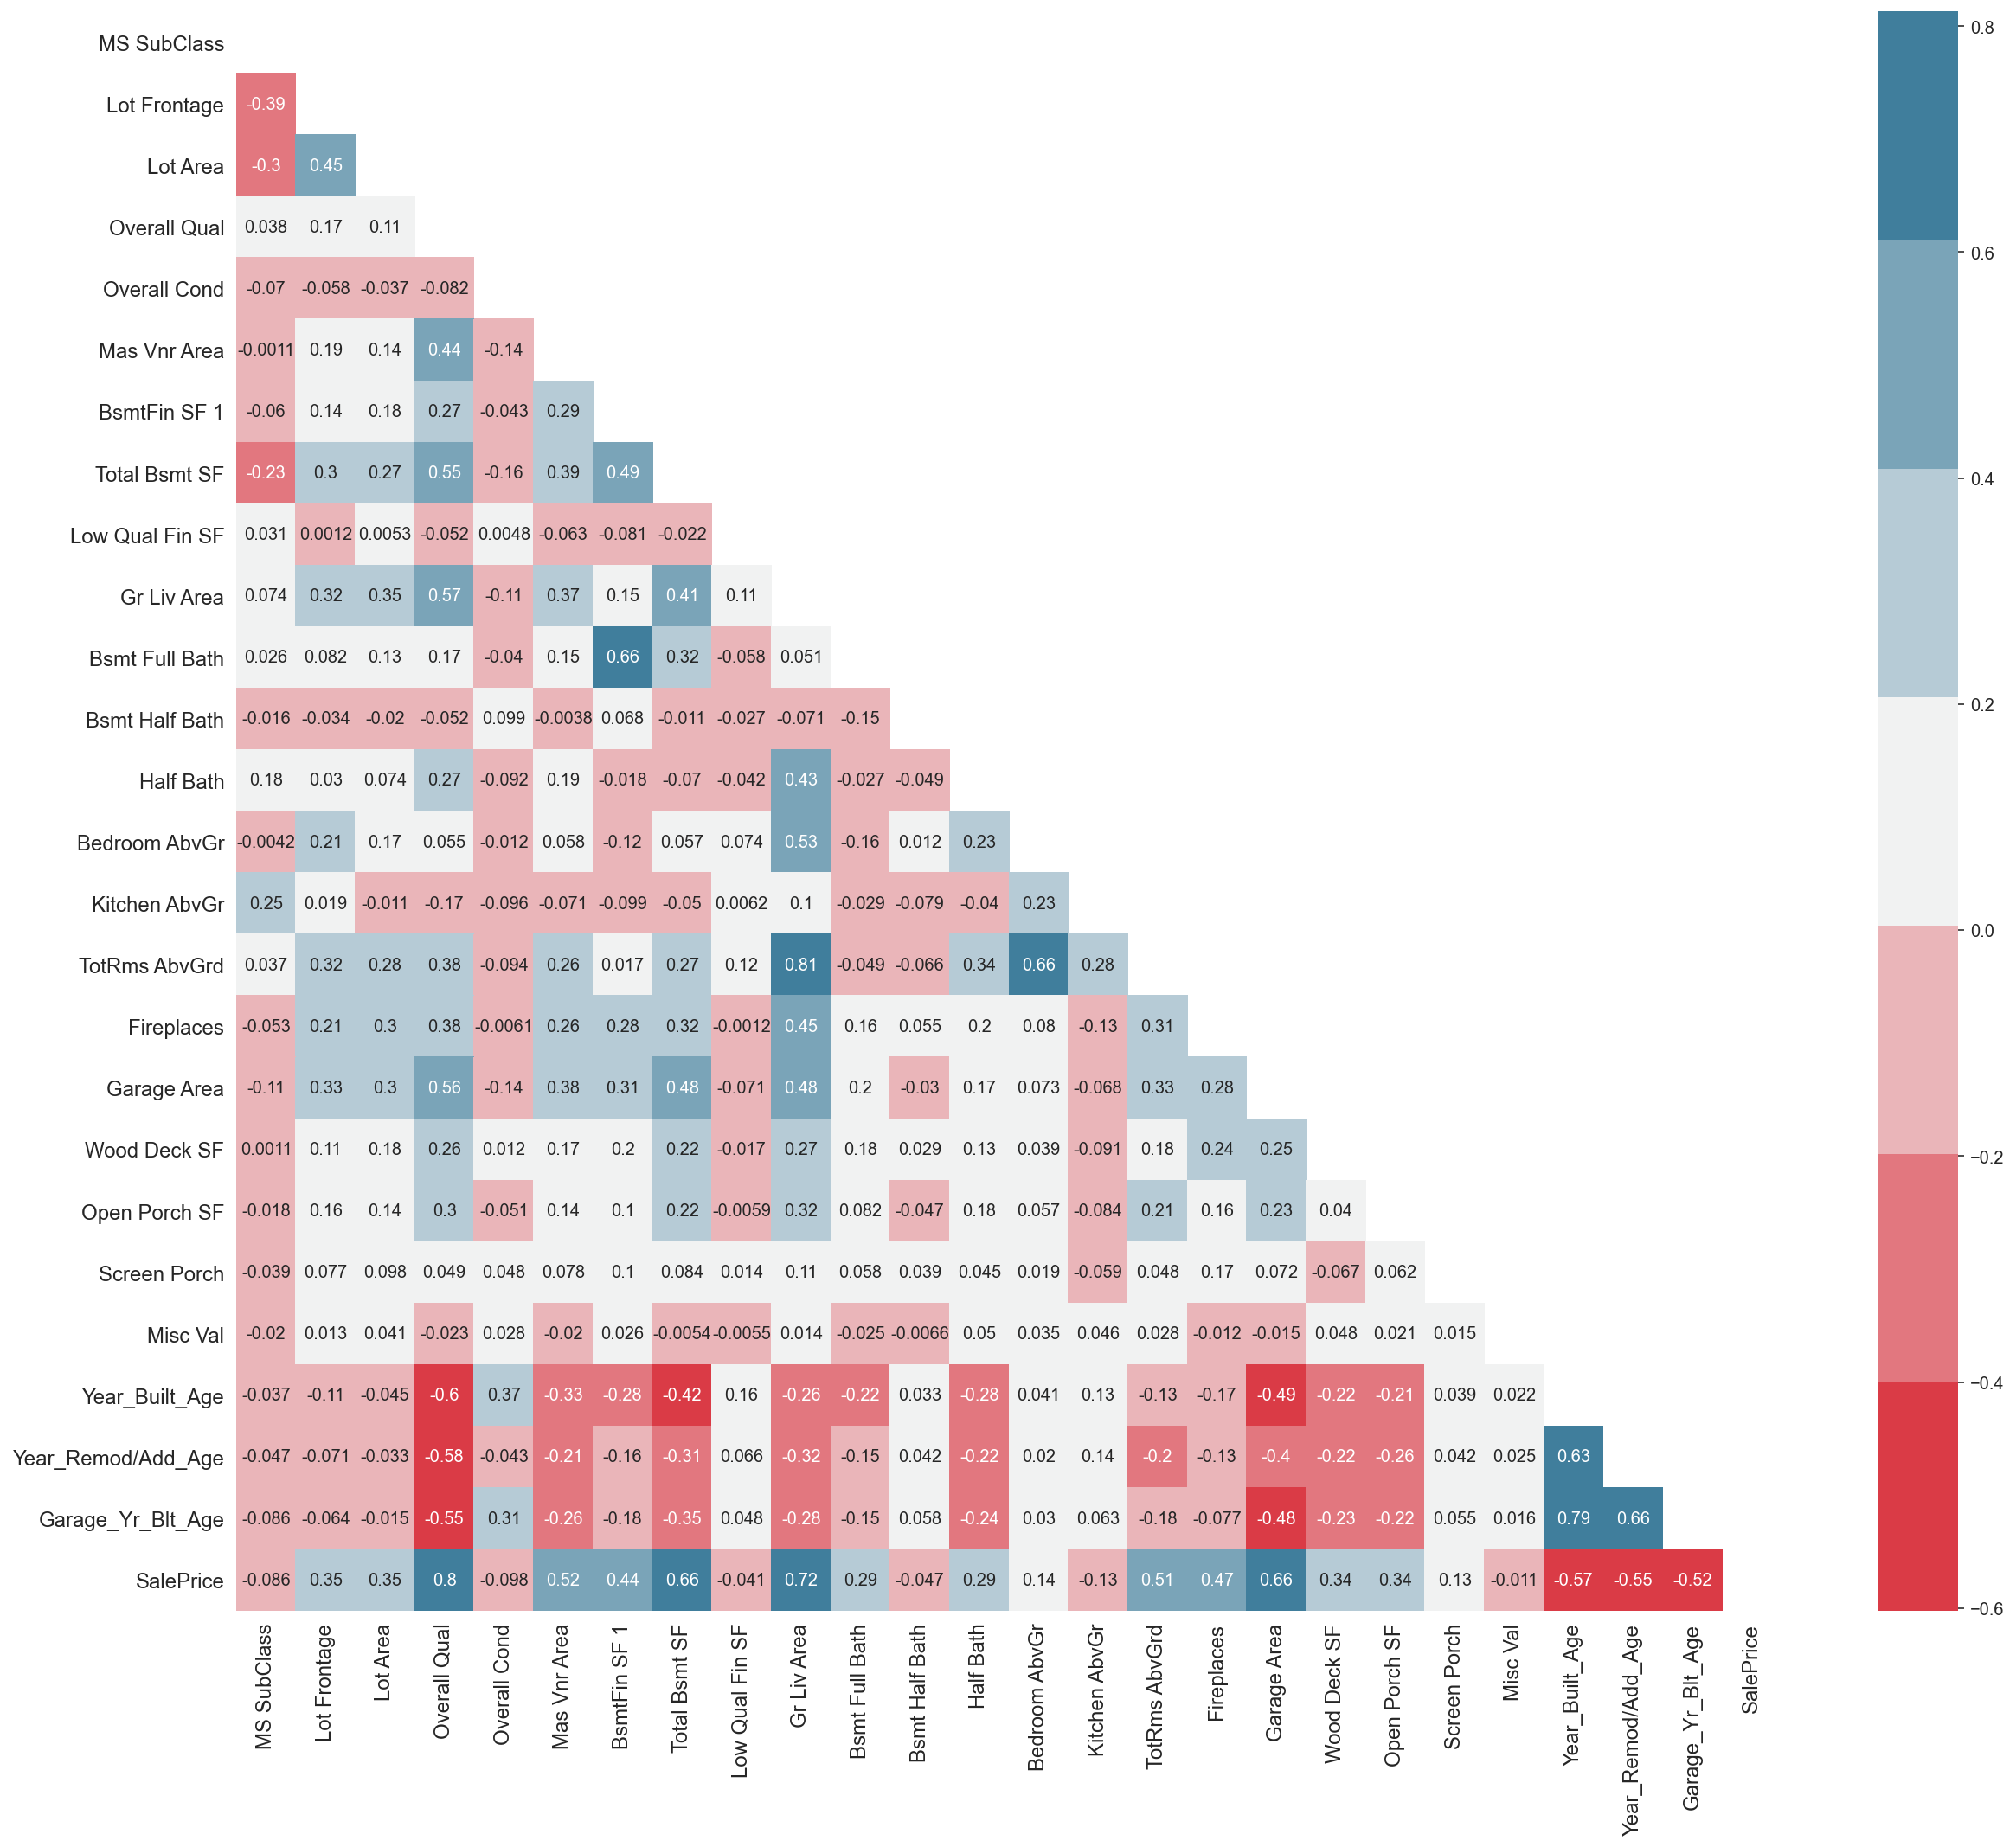

In [143]:
### Heatmap show the correlation value of all numerical features

plt.figure(figsize=(20,17))
mask = np.zeros_like(data_train_2.corr())
mask[np.triu_indices_from(mask)] = 1
ax = sns.heatmap(data_train_2.corr(),annot=True,cmap=sns.diverging_palette(10, 590, n=7),mask=mask);
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)
plt.show()

In [145]:
print(data_train_2.shape)
print(data_test_2.shape)

(2043, 26)
(879, 25)


			>>>> Linear Regression <<<<

Training RSME = 27850.52229566891
Training RSME CV = 28207.872683045243
Testing RSME = -
-------------------------------
Training R2 = 0.8765784707652492
Training R2 CV = 0.8727016813826663
Testing R2 = -
			>>>> RidgeCV Regression <<<<

Alpha = 16
Training RSME = 27854.40870945175
Training RSME CV = 28202.068317470617
Testing RSME = -
-------------------------------
Training R2 = 0.8765440225351652
Training R2 CV = 0.8727578322806817
Testing R2 = -
			>>>> LassoCV Regression <<<<

Alpha = 300
Training RSME = 27882.69769701158
Training RSME CV = 28225.23733247858
Testing RSME = -
-------------------------------
Training R2 = 0.8762931309715604
Training R2 CV = 0.8725502015251404
Testing R2 = -
			>>>> ElasticNet Regression <<<<

Alpha = 0.016
Training RSME = 27854.57066189792
Training RSME CV = 28202.22919745907
Testing RSME = -
-------------------------------
Training R2 = 0.8765425869235981
Training R2 CV = 0.8727556927604001
Testing R2 = -


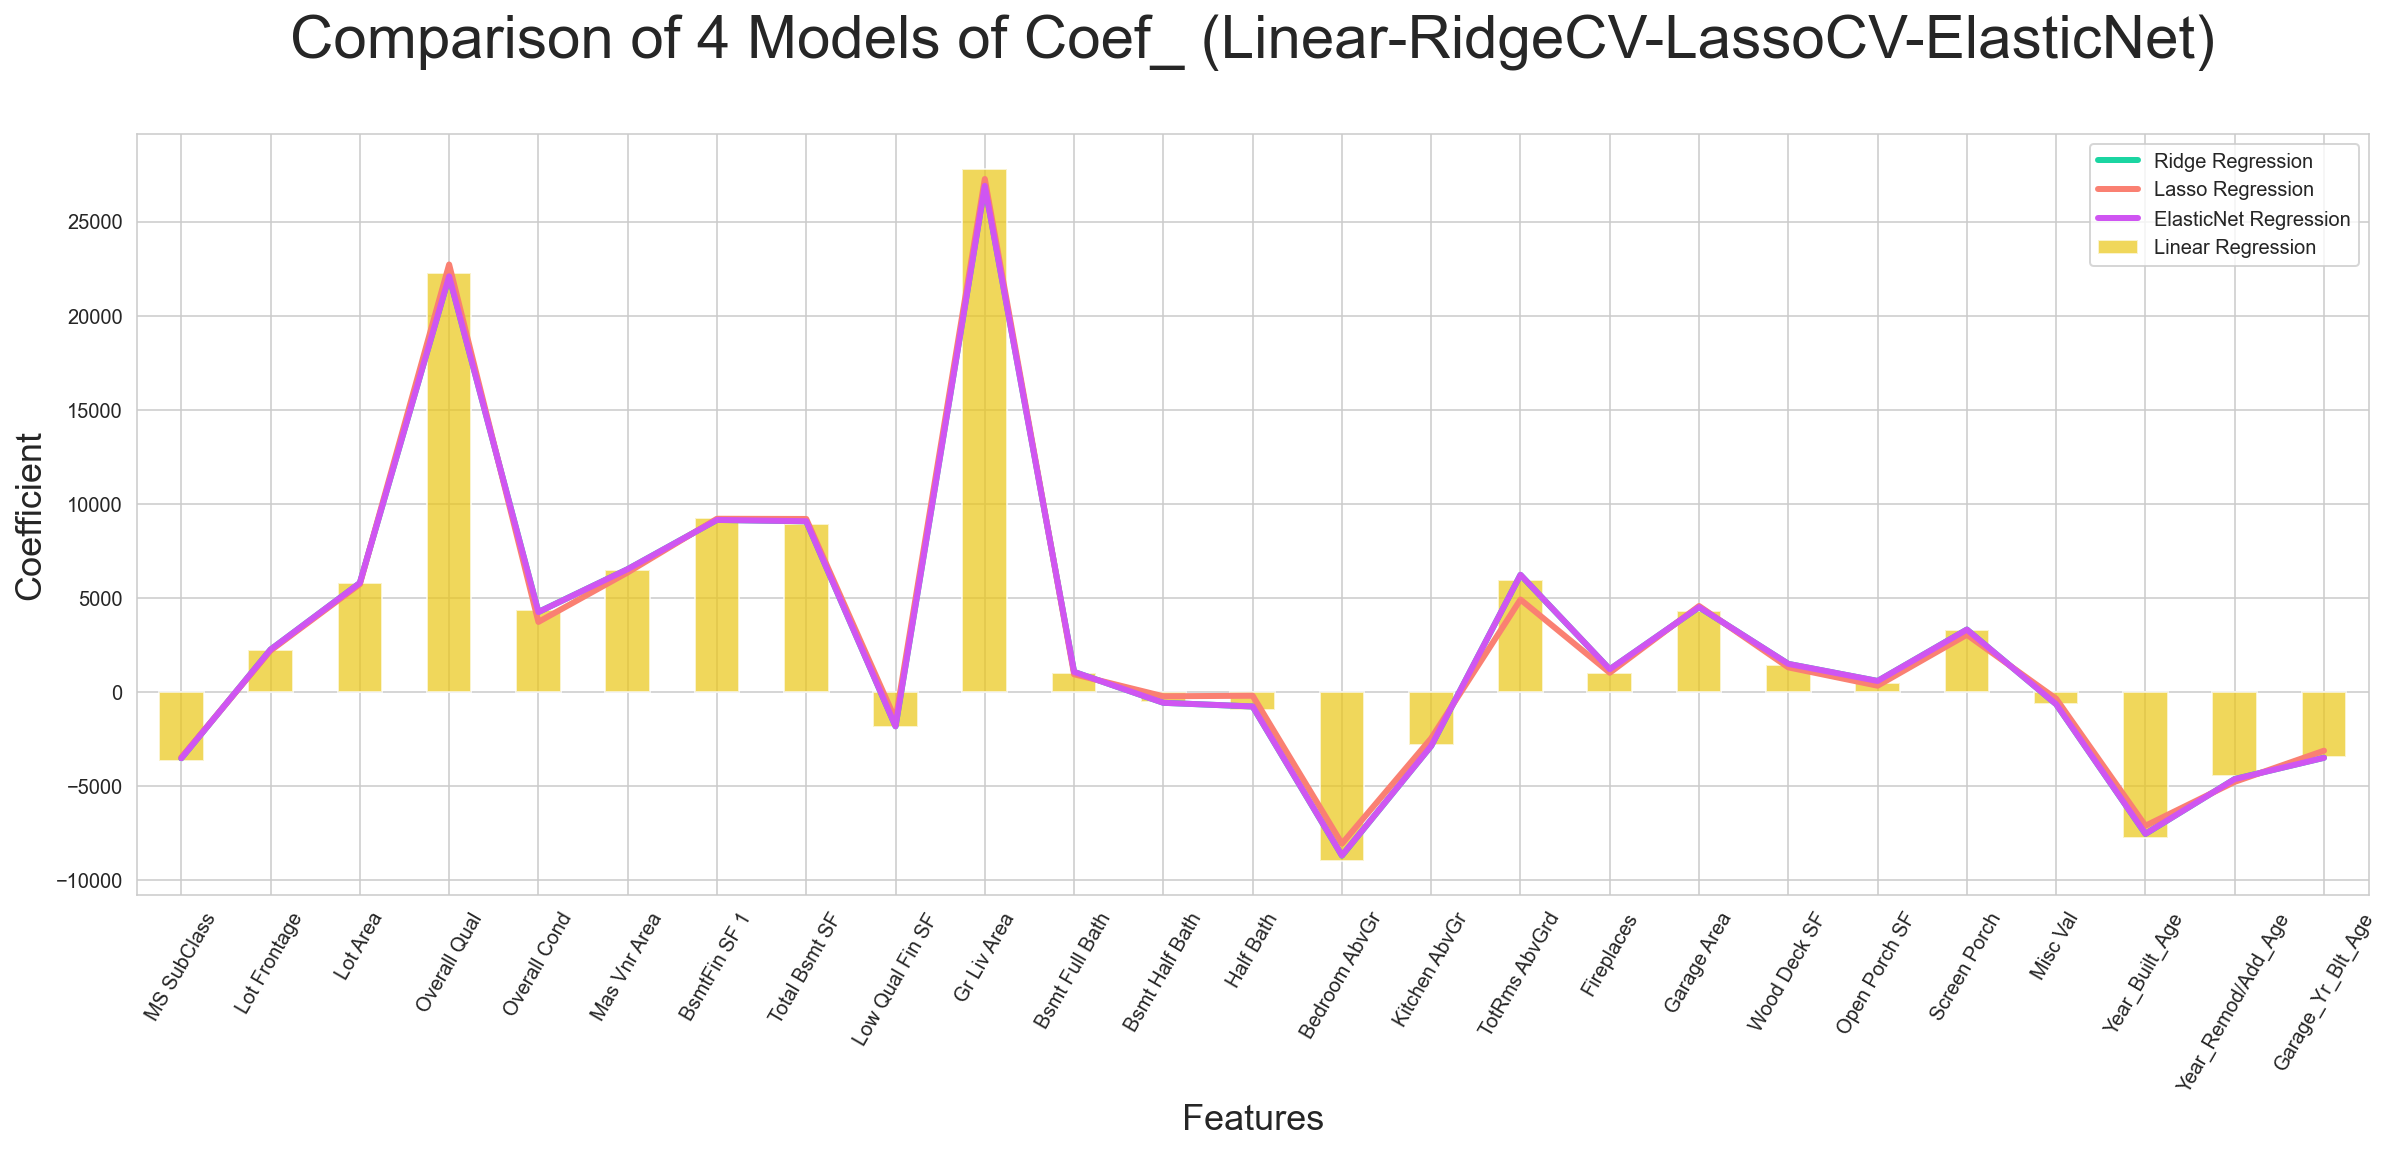

In [146]:
predict(data_train_2,data_test_2)

### From the result >> try to predict in Kaggle

In [164]:
X_train = data_train_2.drop(columns = ['SalePrice']) ### Data from train set (numerical)
X_test = data_test_2 ### Data from test set (numerical)
y_train = data_train_2['SalePrice']
#     X = data.drop(columns = ['SalePrice'])
#     y = data['SalePrice']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)
    
ss = StandardScaler()
ss_train = ss.fit_transform(X_train)
ss_test = ss.transform(X_test)

In [165]:
# ## lR model

# lr = LinearRegression()
# lr.fit(ss_train,y_train)
# prediction_value = lr.predict(ss_test)
# prediction_value = [int(i) for i in prediction_value]

In [ ]:
## ElasticNet

en_alpha = 0.016 # alpha value from ElasticNetCV
en_model = ElasticNet(alpha=en_alpha,l1_ratio=0.5)
en_model.fit(ss_train,y_train)
prediction_value = en_model.predict(ss_test)
prediction_value = [int(i) for i in prediction_value] # Create list of prediction value

In [166]:
df_test['SalePrice'] = prediction_value

In [167]:
df_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0  Grvl       Reg          Lvl  ...            0         0     NaN   NaN   
1   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
2   NaN       IR1          Lvl  ...            0         0     NaN   NaN   
3   NaN       Reg          Lvl  ...            0         0     NaN   NaN   
4   NaN       IR1          Lvl  ...          185         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       4    2006        WD      136843  
1          NaN        0       8    2006        WD      155526  
2          NaN        0       9    2006        New     207472  
3          NaN        0       7    2007        WD      107770  
4          NaN        0       7    2009        WD      191757  

[5 rows x 81 columns]

In [168]:
### Export to csv file

df_test[['Id','SalePrice']].to_csv('data_test.csv',index=False)

### 3rd Testing >> Features selected by Sequential Forward Selection (SFS) for Categorical Data

In [170]:
### Check the dimension of train and test file for categorical data

print(df_train_obj_dum_new.shape)
print(df_test_obj_dum_new.shape)

(2051, 42)
(879, 41)


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420892970266.8711, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316731966090.8733, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278899985254.91895, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380316043765.26416, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304968081572.8965, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306520523230.1919, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16189585323.82129, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19638279214.239746, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197810714836.4607, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7957485487.936035, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174797375030.688, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1434967123.5488281, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6656601931.192871, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121653490238.12402, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1219376032.3979492, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7947601243.190918, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174797375030.688, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1435100016.2944336, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18430493209.81299, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115298263641.71875, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194013708726.05298, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1812817898.8417969, tolerance: 1002395997.5469395
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5770221283.213867, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102735854787.22314, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2706460340.975586, tolerance: 1053788072.0385877
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1823655704.3579102, tolerance: 1002395997.5469395
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249555310985.8147, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1642197446.8237305, tolerance: 1002395997.5469395
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249257495252.55078, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116237068707.87695, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1674843502.4189453, tolerance: 1002395997.5469395
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249392598758.69653, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135385174832.29346, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249191642262.2666, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46246884869.71338, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1221762864.1894531, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2954407942.576172, tolerance: 1053788072.0385877
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2286294225.007324, tolerance: 1002395997.5469395
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249191642262.59912, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2833476220.4960938, tolerance: 1002395997.5469395
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249175233147.66064, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78305352443.24414, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1328175760.4858398, tolerance: 1024127411.0469208
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3725148605.647461, tolerance: 1053788072.0385877
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2266901457.4433594, tolerance: 1002395997.5469395
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4071053592.6655273, tolerance: 1053788072.0385877
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2765795024.8583984, tolerance: 1002395997.5469395
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248888705537.96533, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

('MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RL', 'Land Contour_HLS', 'Land Contour_Low', 'Roof Matl_WdShake', 'Roof Matl_WdShngl', 'Exter Qual_Ex', 'Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA', 'Bsmt Qual_Ex', 'Bsmt Qual_Gd', 'Bsmt Qual_TA', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Kitchen Qual_Ex', 'Kitchen Qual_Fa', 'Kitchen Qual_Gd', 'Kitchen Qual_TA', 'Paved Drive_N', 'Paved Drive_P', 'Paved Drive_Y')


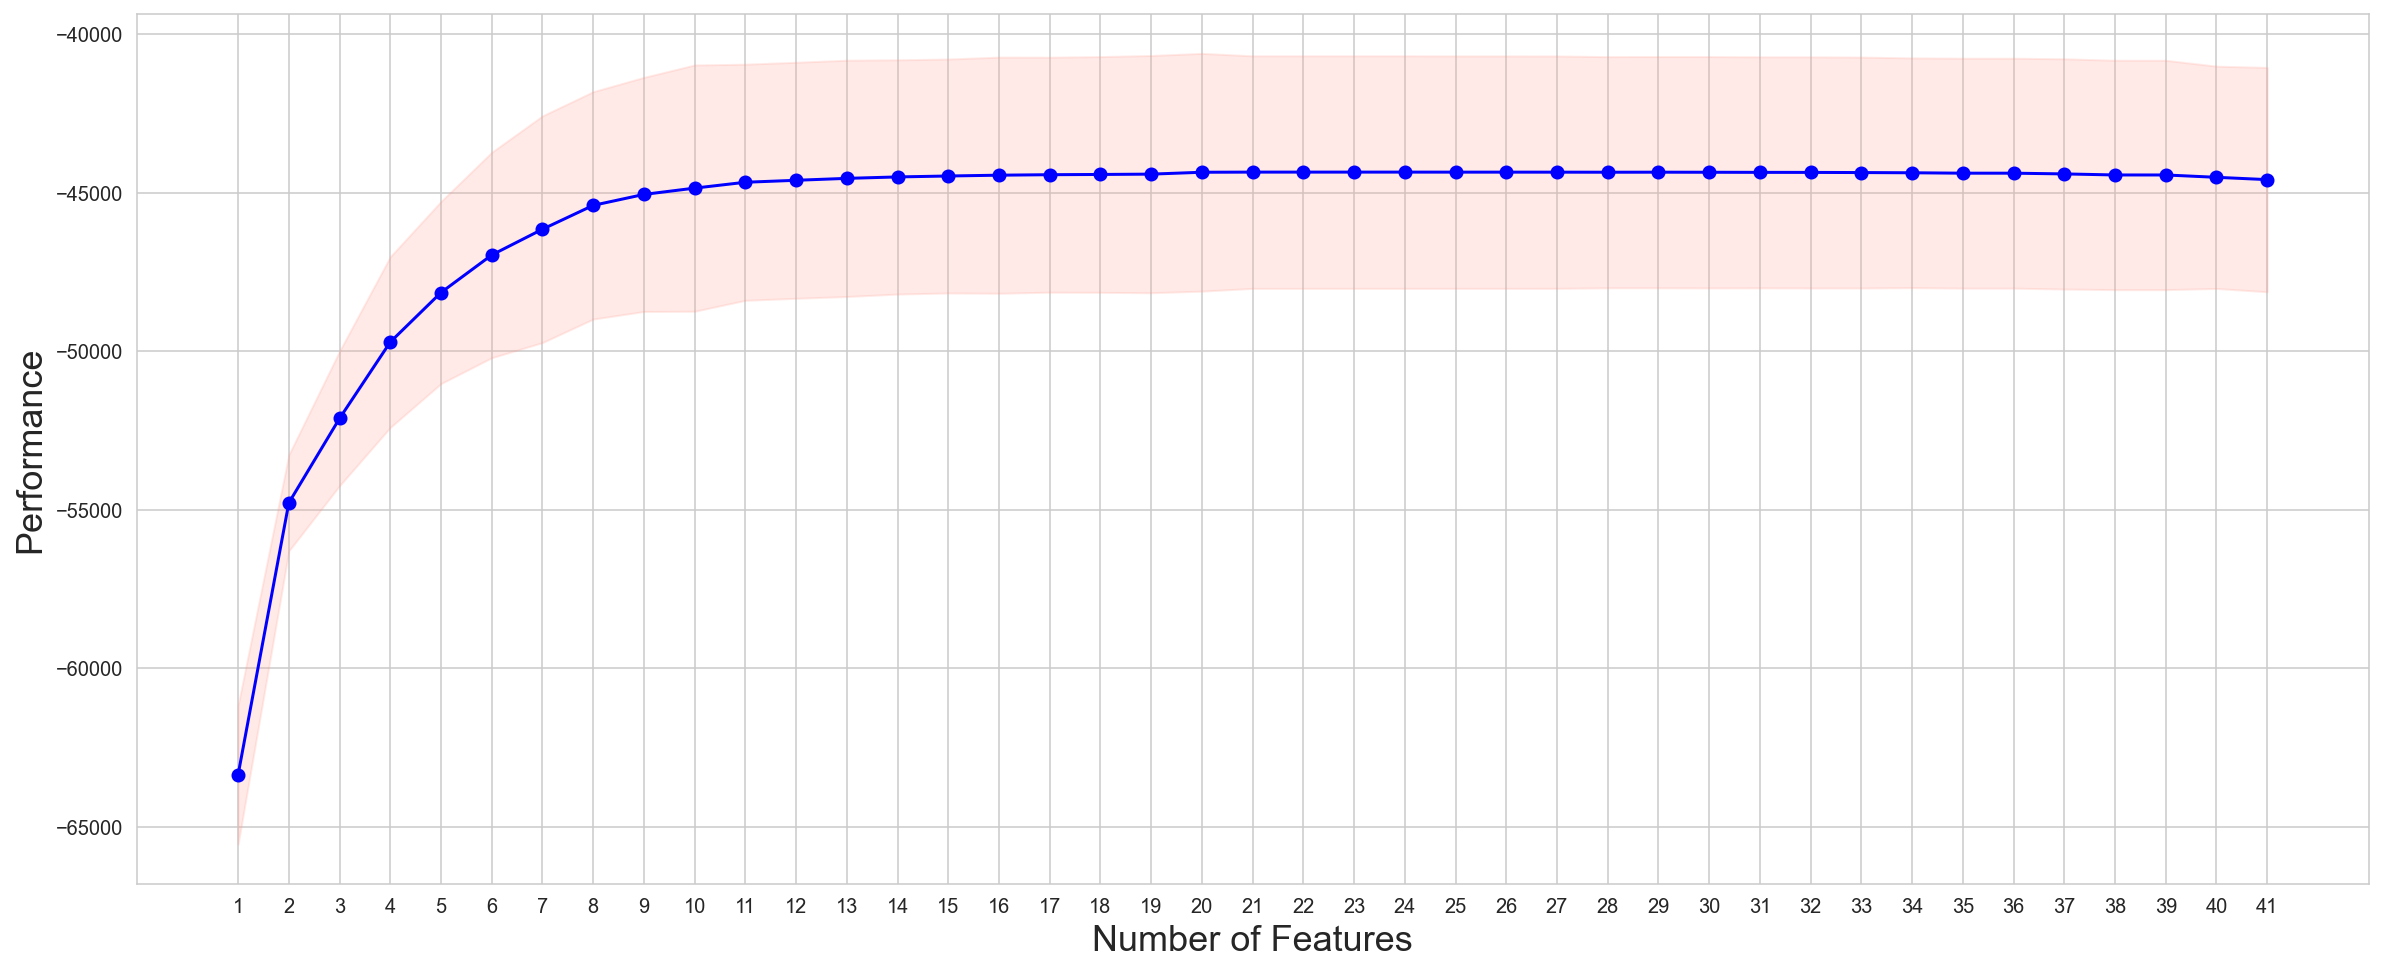

In [172]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import itertools

#import and prepare data >>>>>>>> (Train Data) <<<<<<<<<<

X = df_train_obj_dum_new.drop(columns = ['SalePrice'])
y = df_train_obj_dum_new['SalePrice']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)
# ss = StandardScaler()
# ss_train = ss.fit_transform(X_train)
# ss_test = ss.transform(X_test)

#Define Sequential Forward Selection (sfs)
sfs = SFS(Lasso(), 
          k_features=41, 
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          cv=5)

sfs = sfs.fit(X, y)
plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize=(20,8),bcolor='#FF9A8C')
plt.xlabel('Number of Features',fontsize=18)
plt.ylabel('Performance',fontsize=18)

print(sfs.get_metric_dict()[25]['feature_names']) ### Get the name of 25 features that SFS recommend

In [173]:
### Use the features that the SFS recommends for highest performance (y-axis)

data_train_obj_1 = df_train_obj_dum_new[['MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RL', 'Land Contour_HLS', 'Land Contour_Low', 'Roof Matl_WdShake', 'Roof Matl_WdShngl', 'Exter Qual_Ex', 'Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA', 'Bsmt Qual_Ex', 'Bsmt Qual_Gd', 'Bsmt Qual_TA', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Kitchen Qual_Ex', 'Kitchen Qual_Fa', 'Kitchen Qual_Gd', 'Kitchen Qual_TA', 'Paved Drive_N', 'Paved Drive_P', 'Paved Drive_Y','SalePrice']]
data_test_obj_1 = df_test_obj_dum_new[['MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RL', 'Land Contour_HLS', 'Land Contour_Low', 'Roof Matl_WdShake', 'Roof Matl_WdShngl', 'Exter Qual_Ex', 'Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA', 'Bsmt Qual_Ex', 'Bsmt Qual_Gd', 'Bsmt Qual_TA', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Kitchen Qual_Ex', 'Kitchen Qual_Fa', 'Kitchen Qual_Gd', 'Kitchen Qual_TA', 'Paved Drive_N', 'Paved Drive_P', 'Paved Drive_Y']]

In [329]:
print(data_train_obj_1.shape)
print(data_test_obj_1.shape)

(2051, 26)
(879, 25)


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11478577679.240234, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1428822443633.2275, tolerance: 1026891063.9887587
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10568468805.345215, tolerance: 1043538609.9556499
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

			>>>> Linear Regression <<<<

Training RSME = 43985.58017906741
Training RSME CV = 675617393520262.6
Testing RSME = -
-------------------------------
Training R2 = 0.691866437703138
Training R2 CV = -3.832878700019593e+20
Testing R2 = -
			>>>> RidgeCV Regression <<<<

Alpha = 7
Training RSME = 43963.31648430098
Training RSME CV = 44349.62808613933
Testing RSME = -
-------------------------------
Training R2 = 0.6921782878766127
Training R2 CV = 0.684310122344473
Testing R2 = -
			>>>> LassoCV Regression <<<<

Alpha = 300
Training RSME = 44036.740649917694
Training RSME CV = 44424.92737744169
Testing RSME = -
-------------------------------
Training R2 = 0.6911492287486141
Training R2 CV = 0.6832491344789047
Testing R2 = -
			>>>> ElasticNet Regression <<<<

Alpha = 0.006
Training RSME = 43962.90307115382
Training RSME CV = 44349.26938597467
Testing RSME = -
-------------------------------
Training R2 = 0.6921840771097557
Training R2 CV = 0.6843146981421055
Testing R2 = -


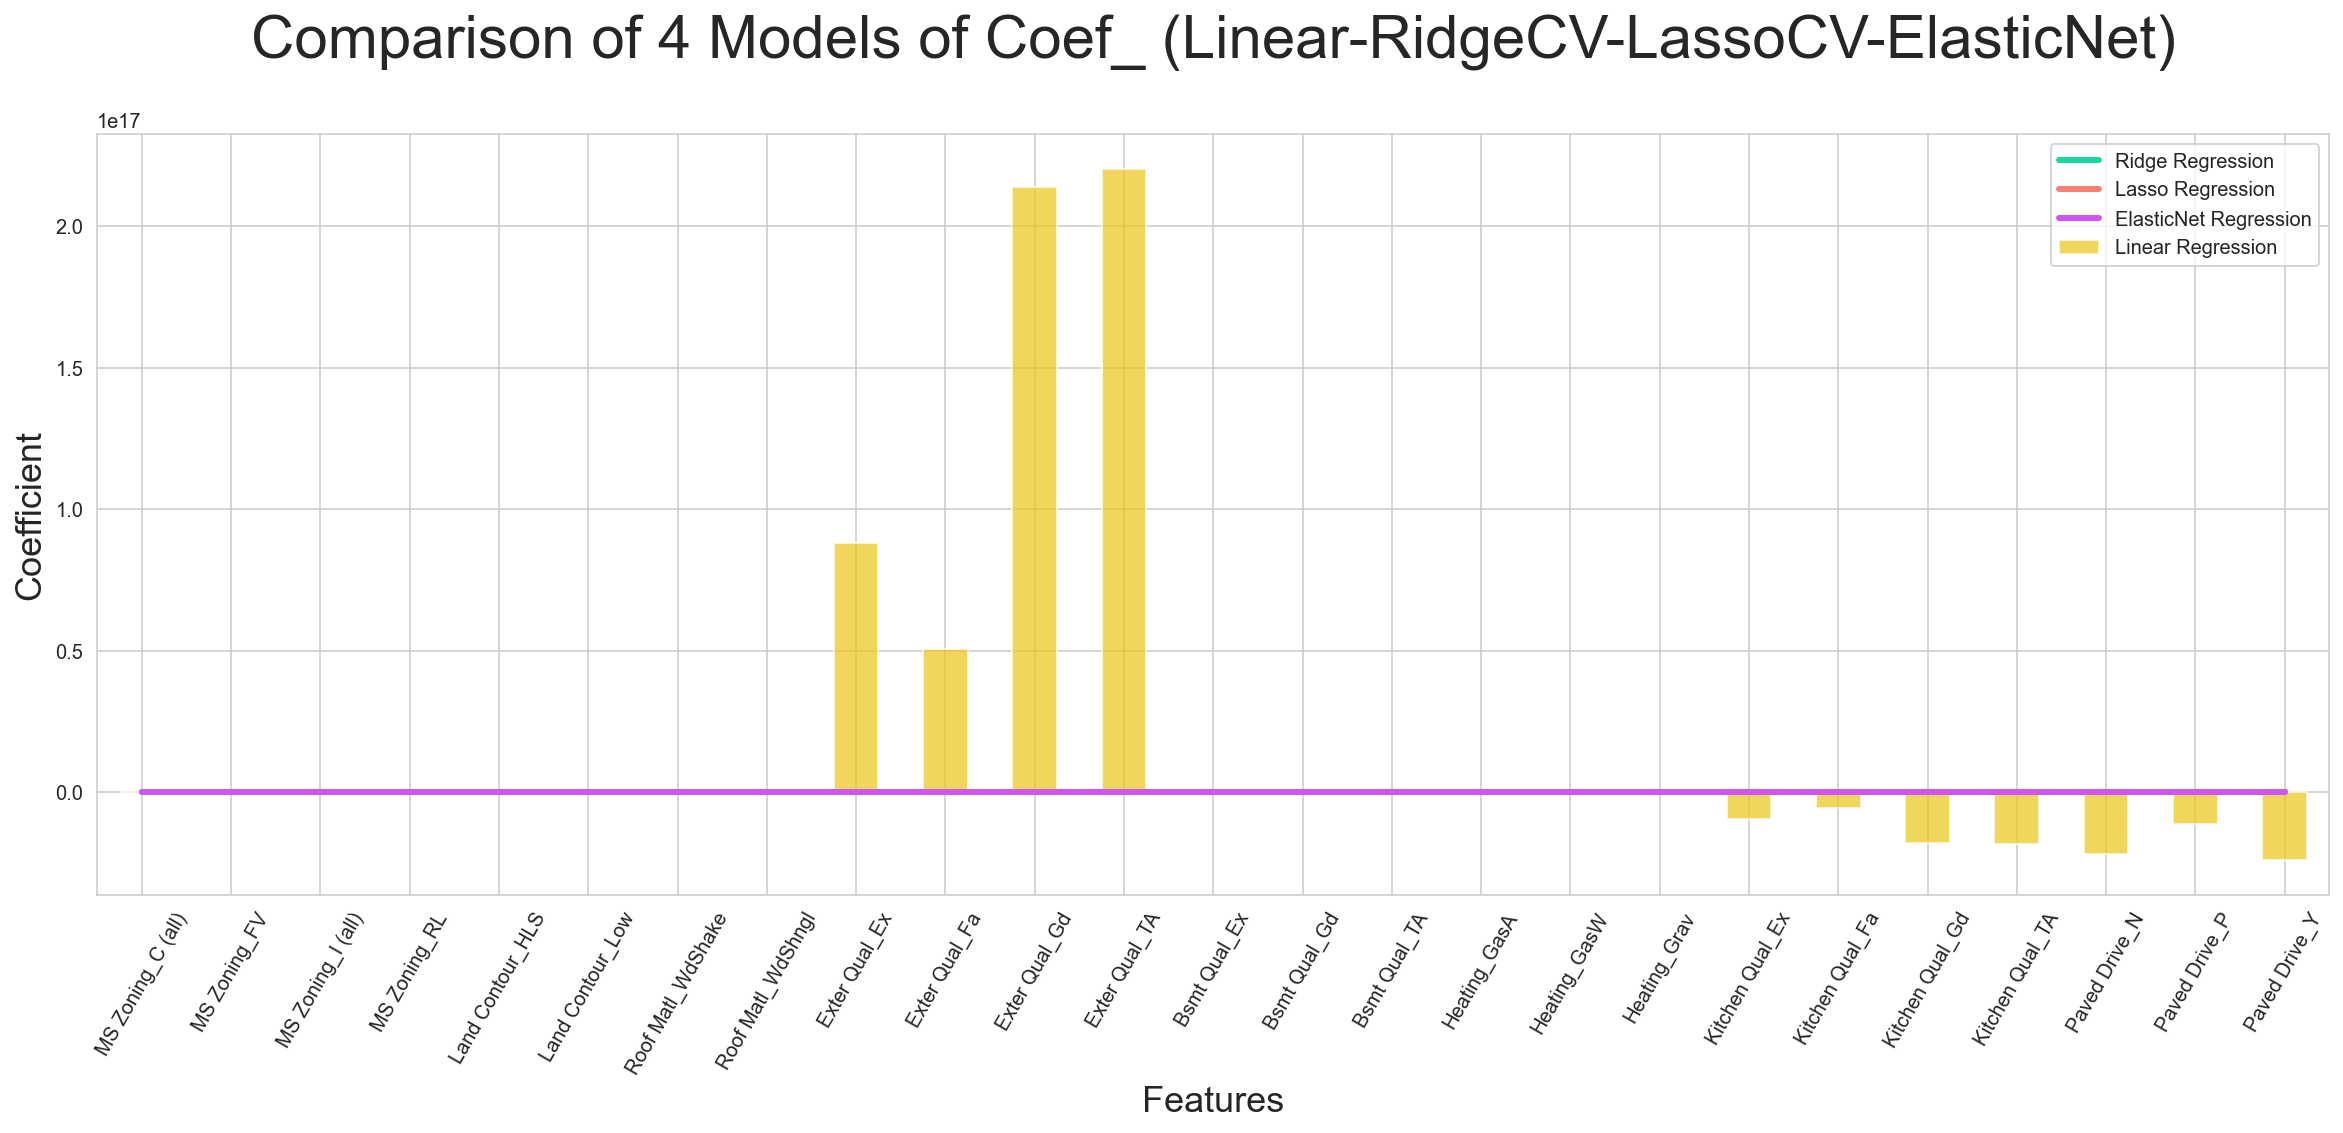

In [174]:
predict(data_train_obj_1,data_test_obj_1)

### 4th Testing >> Features selected by RFE

In [175]:
from sklearn.feature_selection import RFE

#Split the features and target data
#Select the first 13 columns as features
X = df_train_int.drop(columns = ['SalePrice'])
y = df_train_int['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)

ss = StandardScaler()
ss_train = ss.fit_transform(X_train)
ss_test = ss.transform(X_test)

#Build a logistic regression model 
model = LinearRegression()
#Define RFE 
rfe = RFE(model,25) 
#Use RFE to select the 25 top features (use same number of features with mlxtend)
fit = rfe.fit(ss_train,y_train)

#Create a dataframe for the results 
df_RFE_results = []
for i in range(X.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': list(df_train_int.columns)[i],
            'Selected':  rfe.support_[i],
            'RFE_ranking':  rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
df_RFE_results.sort_values(by='RFE_ranking')

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=25 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Feature_names  Selected  RFE_ranking
Columns                                           
0               MS SubClass      True            1
31                SalePrice      True            1
28             Screen Porch      True            1
24             Wood Deck SF      True            1
23              Garage Area      True            1
21               Fireplaces      True            1
20            TotRms AbvGrd      True            1
19            Kitchen AbvGr      True            1
18            Bedroom AbvGr      True            1
32           Year_Built_Age      True            1
14           Bsmt Full Bath      True            1
13              Gr Liv Area      True            1
33       Year_Remod/Add_Age      True            1
11               2nd Flr SF      True            1
1              Lot Frontage      True            1
2                  Lot Area      True            1
3              Overall Qual      True            1
12          Low Qual Fin SF      True            1
5              Mas Vnr Area      True            1
6              BsmtFin SF 1      True            1
4              Overall Cond      True            1
8               Bsmt Unf SF      True            1
9             Total Bsmt SF      True            1
10               1st Flr SF      True            1
7              BsmtFin SF 2      True            1
29                Pool Area     False            2
17                Half Bath     False            3
16                Full Bath     False            4
22              Garage Cars     False            5
30                 Misc Val     False            6
26           Enclosed Porch     False            7
25            Open Porch SF     False            8
27               3Ssn Porch     False            9
15           Bsmt Half Bath     False           10

In [176]:
df_RFE_results.sort_values(by='RFE_ranking')[['Feature_names']].set_index('Feature_names').index

Index(['MS SubClass', 'SalePrice', 'Screen Porch', 'Wood Deck SF',
       'Garage Area', 'Fireplaces', 'TotRms AbvGrd', 'Kitchen AbvGr',
       'Bedroom AbvGr', 'Year_Built_Age', 'Bsmt Full Bath', 'Gr Liv Area',
       'Year_Remod/Add_Age', '2nd Flr SF', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Low Qual Fin SF', 'Mas Vnr Area', 'BsmtFin SF 1',
       'Overall Cond', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       'BsmtFin SF 2', 'Pool Area', 'Half Bath', 'Full Bath', 'Garage Cars',
       'Misc Val', 'Enclosed Porch', 'Open Porch SF', '3Ssn Porch',
       'Bsmt Half Bath'],
      dtype='object', name='Feature_names')

In [180]:
data_train_RFE = df_train_int[['MS SubClass', 'Screen Porch', 'Wood Deck SF',
       'Garage Area', 'Fireplaces', 'TotRms AbvGrd', 'Kitchen AbvGr',
       'Bedroom AbvGr', 'Year_Built_Age', 'Bsmt Full Bath', 'Gr Liv Area',
       'Year_Remod/Add_Age', '2nd Flr SF', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Low Qual Fin SF', 'Mas Vnr Area', 'BsmtFin SF 1',
       'Overall Cond', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       'BsmtFin SF 2', 'Pool Area', 'Half Bath', 'Full Bath', 'Garage Cars',
       'Misc Val', 'Enclosed Porch', 'Open Porch SF', '3Ssn Porch',
       'Bsmt Half Bath','SalePrice']]

data_test_RFE = df_test_int[['MS SubClass', 'Screen Porch', 'Wood Deck SF',
       'Garage Area', 'Fireplaces', 'TotRms AbvGrd', 'Kitchen AbvGr',
       'Bedroom AbvGr', 'Year_Built_Age', 'Bsmt Full Bath', 'Gr Liv Area',
       'Year_Remod/Add_Age', '2nd Flr SF', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Low Qual Fin SF', 'Mas Vnr Area', 'BsmtFin SF 1',
       'Overall Cond', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       'BsmtFin SF 2', 'Pool Area', 'Half Bath', 'Full Bath', 'Garage Cars',
       'Misc Val', 'Enclosed Porch', 'Open Porch SF', '3Ssn Porch',
       'Bsmt Half Bath']]

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4054808123.196411, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573566060307.9337, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7273762654.094482, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Con

			>>>> Linear Regression <<<<

Training RSME = 27884.827385175187
Training RSME CV = 28454.28529254374
Testing RSME = -
-------------------------------
Training R2 = 0.8762742327201034
Training R2 CV = 0.8704876230302536
Testing R2 = -
			>>>> RidgeCV Regression <<<<

Alpha = 28
Training RSME = 27892.382204572303
Training RSME CV = 28475.710195413598
Testing RSME = -
-------------------------------
Training R2 = 0.8762071817438856
Training R2 CV = 0.8703068928519025
Testing R2 = -
			>>>> LassoCV Regression <<<<

Alpha = 354
Training RSME = 27954.304396111176
Training RSME CV = 28399.445943538478
Testing RSME = -
-------------------------------
Training R2 = 0.8756569217174333
Training R2 CV = 0.8709997305885686
Testing R2 = -
			>>>> ElasticNet Regression <<<<

Alpha = 0.041
Training RSME = 27902.058517700945
Training RSME CV = 28475.005164132373
Testing RSME = -
-------------------------------
Training R2 = 0.8761212754314172
Training R2 CV = 0.8703132361507058
Testing R2 = -


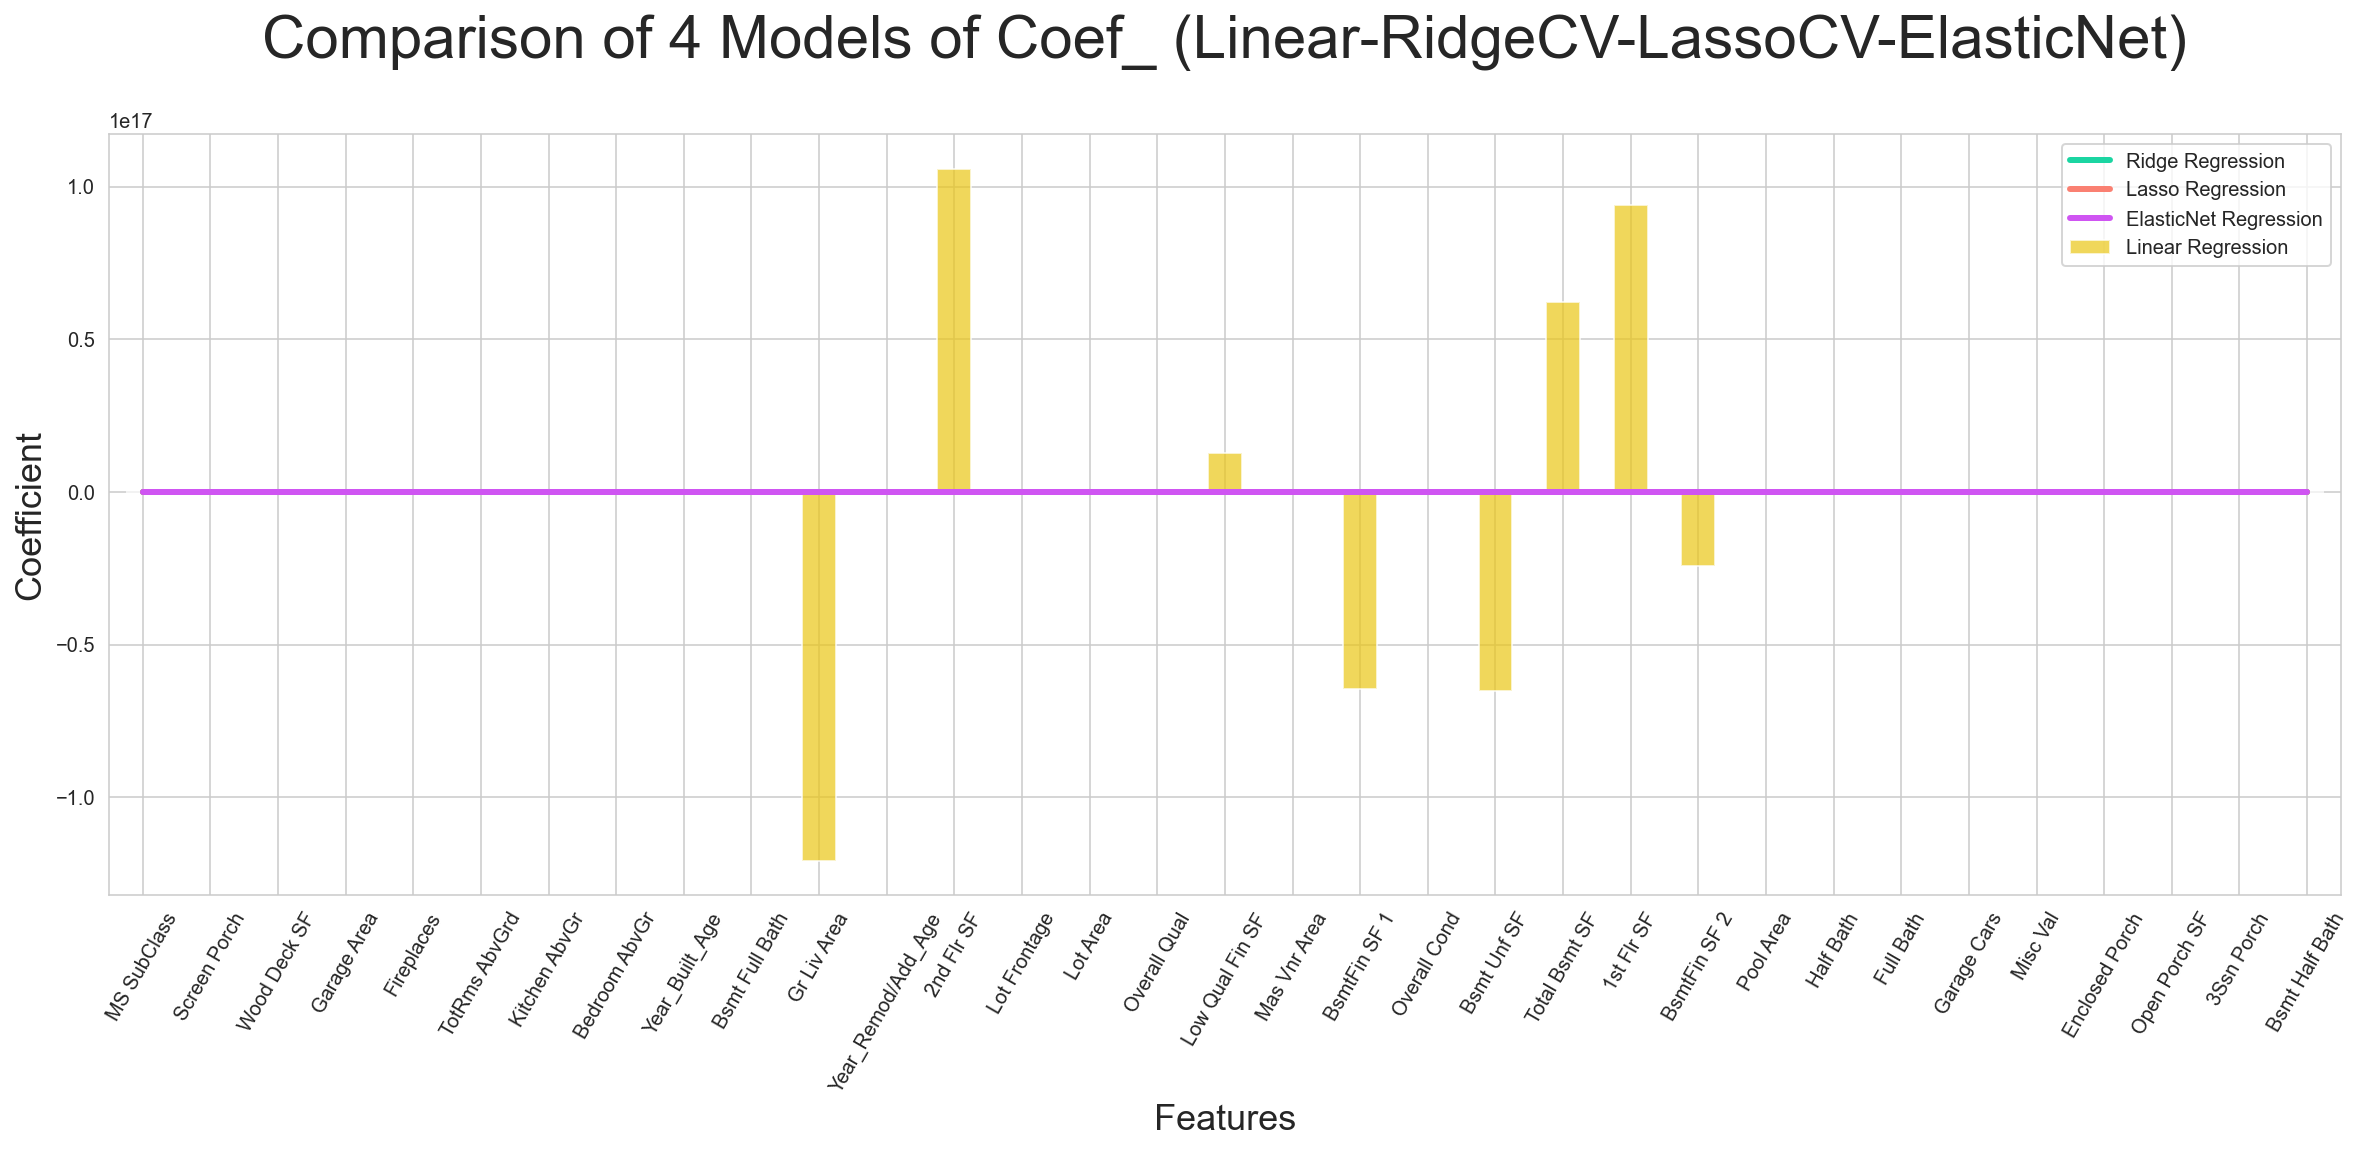

In [181]:
predict(data_train_RFE,data_test_RFE)

### From the result >> try to predict in Kaggle

In [187]:
X_train = data_train_RFE.drop(columns = ['SalePrice']) ### Data from train set (numerical)
X_test = data_test_RFE ### Data from test set (numerical)
y_train = data_train_RFE['SalePrice']
#     X = data.drop(columns = ['SalePrice'])
#     y = data['SalePrice']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)
    
ss = StandardScaler()
ss_train = ss.fit_transform(X_train)
ss_test = ss.transform(X_test)

In [188]:
# ## lR model

# lr = LinearRegression()
# lr.fit(ss_train,y_train)
# prediction_value = lr.predict(ss_test)
# prediction_value = [int(i) for i in prediction_value]

In [189]:
## ElasticNet

en_alpha = 0.041
en_model = ElasticNet(alpha=en_alpha,l1_ratio=0.5)
en_model.fit(ss_train,y_train)
prediction_value = en_model.predict(ss_test)
prediction_value = [int(i) for i in prediction_value]

In [190]:
df_test['SalePrice'] = prediction_value

In [191]:
### Export to csv file (RFE)

df_test[['Id','SalePrice']].to_csv('data_test_RFE.csv',index=False)

### 5th Features Selected from model Numerical + Categorical

In [197]:
### Train file (Numerical)

print(f'Shape = {df_train_int.shape}')
df_train_int.head()

Shape = (2043, 35)


MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0           60          69.0     13517             6             8   
1           60          43.0     11492             7             5   
2           20          68.0      7922             5             7   
3           60          73.0      9802             5             5   
4           50          82.0     14235             6             8   

   Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  ...  \
0         289.0         533.0           0.0        192.0          725.0  ...   
1         132.0         637.0           0.0        276.0          913.0  ...   
2           0.0         731.0           0.0        326.0         1057.0  ...   
3           0.0           0.0           0.0        384.0          384.0  ...   
4           0.0           0.0           0.0        676.0          676.0  ...   

   Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
0             44               0           0             0          0   
1             74               0           0             0          0   
2             52               0           0             0          0   
3              0               0           0             0          0   
4             59               0           0             0          0   

   Misc Val  SalePrice  Year_Built_Age  Year_Remod/Add_Age  Garage_Yr_Blt_Age  
0         0     130500              45                  16               45.0  
1         0     220000              25                  24               24.0  
2         0     109000              68                  14               68.0  
3         0     174000              15                  14               14.0  
4         0     138500             121                  28               64.0  

[5 rows x 35 columns]

In [198]:
### Test file (Numerical)

print(f'Shape = {df_test_int.shape}')
df_test_int.head()

Shape = (879, 34)


MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0          190          69.0      9142             6             8   
1           90          70.0      9662             5             4   
2           60          58.0     17104             7             5   
3           30          60.0      8520             5             6   
4           20          70.0      9500             6             5   

   Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  ...  \
0           0.0             0             0         1020           1020  ...   
1           0.0             0             0         1967           1967  ...   
2           0.0           554             0          100            654  ...   
3           0.0             0             0          968            968  ...   
4         247.0           609             0          785           1394  ...   

   Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  \
0             0             60             112           0             0   
1           170              0               0           0             0   
2           100             24               0           0             0   
3             0              0             184           0             0   
4             0             76               0           0           185   

   Pool Area  Misc Val  Year_Built_Age  Year_Remod/Add_Age  Garage_Yr_Blt_Age  
0          0         0             111                  71              111.0  
1          0         0              44                  44               44.0  
2          0         0              15                  15               15.0  
3          0         0              98                  15               86.0  
4          0         0              58                  58               58.0  

[5 rows x 34 columns]

In [201]:
### Train file (Categorical)

print(f'Shape = {df_train_obj_dum_new.shape}')
df_train_obj_dum_new.head()

Shape = (2051, 42)


SalePrice  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
0     130500                  0             0                  0   
1     220000                  0             0                  0   
2     109000                  0             0                  0   
3     174000                  0             0                  0   
4     138500                  0             0                  0   

   MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Street_Grvl  Street_Pave  \
0             0             1             0            0            1   
1             0             1             0            0            1   
2             0             1             0            0            1   
3             0             1             0            0            1   
4             0             1             0            0            1   

   Land Contour_Bnk  ...  Heating_GasA  Heating_GasW  Heating_Grav  \
0                 0  ...             1             0             0   
1                 0  ...             1             0             0   
2                 0  ...             1             0             0   
3                 0  ...             1             0             0   
4                 0  ...             1             0             0   

   Kitchen Qual_Ex  Kitchen Qual_Fa  Kitchen Qual_Gd  Kitchen Qual_TA  \
0                0                0                1                0   
1                0                0                1                0   
2                0                0                1                0   
3                0                0                0                1   
4                0                0                0                1   

   Paved Drive_N  Paved Drive_P  Paved Drive_Y  
0              0              0              1  
1              0              0              1  
2              0              0              1  
3              0              0              1  
4              1              0              0  

[5 rows x 42 columns]

In [202]:
### Test file (Categorical)

print(f'Shape = {df_test_obj_dum_new.shape}')
df_test_obj_dum_new.head()

Shape = (879, 41)


MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  MS Zoning_RH  \
0                  0             0                  0             0   
1                  0             0                  0             0   
2                  0             0                  0             0   
3                  0             0                  0             0   
4                  0             0                  0             0   

   MS Zoning_RL  MS Zoning_RM  Street_Grvl  Street_Pave  Land Contour_Bnk  \
0             0             1            0            1                 0   
1             1             0            0            1                 0   
2             1             0            0            1                 0   
3             0             1            0            1                 0   
4             1             0            0            1                 0   

   Land Contour_HLS  ...  Heating_GasA  Heating_GasW  Heating_Grav  \
0                 0  ...             1             0             0   
1                 0  ...             1             0             0   
2                 0  ...             1             0             0   
3                 0  ...             1             0             0   
4                 0  ...             1             0             0   

   Kitchen Qual_Ex  Kitchen Qual_Fa  Kitchen Qual_Gd  Kitchen Qual_TA  \
0                0                1                0                0   
1                0                0                0                1   
2                0                0                1                0   
3                0                0                0                1   
4                0                0                0                1   

   Paved Drive_N  Paved Drive_P  Paved Drive_Y  
0              0              0              1  
1              0              0              1  
2              0              0              1  
3              1              0              0  
4              0              0              1  

[5 rows x 41 columns]

In [203]:
### Remove Row for Outlier data (Categorical)

df_train_obj_dum_new = df_train_obj_dum_new.drop(960)
df_train_obj_dum_new = df_train_obj_dum_new.drop(966)
df_train_obj_dum_new = df_train_obj_dum_new.drop(1335)
df_train_obj_dum_new = df_train_obj_dum_new.drop(1409)
df_train_obj_dum_new = df_train_obj_dum_new.drop(1699)
df_train_obj_dum_new = df_train_obj_dum_new.drop(471)
df_train_obj_dum_new = df_train_obj_dum_new.drop(694)
df_train_obj_dum_new = df_train_obj_dum_new.drop(1885)

In [204]:
### Number of row equal to Numerical data after delete outlier

print(f'Shape = {df_train_obj_dum_new.shape}')
df_train_obj_dum_new.head()

Shape = (2043, 42)


SalePrice  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
0     130500                  0             0                  0   
1     220000                  0             0                  0   
2     109000                  0             0                  0   
3     174000                  0             0                  0   
4     138500                  0             0                  0   

   MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Street_Grvl  Street_Pave  \
0             0             1             0            0            1   
1             0             1             0            0            1   
2             0             1             0            0            1   
3             0             1             0            0            1   
4             0             1             0            0            1   

   Land Contour_Bnk  ...  Heating_GasA  Heating_GasW  Heating_Grav  \
0                 0  ...             1             0             0   
1                 0  ...             1             0             0   
2                 0  ...             1             0             0   
3                 0  ...             1             0             0   
4                 0  ...             1             0             0   

   Kitchen Qual_Ex  Kitchen Qual_Fa  Kitchen Qual_Gd  Kitchen Qual_TA  \
0                0                0                1                0   
1                0                0                1                0   
2                0                0                1                0   
3                0                0                0                1   
4                0                0                0                1   

   Paved Drive_N  Paved Drive_P  Paved Drive_Y  
0              0              0              1  
1              0              0              1  
2              0              0              1  
3              0              0              1  
4              1              0              0  

[5 rows x 42 columns]

In [330]:
print(df_train_int.shape)
print(df_test_int.shape)
print(df_train_obj_dum_new.shape)
print(df_test_obj_dum_new.shape)

(2043, 35)
(879, 34)
(2043, 42)
(879, 41)


#### Numerical + Categorical data

In [207]:
df_train_int.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice', 'Year_Built_Age',
       'Year_Remod/Add_Age', 'Garage_Yr_Blt_Age'],
      dtype='object')

In [208]:
df_train_obj_dum_new.drop(columns=['SalePrice']).columns

Index(['MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Grvl',
       'Street_Pave', 'Land Contour_Bnk', 'Land Contour_HLS',
       'Land Contour_Low', 'Land Contour_Lvl', 'Utilities_AllPub',
       'Utilities_NoSewr', 'Condition 2_Feedr', 'Condition 2_Norm',
       'Condition 2_PosA', 'Condition 2_PosN', 'Roof Matl_CompShg',
       'Roof Matl_Tar&Grv', 'Roof Matl_WdShake', 'Roof Matl_WdShngl',
       'Exter Qual_Ex', 'Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA',
       'Bsmt Qual_Ex', 'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_Po',
       'Bsmt Qual_TA', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav',
       'Kitchen Qual_Ex', 'Kitchen Qual_Fa', 'Kitchen Qual_Gd',
       'Kitchen Qual_TA', 'Paved Drive_N', 'Paved Drive_P', 'Paved Drive_Y'],
      dtype='object')

In [213]:
### Concatenate between Numerical and Categorical of train data

df_train_concat = pd.concat([df_train_int, df_train_obj_dum_new.drop(columns=['SalePrice'])],axis=1)
df_train_concat.reset_index()

index  MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0         0           60          69.0     13517             6             8   
1         1           60          43.0     11492             7             5   
2         2           20          68.0      7922             5             7   
3         3           60          73.0      9802             5             5   
4         4           50          82.0     14235             6             8   
...     ...          ...           ...       ...           ...           ...   
2038   2046           20          79.0     11449             8             5   
2039   2047           30          69.0     12342             4             5   
2040   2048           50          57.0      7558             6             6   
2041   2049           20          80.0     10400             4             5   
2042   2050           60          60.0      7500             7             5   

      Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  ...  \
0            289.0         533.0           0.0        192.0  ...   
1            132.0         637.0           0.0        276.0  ...   
2              0.0         731.0           0.0        326.0  ...   
3              0.0           0.0           0.0        384.0  ...   
4              0.0           0.0           0.0        676.0  ...   
...            ...           ...           ...          ...  ...   
2038           0.0        1011.0           0.0        873.0  ...   
2039           0.0         262.0           0.0        599.0  ...   
2040           0.0           0.0           0.0        896.0  ...   
2041           0.0         155.0         750.0        295.0  ...   
2042           0.0           0.0           0.0        994.0  ...   

      Heating_GasA  Heating_GasW  Heating_Grav  Kitchen Qual_Ex  \
0                1             0             0                0   
1                1             0             0                0   
2                1             0             0                0   
3                1             0             0                0   
4                1             0             0                0   
...            ...           ...           ...              ...   
2038             1             0             0                0   
2039             1             0             0                0   
2040             1             0             0                0   
2041             1             0             0                0   
2042             1             0             0                0   

      Kitchen Qual_Fa  Kitchen Qual_Gd  Kitchen Qual_TA  Paved Drive_N  \
0                   0                1                0              0   
1                   0                1                0              0   
2                   0                1                0              0   
3                   0                0                1              0   
4                   0                0                1              1   
...               ...              ...              ...            ...   
2038                0                1                0              0   
2039                0                0                1              0   
2040                0                0                1              0   
2041                0                0                1              0   
2042                0                1                0              0   

      Paved Drive_P  Paved Drive_Y  
0                 0              1  
1                 0              1  
2                 0              1  
3                 0              1  
4                 0              0  
...             ...            ...  
2038              0              1  
2039              0              1  
2040              0              1  
2041              0              1  
2042              0              1  

[2043 rows x 77 columns]

In [217]:
### Concatenate between Numerical and Categorical of test data

df_test_concat = pd.concat([df_test_int, df_test_obj_dum_new],axis=1)
df_test_concat.reset_index(drop=True)

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0            190          69.0      9142             6             8   
1             90          70.0      9662             5             4   
2             60          58.0     17104             7             5   
3             30          60.0      8520             5             6   
4             20          70.0      9500             6             5   
..           ...           ...       ...           ...           ...   
874           60          80.0      8000             6             6   
875           60          90.0     14670             6             7   
876           20          55.0      8250             5             5   
877           20          60.0      9000             4             6   
878           20          70.0      8400             5             5   

     Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
0             0.0             0             0         1020           1020   
1             0.0             0             0         1967           1967   
2             0.0           554             0          100            654   
3             0.0             0             0          968            968   
4           247.0           609             0          785           1394   
..            ...           ...           ...          ...            ...   
874           0.0           931           153            0           1084   
875         410.0           575             0          529           1104   
876           0.0           250           492          210            952   
877           0.0           616             0          248            864   
878           0.0           793             0          130            923   

     ...  Heating_GasA  Heating_GasW  Heating_Grav  Kitchen Qual_Ex  \
0    ...             1             0             0                0   
1    ...             1             0             0                0   
2    ...             1             0             0                0   
3    ...             1             0             0                0   
4    ...             1             0             0                0   
..   ...           ...           ...           ...              ...   
874  ...             1             0             0                0   
875  ...             1             0             0                0   
876  ...             1             0             0                0   
877  ...             1             0             0                0   
878  ...             1             0             0                0   

     Kitchen Qual_Fa  Kitchen Qual_Gd  Kitchen Qual_TA  Paved Drive_N  \
0                  1                0                0              0   
1                  0                0                1              0   
2                  0                1                0              0   
3                  0                0                1              1   
4                  0                0                1              0   
..               ...              ...              ...            ...   
874                0                0                1              0   
875                0                1                0              0   
876                0                0                1              0   
877                0                0                1              0   
878                0                0                1              0   

     Paved Drive_P  Paved Drive_Y  
0                0              1  
1                0              1  
2                0              1  
3                0              0  
4                0              1  
..             ...            ...  
874              0              1  
875              0              1  
876              0              1  
877              0              1  
878              0              1  

[879 rows x 75 columns]

#### Find the features after concatenate data by using Sequential Forward Selection (SFS)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36140557317.98743, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11197148554.803589, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 300966392284.48456, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421793086588.1731, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10095456824.013672, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36320244058.82483, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420463999784.0262, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10006471466.165894, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37772547242.79834, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422784320422.9858, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8973840715.34314, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40513828509.76514, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16178524090.42688, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42105556378.90015, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422198401024.90076, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11264639824.441772, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44081951674.7384, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421532404360.2178, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10615387179.586914, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37470393248.18091, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13172397653.89087, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421079464961.2876, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8812499496.012207, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36306738761.755615, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11133205494.684692, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34473475904.98865, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422194423331.805, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6688702429.729614, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31477019959.53015, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8140177324.249634, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6963811178.348755, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32378163880.460938, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7951276794.636475, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420230601620.93915, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6312673959.925049, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34386420842.02173, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419470911644.6509, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8293993390.04834, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31891317309.653442, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418941988160.06134, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6984570156.384644, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39875800984.17932, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9955453736.410156, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1981879447.7176514, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423061903025.7071, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8648419682.083008, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3140078988.043579, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417935827202.299, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6014797390.580078, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34204962542.375244, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8804707339.427612, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418539441683.89813, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7016186351.096558, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29021326731.166504, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7755632071.867676, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7732066407.600464, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415942376124.01355, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33473234443.819458, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7120450628.888672, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54372811299.35803, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31003742046.180786, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8396290008.522705, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9755596942.56665, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417251577402.0274, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6702667437.950562, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38806889488.48059, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421569473633.6735, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7528544176.960083, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34435590701.23596, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416263435927.0753, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5830958771.239868, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28876739602.60681, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8997855833.525024, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417548871068.3845, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5193522529.732544, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10762917607.127075, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417163078724.9347, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6409422943.533081, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33283082088.752075, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9394483158.909302, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9422668632.513184, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32987758605.98242, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9398214152.451294, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8886096799.183594, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33307542967.108032, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11001771364.875366, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19225282610.38257, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6146502169.989746, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33941372895.71521, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9445117982.187622, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6243762339.38147, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33992806266.47351, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9381557497.571777, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38421819612.28711, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8717500900.059937, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6779990055.6698, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7724517796.523682, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38022461236.6228, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11376614424.190063, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163218356246.02234, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423097686981.1071, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8031654659.775391, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9364558108.060303, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217602635588.71295, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423758026050.0932, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7880160113.44873, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65369978659.73413, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17707276375.384277, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423387568190.65564, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8226859410.176147, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48281791182.74951, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425893356885.19196, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9017936198.444214, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49312709345.71289, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422546679049.21606, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7857001329.616211, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46706543745.19995, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413160831298.78345, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4570411955.064331, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26967393800.51111, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7390015812.272949, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410690544142.727, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4255416977.043213, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3480590419.906494, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414129483235.1393, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4315558034.6796875, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5658931323.095337, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26390059883.826538, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8048334295.602295, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7176991548.686768, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411960181008.68134, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4493715708.898926, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412903412773.9156, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4598296167.074707, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27546429269.852295, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4646165480.078735, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24847414854.16101, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7453680555.129639, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26807987244.66565, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9553855249.491577, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10572838706.927246, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26343811251.572388, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9442411601.06958, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9403762547.636597, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26268160560.08557, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9528834110.809814, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8740586072.37915, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27121233601.087524, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9716544062.923584, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4075494885.7297363, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27956512157.204468, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10883496986.904907, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4883749356.824097, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25138186632.73523, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9265775824.860718, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9352402391.13794, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25954608184.944946, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8851566253.55957, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5240342975.541138, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4738877549.405029, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26297918739.40808, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8445564957.045654, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4686861895.791748, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27724305525.36438, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8741995362.10913, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5231967789.285767, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26956340764.342285, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9212192900.386475, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4983931098.885498, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32755191616.96472, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10344853169.631226, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5743053281.353638, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28982898360.383057, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10697314589.636597, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4928525010.286377, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26617593539.743164, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9100375931.381104, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418398568037.8852, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4977488827.081909, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23067892871.16089, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415963032540.175, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4817500051.940063, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25486585702.729126, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417258406881.1126, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4642977633.935791, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24910510452.012695, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417020485318.14075, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4496971188.104736, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25179392298.301025, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4866652438.069214, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36875500140.98804, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14162744933.249756, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4713560068.026245, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26274222867.611816, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8972174927.210083, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4720366745.780151, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23491804681.237183, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8147114894.182251, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4431347797.447754, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26103247417.93701, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8869830952.241333, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4651398631.654053, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27088402568.28711, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7158074576.208374, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417485222017.9054, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4763058511.939209, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35794181744.89917, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418361956607.0644, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5115142633.692749, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24876772958.650513, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420569660332.1861, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5759389997.202393, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25712316342.677124, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417873102289.2555, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4820160890.707397, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23860821154.468384, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 320848779700.90967, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434251695053.3268, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342408786097.7135, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431697406145.1688, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 344755508867.612, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268036452316.43707, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279600894814.36926, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327098253513.59216, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429800211783.1133, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429713632362.8299, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349301387029.1271, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270218581980.14313, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429722075373.4934, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 349303733465.8904, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 270231210484.2513, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428951164229.54407, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 348575095026.8508, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273127947137.58176, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350352728596.4171, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281937731422.4509, tolerance: 1050622823.5526673
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328959907946.4339, tolerance: 999233272.8218437
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

('MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'Wood Deck SF', 'Screen Porch', 'Year_Built_Age', 'Year_Remod/Add_Age', 'Garage_Yr_Blt_Age', 'MS Zoning_FV', 'MS Zoning_I (all)', 'Land Contour_HLS', 'Land Contour_Lvl', 'Utilities_AllPub', 'Utilities_NoSewr', 'Condition 2_Norm', 'Condition 2_PosA', 'Exter Qual_Ex', 'Exter Qual_Gd', 'Bsmt Qual_Ex', 'Bsmt Qual_Fa', 'Bsmt Qual_Po', 'Heating_GasW', 'Heating_Grav', 'Kitchen Qual_Ex', 'Kitchen Qual_TA', 'Paved Drive_N')


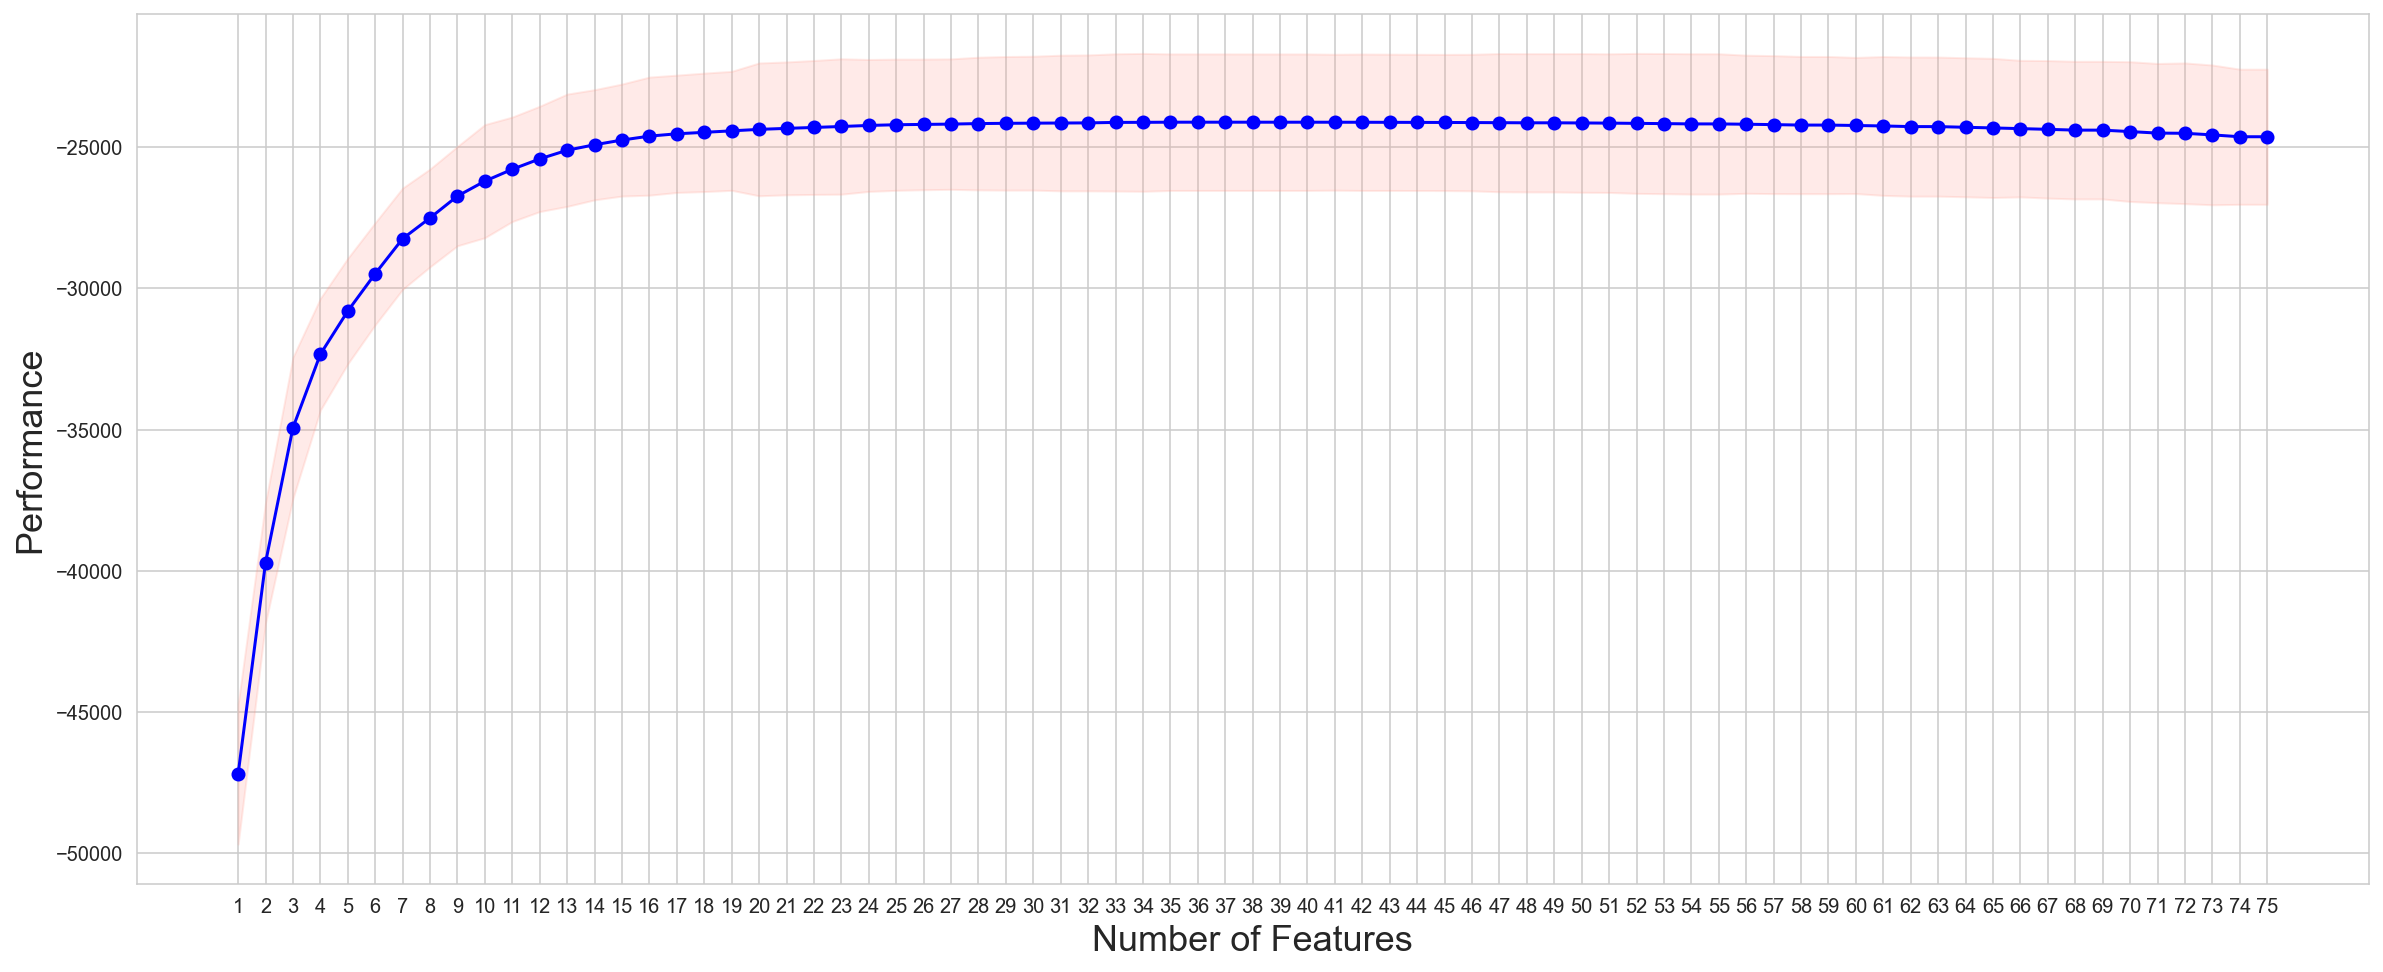

In [331]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import itertools

#import and prepare data >>>>>>>> (Train Data) <<<<<<<<<<

X = df_train_concat.drop(columns = ['SalePrice'])
y = df_train_concat['SalePrice']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)
# ss = StandardScaler()
# ss_train = ss.fit_transform(X_train)
# ss_test = ss.transform(X_test)

#Define Sequential Forward Selection (sfs)
sfs = SFS(Lasso(), 
          k_features=75, 
          forward=True, 
          floating=False, 
          scoring='neg_root_mean_squared_error',
          cv=5)

sfs = sfs.fit(X, y)
plot_sfs(sfs.get_metric_dict(), kind='std_dev',figsize=(20,8),bcolor='#FF9A8C')
plt.xlabel('Number of Features',fontsize=18)
plt.ylabel('Performance',fontsize=18)

print(sfs.get_metric_dict()[45]['feature_names']) ### Get the name of 45 features that SFS recommend

In [332]:
data_train_concat = df_train_concat[['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
                                     'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
                                     'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
                                     'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
                                     'Bsmt Half Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
                                     'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'Wood Deck SF',
                                     'Screen Porch', 'Year_Built_Age', 'Year_Remod/Add_Age',
                                     'Garage_Yr_Blt_Age', 'MS Zoning_FV', 'MS Zoning_I (all)',
                                     'Land Contour_HLS', 'Land Contour_Lvl', 'Utilities_AllPub',
                                     'Utilities_NoSewr', 'Condition 2_Norm', 'Condition 2_PosA',
                                     'Exter Qual_Ex', 'Exter Qual_Gd', 'Bsmt Qual_Ex', 'Bsmt Qual_Fa',
                                     'Bsmt Qual_Po', 'Heating_GasW', 'Heating_Grav', 'Kitchen Qual_Ex',
                                     'Kitchen Qual_TA', 'Paved Drive_N','SalePrice']]

data_test_concat = df_test_concat[['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
                                   'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
                                   'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
                                   'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath',
                                   'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
                                   'Fireplaces', 'Garage Area', 'Wood Deck SF', 'Screen Porch',
                                   'Year_Built_Age', 'Year_Remod/Add_Age', 'Garage_Yr_Blt_Age',
                                   'MS Zoning_FV', 'MS Zoning_I (all)', 'Land Contour_HLS',
                                   'Land Contour_Lvl', 'Utilities_AllPub', 'Utilities_NoSewr',
                                   'Condition 2_Norm', 'Condition 2_PosA', 'Exter Qual_Ex',
                                   'Exter Qual_Gd', 'Bsmt Qual_Ex', 'Bsmt Qual_Fa', 'Bsmt Qual_Po',
                                   'Heating_GasW', 'Heating_Grav', 'Kitchen Qual_Ex', 'Kitchen Qual_TA',
                                   'Paved Drive_N']]

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399589915384.96136, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455857242049.03485, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433092874901.16486, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: 

			>>>> Linear Regression <<<<

Training RSME = 23564.720397270365
Training RSME CV = 6.886359494140188e+16
Testing RSME = -
-------------------------------
Training R2 = 0.9116414018321228
Training R2 CV = -3.9841923416637056e+24
Testing R2 = -
			>>>> RidgeCV Regression <<<<

Alpha = 37
Training RSME = 23575.517003574816
Training RSME CV = 24112.13078859682
Testing RSME = -
-------------------------------
Training R2 = 0.9115604170784736
Training R2 CV = 0.90684335208657
Testing R2 = -
			>>>> LassoCV Regression <<<<

Alpha = 300
Training RSME = 23634.631525979687
Training RSME CV = 24192.979723923676
Testing RSME = -
-------------------------------
Training R2 = 0.911116344673215
Training R2 CV = 0.9062433098820113
Testing R2 = -
			>>>> ElasticNet Regression <<<<

Alpha = 0.036000000000000004
Training RSME = 23575.389583546978
Training RSME CV = 24111.94195409304
Testing RSME = -
-------------------------------
Training R2 = 0.9115613730654547
Training R2 CV = 0.9068445897388153
Te

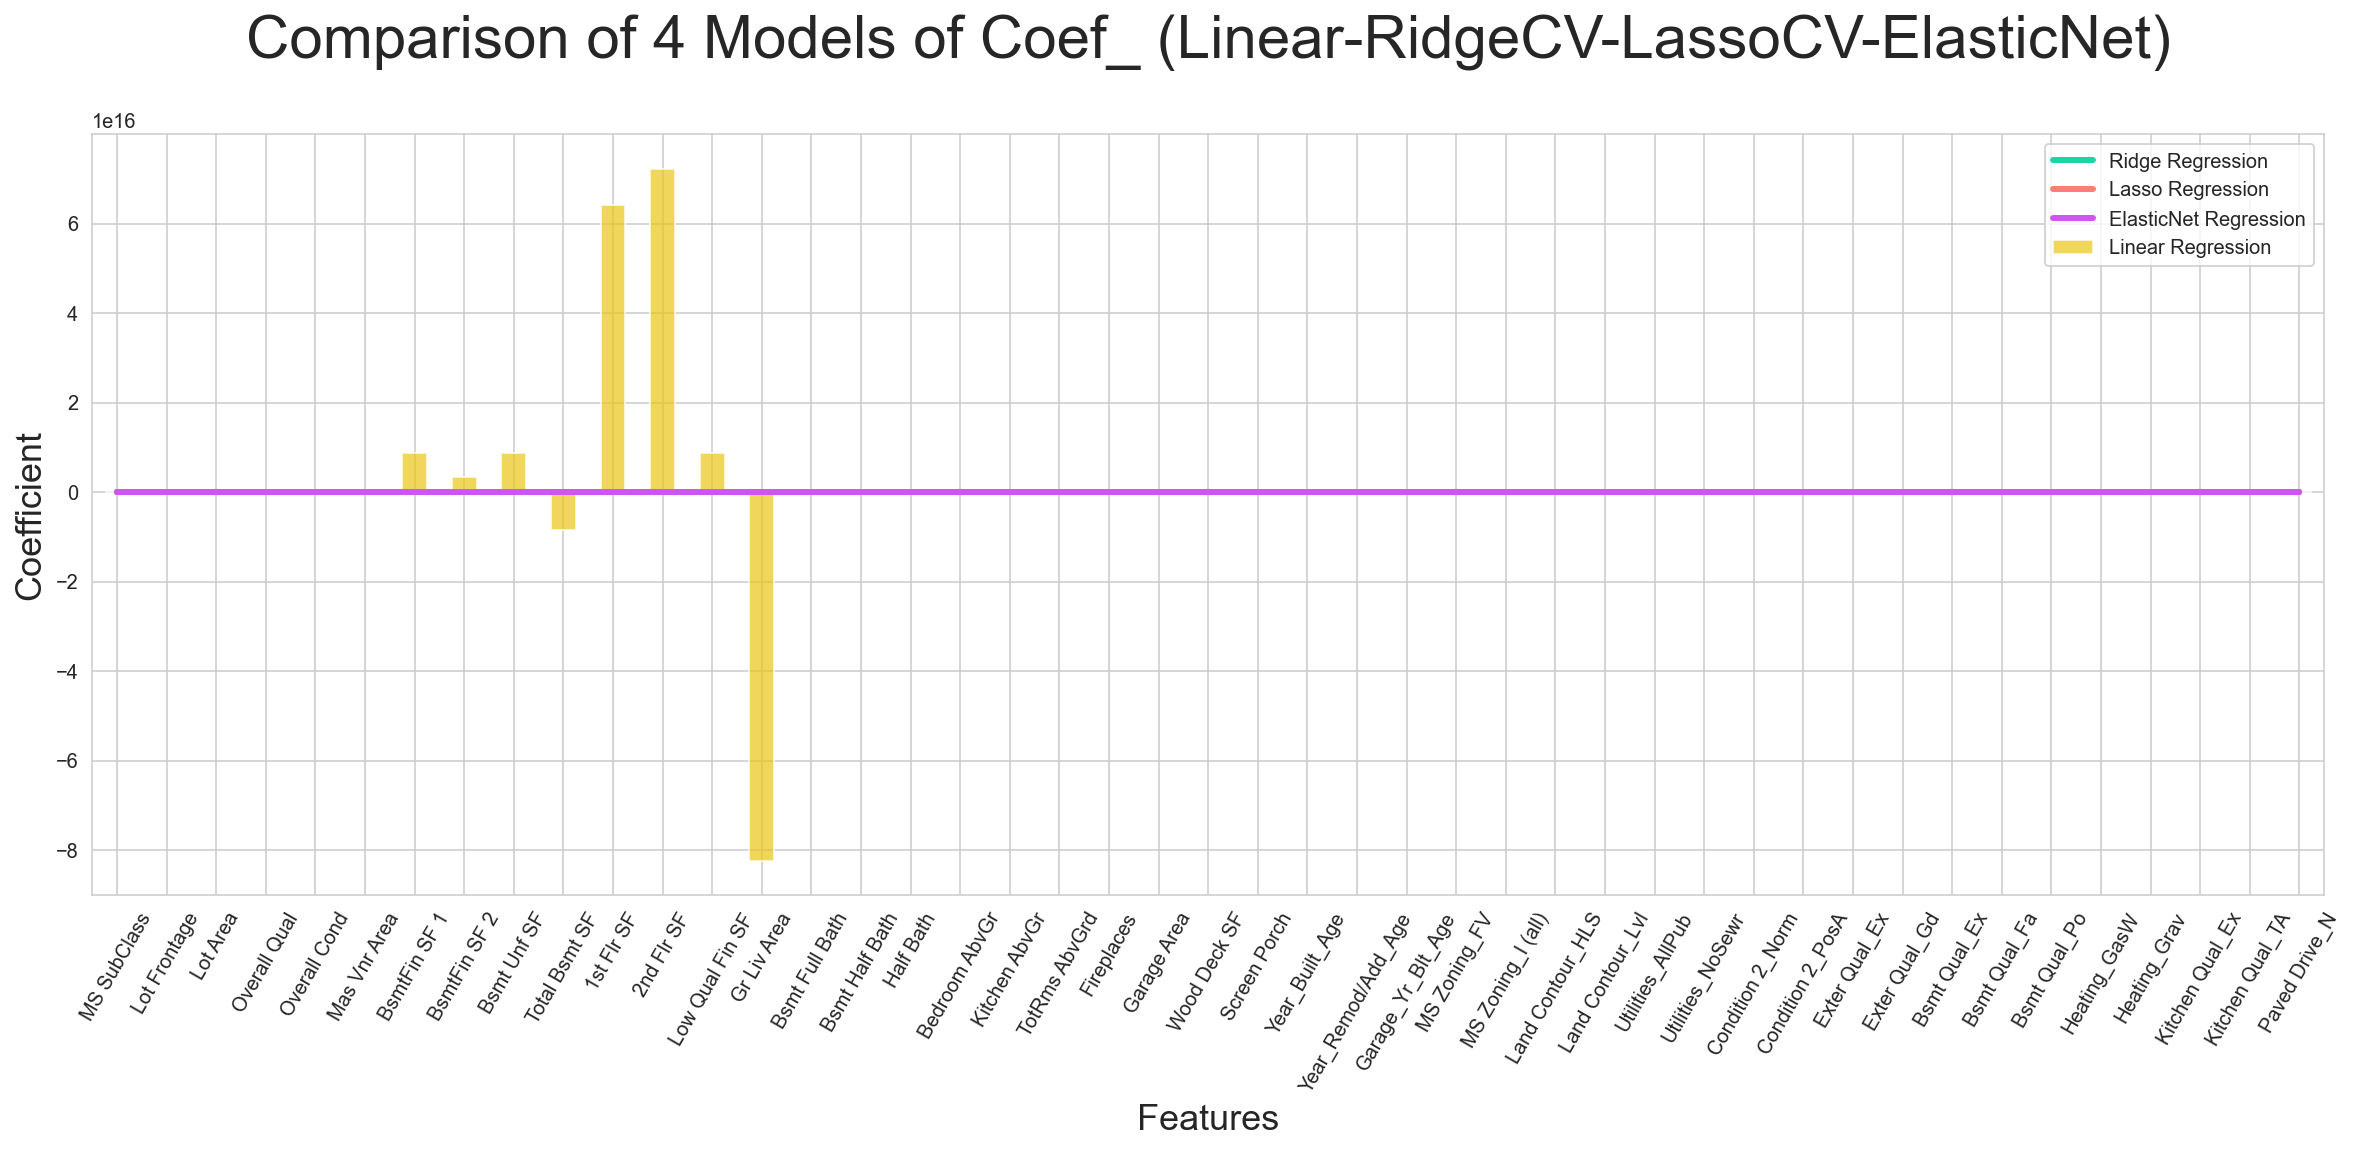

In [333]:
predict(data_train_concat, data_test_concat)

In [317]:
df_norm_concat = (data_train_concat - data_train_concat.mean()) / data_train_concat.std()
df_norm_concat

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0        0.068330      0.011024  0.693641     -0.074651      2.205708   
1        0.068330     -1.296065  0.306276      0.628171     -0.508362   
2       -0.864652     -0.039249 -0.376633     -0.777473      1.301018   
3        0.068330      0.212115 -0.017006     -0.777473     -0.508362   
4       -0.164916      0.664569  0.830988     -0.074651      2.205708   
...           ...           ...       ...           ...           ...   
2046    -0.864652      0.513751  0.298050      1.330992     -0.508362   
2047    -0.631407      0.011024  0.468873     -1.480295     -0.508362   
2048    -0.164916     -0.592248 -0.446263     -0.074651      0.396328   
2049    -0.864652      0.564023  0.097386     -1.480295     -0.508362   
2050     0.068330     -0.441430 -0.457358      0.628171     -0.508362   

      Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
0         1.135665      0.218352     -0.291347    -0.844250      -0.769549   
1         0.202916      0.454884     -0.291347    -0.655572      -0.328471   
2        -0.581307      0.668672     -0.291347    -0.543264       0.009377   
3        -0.581307     -0.993875     -0.291347    -0.412986      -1.569590   
4        -0.581307     -0.993875     -0.291347     0.242894      -0.884511   
...            ...           ...           ...          ...            ...   
2046     -0.581307      1.305489     -0.291347     0.685388       1.949652   
2047     -0.581307     -0.397996     -0.291347     0.069939      -0.450471   
2048     -0.581307     -0.993875     -0.291347     0.737050      -0.368355   
2049     -0.581307     -0.641351      4.247063    -0.612895       0.344878   
2050     -0.581307     -0.993875     -0.291347     0.957174      -0.138432   

      ...  Exter Qual_Gd  Bsmt Qual_Ex  Bsmt Qual_Fa  Bsmt Qual_Po  \
0     ...       1.393862     -0.312648     -0.173903     -0.022124   
1     ...       1.393862     -0.312648     -0.173903     -0.022124   
2     ...      -0.717080     -0.312648     -0.173903     -0.022124   
3     ...      -0.717080     -0.312648     -0.173903     -0.022124   
4     ...      -0.717080     -0.312648      5.747506     -0.022124   
...   ...            ...           ...           ...           ...   
2046  ...       1.393862     -0.312648     -0.173903     -0.022124   
2047  ...      -0.717080     -0.312648     -0.173903     -0.022124   
2048  ...      -0.717080     -0.312648     -0.173903     -0.022124   
2049  ...      -0.717080     -0.312648     -0.173903     -0.022124   
2050  ...      -0.717080     -0.312648     -0.173903     -0.022124   

      Heating_GasW  Heating_Grav  Kitchen Qual_Ex  Kitchen Qual_TA  \
0        -0.099406      -0.04952        -0.279396        -1.024028   
1        -0.099406      -0.04952        -0.279396        -1.024028   
2        -0.099406      -0.04952        -0.279396        -1.024028   
3        -0.099406      -0.04952        -0.279396         0.976058   
4        -0.099406      -0.04952        -0.279396         0.976058   
...            ...           ...              ...              ...   
2046     -0.099406      -0.04952        -0.279396        -1.024028   
2047     -0.099406      -0.04952        -0.279396         0.976058   
2048     -0.099406      -0.04952        -0.279396         0.976058   
2049     -0.099406      -0.04952        -0.279396         0.976058   
2050     -0.099406      -0.04952        -0.279396        -1.024028   

      Paved Drive_N  SalePrice  
0         -0.282437  -0.640273  
1         -0.282437   0.488427  
2         -0.282437  -0.911414  
3         -0.282437  -0.091687  
4          3.538880  -0.539384  
...             ...        ...  
2046      -0.282437   1.481571  
2047      -0.282437  -1.245610  
2048      -0.282437  -0.053853  
2049      -0.282437  -0.470022  
2050      -0.282437   0.097481  

[2043 rows x 46 columns]

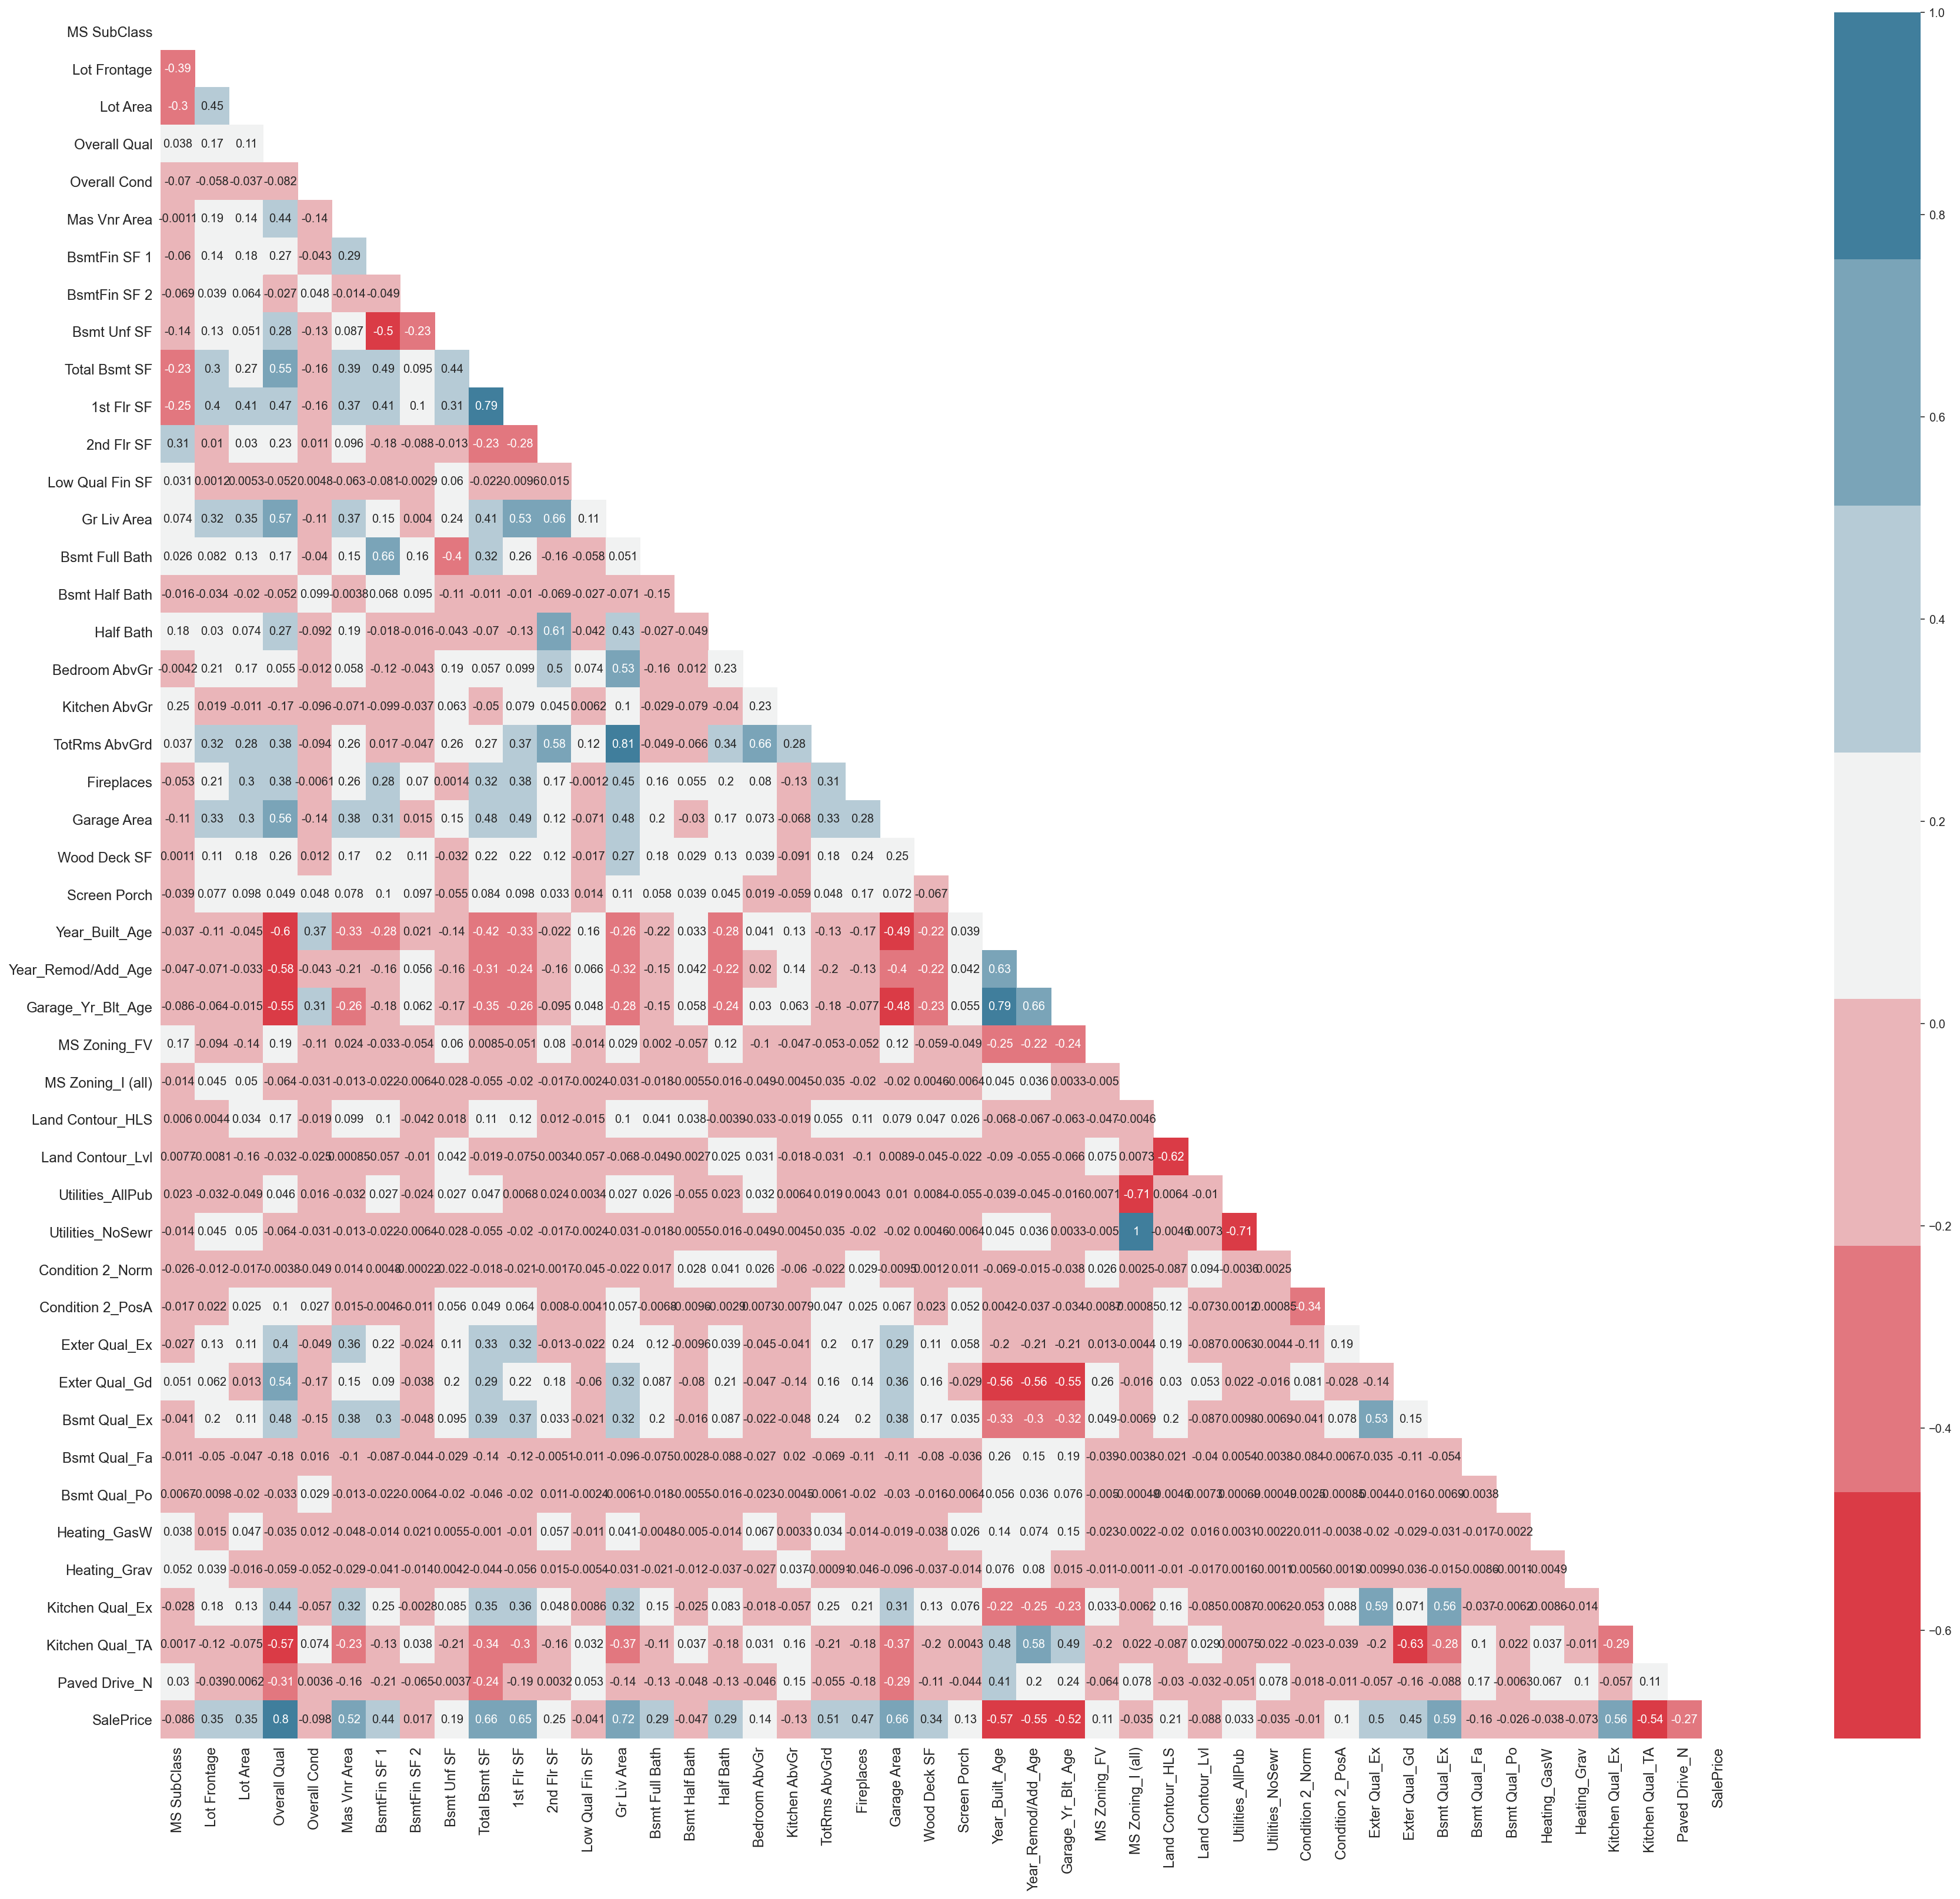

In [233]:
plt.figure(figsize=(30,27))
mask = np.zeros_like(df_norm_concat.corr())
mask[np.triu_indices_from(mask)] = 1
ax = sns.heatmap(df_norm_concat.corr(),annot=True,cmap=sns.diverging_palette(10, 590, n=7),mask=mask);
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)
plt.show()

#### Select some features that has correlation value more than 0.12 or less than -0.12
total features = 30 features

In [319]:
### Find the features that has correlation value less than -0.12 but more than 0.12 for find unnecessary features.
### Delete some features that haven't affect on SalePrice (Correlation value closely = 0) 

df_corr_concat = df_norm_concat.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False).iloc[1:]
df_corr_concat_filter = df_corr_concat[(df_corr_concat['SalePrice']<-0.12)|(df_corr_concat['SalePrice']>0.12)].sort_values(by = 'SalePrice',ascending=False)
df_corr_concat_filter

SalePrice
Overall Qual         0.803654
Gr Liv Area          0.719212
Total Bsmt SF        0.664708
Garage Area          0.655754
1st Flr SF           0.647906
Bsmt Qual_Ex         0.591593
Kitchen Qual_Ex      0.556438
Mas Vnr Area         0.522669
TotRms AbvGrd        0.510912
Exter Qual_Ex        0.501725
Fireplaces           0.472014
Exter Qual_Gd        0.446965
BsmtFin SF 1         0.444875
Lot Area             0.352313
Lot Frontage         0.347247
Wood Deck SF         0.336359
Bsmt Full Bath       0.285650
Half Bath            0.285332
2nd Flr SF           0.249781
Land Contour_HLS     0.210958
Bsmt Unf SF          0.190700
Bedroom AbvGr        0.137429
Screen Porch         0.134629
Kitchen AbvGr       -0.125127
Bsmt Qual_Fa        -0.161314
Paved Drive_N       -0.273355
Garage_Yr_Blt_Age   -0.524524
Kitchen Qual_TA     -0.540273
Year_Remod/Add_Age  -0.549875
Year_Built_Age      -0.573107

In [322]:
### Number of features = 30 features

df_corr_concat_filter.index

Index(['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area',
       '1st Flr SF', 'Bsmt Qual_Ex', 'Kitchen Qual_Ex', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Exter Qual_Ex', 'Fireplaces', 'Exter Qual_Gd',
       'BsmtFin SF 1', 'Lot Area', 'Lot Frontage', 'Wood Deck SF',
       'Bsmt Full Bath', 'Half Bath', '2nd Flr SF', 'Land Contour_HLS',
       'Bsmt Unf SF', 'Bedroom AbvGr', 'Screen Porch', 'Kitchen AbvGr',
       'Bsmt Qual_Fa', 'Paved Drive_N', 'Garage_Yr_Blt_Age', 'Kitchen Qual_TA',
       'Year_Remod/Add_Age', 'Year_Built_Age'],
      dtype='object')

In [323]:
### Choose only necessary features

data_train_concat = df_train_concat[['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area',
       '1st Flr SF', 'Bsmt Qual_Ex', 'Kitchen Qual_Ex', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Exter Qual_Ex', 'Fireplaces', 'Exter Qual_Gd',
       'BsmtFin SF 1', 'Lot Area', 'Lot Frontage', 'Wood Deck SF',
       'Bsmt Full Bath', 'Half Bath', '2nd Flr SF', 'Land Contour_HLS',
       'Bsmt Unf SF', 'Bedroom AbvGr', 'Screen Porch', 'Kitchen AbvGr',
       'Bsmt Qual_Fa', 'Paved Drive_N', 'Garage_Yr_Blt_Age', 'Kitchen Qual_TA',
       'Year_Remod/Add_Age', 'Year_Built_Age','SalePrice']]

data_test_concat = df_test_concat[['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area',
       '1st Flr SF', 'Bsmt Qual_Ex', 'Kitchen Qual_Ex', 'Mas Vnr Area',
       'TotRms AbvGrd', 'Exter Qual_Ex', 'Fireplaces', 'Exter Qual_Gd',
       'BsmtFin SF 1', 'Lot Area', 'Lot Frontage', 'Wood Deck SF',
       'Bsmt Full Bath', 'Half Bath', '2nd Flr SF', 'Land Contour_HLS',
       'Bsmt Unf SF', 'Bedroom AbvGr', 'Screen Porch', 'Kitchen AbvGr',
       'Bsmt Qual_Fa', 'Paved Drive_N', 'Garage_Yr_Blt_Age', 'Kitchen Qual_TA',
       'Year_Remod/Add_Age', 'Year_Built_Age']]

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81510290997.68524, tolerance: 1025183730.4173605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37207994408.64319, tolerance: 1040280847.0803391
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443461142358.53485, tolerance: 1020013961.3023047
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Co

			>>>> Linear Regression <<<<

Training RSME = 24339.549246988787
Training RSME CV = 24870.75500571823
Testing RSME = -
-------------------------------
Training R2 = 0.9057352549846773
Training R2 CV = 0.9009284848911332
Testing R2 = -
			>>>> RidgeCV Regression <<<<

Alpha = 49
Training RSME = 24364.579095372
Training RSME CV = 24837.771297165902
Testing RSME = -
-------------------------------
Training R2 = 0.9055412788821637
Training R2 CV = 0.9011702725561396
Testing R2 = -
			>>>> LassoCV Regression <<<<

Alpha = 300
Training RSME = 24441.00965844814
Training RSME CV = 24929.52142059221
Testing RSME = -
-------------------------------
Training R2 = 0.9049477240429104
Training R2 CV = 0.9004291489506308
Testing R2 = -
			>>>> ElasticNet Regression <<<<

Alpha = 0.046
Training RSME = 24363.368823256744
Training RSME CV = 24837.262434378055
Testing RSME = -
-------------------------------
Training R2 = 0.9055506628256673
Training R2 CV = 0.9011745530043399
Testing R2 = -


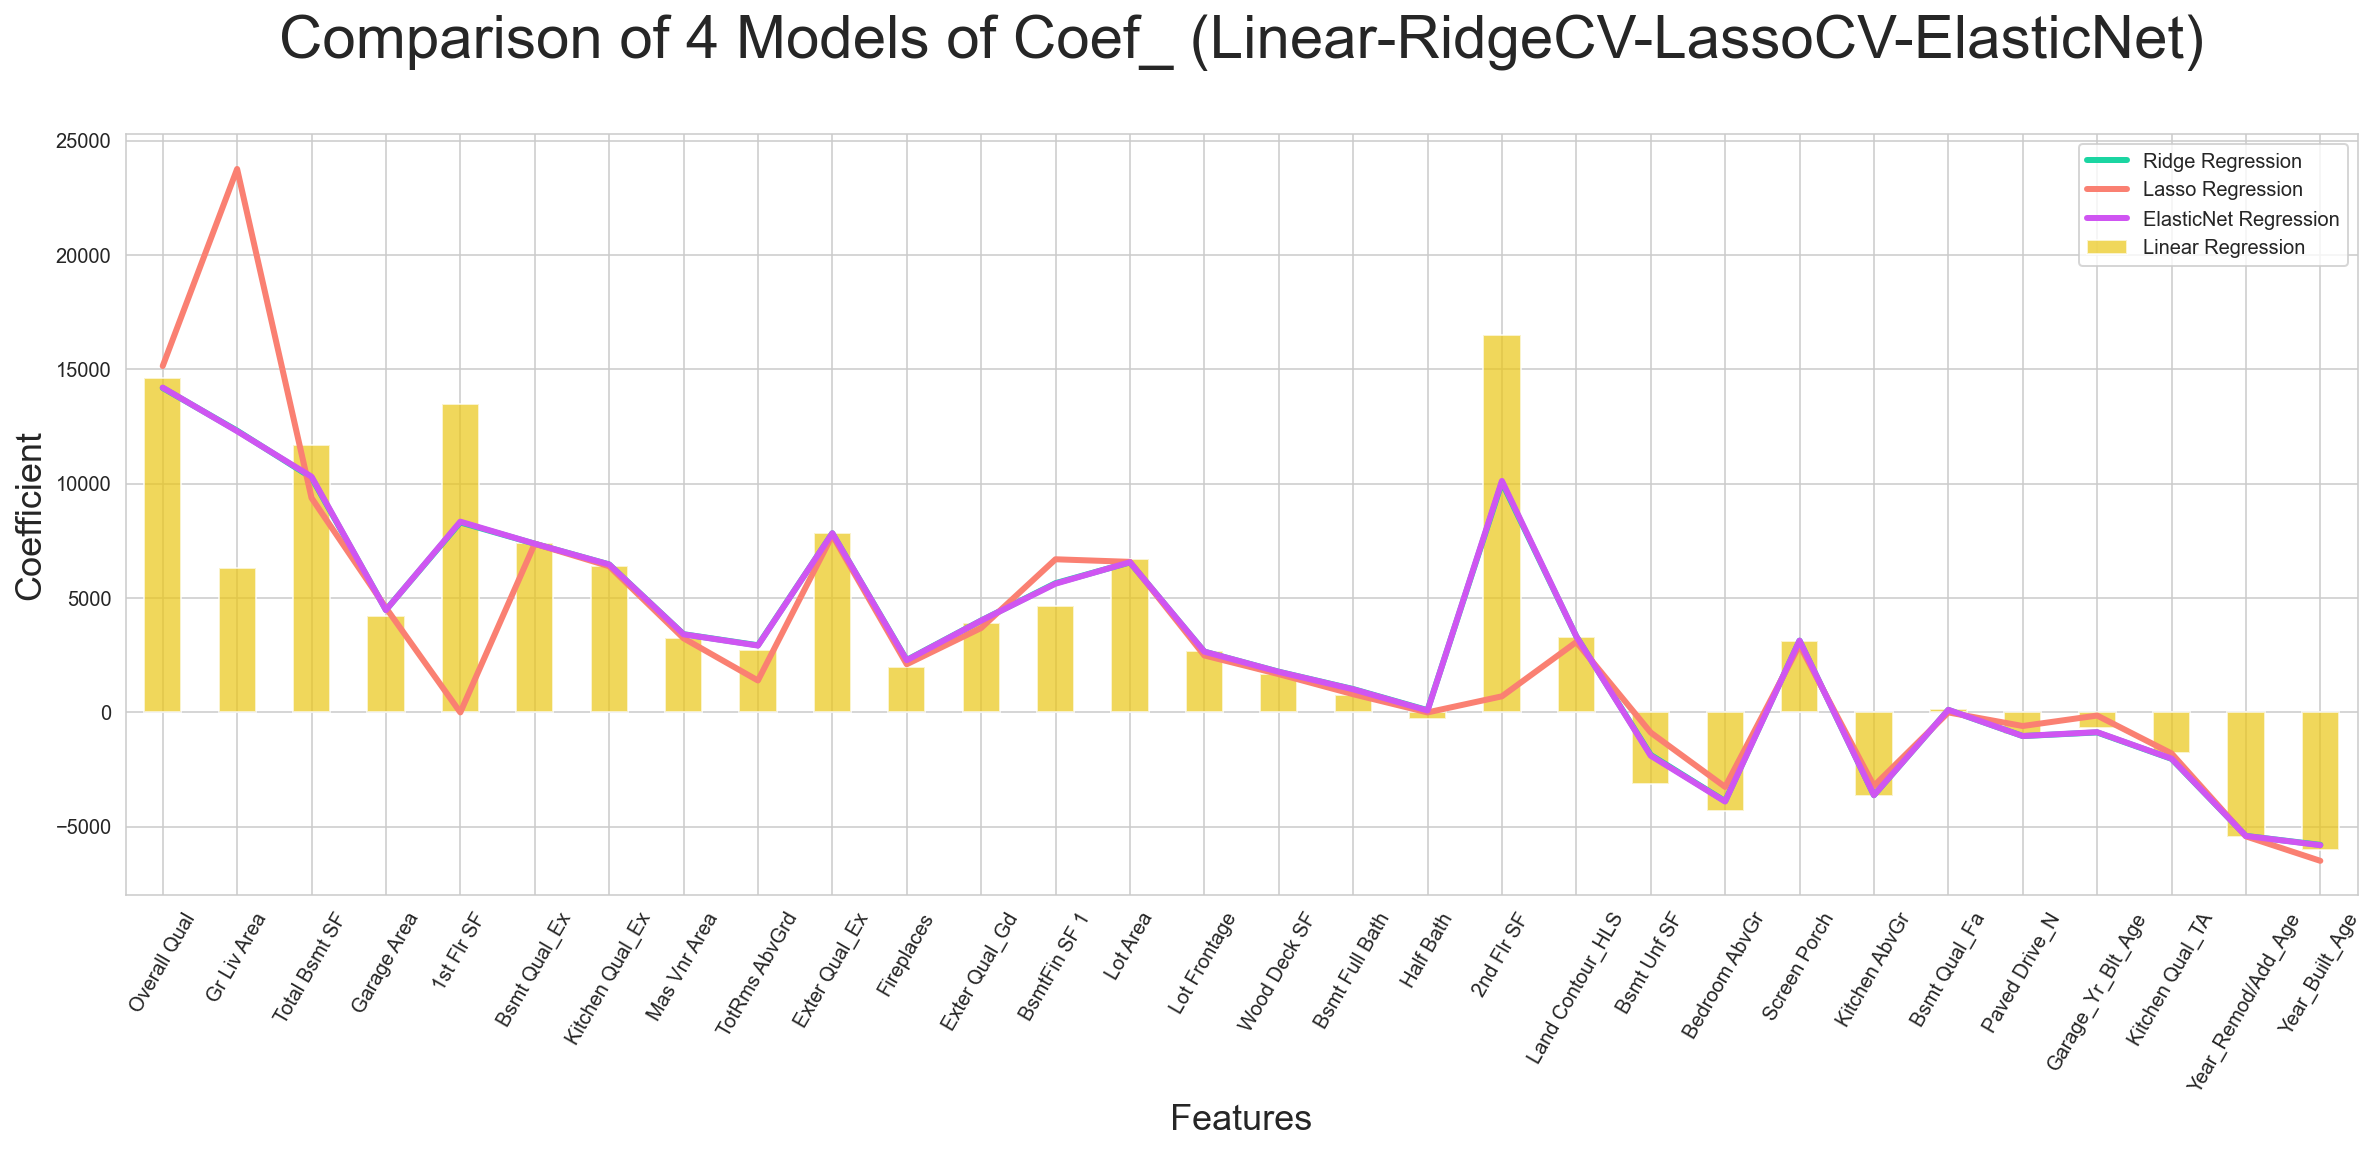

In [324]:
predict(data_train_concat, data_test_concat)

### From the result >> try to predict in Kaggle

In [325]:
X_train = data_train_concat.drop(columns = ['SalePrice']) ### Data from train set (numerical)
X_test = data_test_concat ### Data from test set (numerical)
y_train = data_train_concat['SalePrice']
#     X = data.drop(columns = ['SalePrice'])
#     y = data['SalePrice']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)
    
ss = StandardScaler()
ss_train = ss.fit_transform(X_train)
ss_test = ss.transform(X_test)

In [326]:
## ElasticNet

en_alpha = 0.046
en_model = ElasticNet(alpha=en_alpha,l1_ratio=0.5)
en_model.fit(ss_train,y_train)
prediction_value = en_model.predict(ss_test)
prediction_value = [int(i) for i in prediction_value]

In [327]:
df_test['SalePrice'] = prediction_value

In [328]:
### Export to csv file (RFE)

df_test[['Id','SalePrice']].to_csv('data_test_concat_3.csv',index=False)